## Import all Libraries

In [258]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Gather Training and Testing Data

In [259]:
# Read in dataframe
df = pd.read_csv('fbdh1.csv')

In [175]:
# df.head()

In [260]:
# Use a label fix function to assign classifications or ground truth to Flow thresholds
def label_fix(label):
    if label < -7.5:
        return 0
    elif label > 7.5:
        return 1
    else:
        return 2

df['Class'] = df['Flow'].apply(label_fix)

In [261]:
df.head()

Flow      D1      D2      P1     P2    dD1    dD2    dP1   dP2  Class
0 -16.69   99.49 -145.71   48.04 -15.90  81.17  12.26  36.71  2.21      0
1 -16.23  172.78 -118.66   79.84 -11.94  80.09  18.49  35.48  2.91      0
2 -15.54  242.66  -81.28  109.77  -7.75  75.74  24.65  33.03  3.26      0
3 -15.17  316.42  -55.50  140.84  -5.30  74.07  28.43  31.89  3.37      0
4 -14.51  392.40  -31.67  171.92  -1.24  73.96  29.70  31.32  3.68      0

## EDA

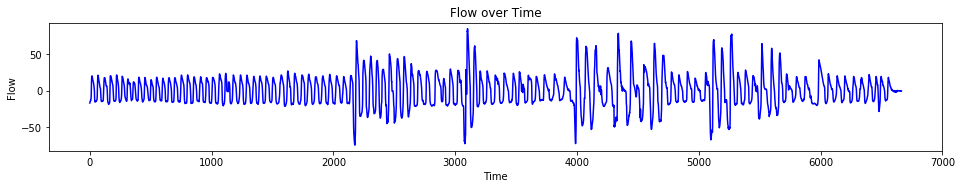

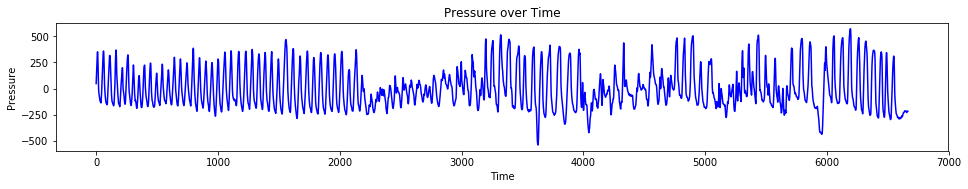

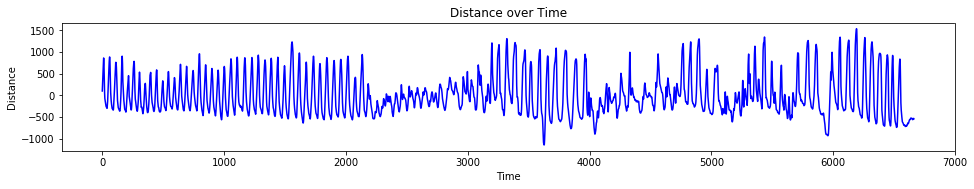

In [262]:
time = range(0, 6664)
flow = df['Flow']
pressure = df['P1']
distance = df['D1']

fig = plt.figure(figsize = (16, 8))
plt.subplot(3,1,1)
plt.plot(time, flow, 'b') # 'r' is the color red
plt.xlabel('Time')
plt.ylabel('Flow')
plt.title('Flow over Time')
plt.show()

fig = plt.figure(figsize = (16, 8))
plt.subplot(3,1,2)
plt.plot(time, pressure, 'b')
plt.xlabel('Time')
plt.ylabel('Pressure')
plt.title('Pressure over Time')
plt.show()

fig = plt.figure(figsize = (16, 8))
plt.subplot(3,1,2)
plt.plot(time, distance, 'b')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('Distance over Time')
plt.show()

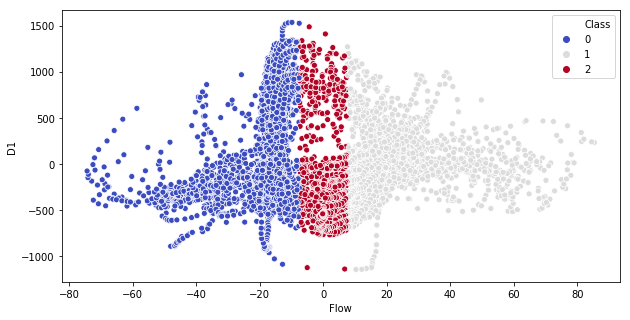

In [289]:
fig = plt.figure(figsize = (10, 5))
sns.scatterplot(x = flow, y = distance, hue = df['Class'], palette = 'coolwarm')

## Scale and Create Feature Matrix

In [265]:
# Create the Feature Matrix and Scale Features
X = df.drop('Flow', axis = 1)
X.drop('Class', axis = 1, inplace = True)

scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
X = pd.DataFrame(scaled_features, columns = X.columns[:])

# Create the classification matrix
y = df['Class']

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

columns = ['D1', 'D2', 'P1', 'P2', 'dD1', 'dD2', 'dP1', 'dP2']

## Develop Keras Model

In [416]:
model = keras.Sequential()
model.add(keras.layers.Dense(150, activation = tf.nn.relu, input_dim = 8))
model.add(keras.layers.Dense(3, activation = tf.nn.sigmoid))

In [417]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [418]:
model.summary()

Model: "sequential_111"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_210 (Dense)            (None, 150)               1350      
_________________________________________________________________
dense_211 (Dense)            (None, 3)                 453       
Total params: 1,803
Trainable params: 1,803
Non-trainable params: 0
_________________________________________________________________


In [ ]:
EPOCHS = 500

model.fit(X_train, y_train, epochs = EPOCHS)

Epoch 1/500
4664/4664 [==============================] - 1s 116us/sample - loss: 0.6303 - acc: 0.8064
Epoch 2/500
4664/4664 [==============================] - 0s 36us/sample - loss: 0.3441 - acc: 0.8720
Epoch 3/500
4664/4664 [==============================] - 0s 38us/sample - loss: 0.3018 - acc: 0.8795
Epoch 4/500
4664/4664 [==============================] - 0s 37us/sample - loss: 0.2846 - acc: 0.8883
Epoch 5/500
4664/4664 [==============================] - 0s 38us/sample - loss: 0.2757 - acc: 0.8913
Epoch 6/500
4664/4664 [==============================] - 0s 40us/sample - loss: 0.2685 - acc: 0.8952
Epoch 7/500
4664/4664 [==============================] - 0s 37us/sample - loss: 0.2633 - acc: 0.8919
Epoch 8/500
4664/4664 [==============================] - 0s 41us/sample - loss: 0.2611 - acc: 0.8943
Epoch 9/500
4664/4664 [==============================] - 0s 41us/sample - loss: 0.2591 - acc: 0.8952
Epoch 10/500
4664/4664 [==============================] - 0s 42us/sample - loss: 0.2552 - 

4664/4664 [==============================] - 0s 40us/sample - loss: 0.2225 - acc: 0.9106
Epoch 82/500
4664/4664 [==============================] - 0s 40us/sample - loss: 0.2235 - acc: 0.9074
Epoch 83/500
4664/4664 [==============================] - 0s 35us/sample - loss: 0.2200 - acc: 0.9104
Epoch 84/500
4664/4664 [==============================] - 0s 37us/sample - loss: 0.2230 - acc: 0.9087
Epoch 85/500
4664/4664 [==============================] - 0s 35us/sample - loss: 0.2213 - acc: 0.9099
Epoch 86/500
4664/4664 [==============================] - 0s 36us/sample - loss: 0.2212 - acc: 0.9087
Epoch 87/500
4664/4664 [==============================] - 0s 41us/sample - loss: 0.2216 - acc: 0.9080
Epoch 88/500
4664/4664 [==============================] - 0s 35us/sample - loss: 0.2218 - acc: 0.9093
Epoch 89/500
4664/4664 [==============================] - 0s 36us/sample - loss: 0.2202 - acc: 0.9110
Epoch 90/500
4664/4664 [==============================] - 0s 38us/sample - loss: 0.2206 - acc: 

In [411]:
# Scoring the Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

predictions = model.predict(X_test)

final_pred = []
for score in range(0, len(predictions)):
    final_pred.append(np.argmax(predictions[score]))
    
print(classification_report(y_test, final_pred))

2000/2000 [==============================] - 0s 188us/sample - loss: 0.2801 - acc: 0.8995
Test accuracy: 0.8995
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       849
           1       0.92      0.92      0.92       783
           2       0.77      0.74      0.75       368

   micro avg       0.90      0.90      0.90      2000
   macro avg       0.88      0.87      0.87      2000
weighted avg       0.90      0.90      0.90      2000



## Perform Grid Search to Tune Parameters

In [388]:
from sklearn.model_selection import GridSearchCV

def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(keras.layers.Dense(150, activation = tf.nn.relu, input_dim = 8))
    classifier.add(keras.layers.Dense(3, activation = tf.nn.sigmoid))
    classifier.compile(optimizer = optimizer, 
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])
    return classifier

In [395]:
classifier = keras.wrappers.scikit_learn.KerasClassifier(build_fn = build_classifier)

parameters = {'batch_size': [25, 50], 
             'epochs': [500, 700], 
             'optimizer': ['adam', 'rmsprop']}

grid_search = GridSearchCV(estimator = classifier,
                          param_grid = parameters, 
                          scoring = 'accuracy', 
                          cv = 10)

In [398]:
grid_search = grid_search.fit(X_train, y_train)

Epoch 1/500
4197/4197 [==============================] - 0s 59us/sample - loss: 0.6042 - acc: 0.8049
Epoch 2/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.3315 - acc: 0.8728
Epoch 3/500
4197/4197 [==============================] - 0s 28us/sample - loss: 0.2950 - acc: 0.8866
Epoch 4/500
4197/4197 [==============================] - 0s 28us/sample - loss: 0.2785 - acc: 0.8902
Epoch 5/500
4197/4197 [==============================] - 0s 28us/sample - loss: 0.2695 - acc: 0.8909
Epoch 6/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2641 - acc: 0.8944
Epoch 7/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2613 - acc: 0.8937
Epoch 8/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2596 - acc: 0.8971
Epoch 9/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.2562 - acc: 0.8952
Epoch 10/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.2533 - a

4197/4197 [==============================] - 0s 30us/sample - loss: 0.2224 - acc: 0.9083
Epoch 82/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.2224 - acc: 0.9099
Epoch 83/500
4197/4197 [==============================] - 0s 28us/sample - loss: 0.2212 - acc: 0.9095
Epoch 84/500
4197/4197 [==============================] - 0s 28us/sample - loss: 0.2196 - acc: 0.9107
Epoch 85/500
4197/4197 [==============================] - 0s 28us/sample - loss: 0.2233 - acc: 0.9085
Epoch 86/500
4197/4197 [==============================] - 0s 27us/sample - loss: 0.2221 - acc: 0.9099
Epoch 87/500
4197/4197 [==============================] - 0s 27us/sample - loss: 0.2208 - acc: 0.9085
Epoch 88/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.2203 - acc: 0.9123
Epoch 89/500
4197/4197 [==============================] - 0s 28us/sample - loss: 0.2212 - acc: 0.9109
Epoch 90/500
4197/4197 [==============================] - 0s 28us/sample - loss: 0.2204 - acc: 

4197/4197 [==============================] - 0s 28us/sample - loss: 0.2094 - acc: 0.9121
Epoch 161/500
4197/4197 [==============================] - 0s 28us/sample - loss: 0.2067 - acc: 0.9149
Epoch 162/500
4197/4197 [==============================] - 0s 28us/sample - loss: 0.2094 - acc: 0.9126
Epoch 163/500
4197/4197 [==============================] - 0s 28us/sample - loss: 0.2069 - acc: 0.9133
Epoch 164/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.2076 - acc: 0.9118
Epoch 165/500
4197/4197 [==============================] - 0s 28us/sample - loss: 0.2076 - acc: 0.9126
Epoch 166/500
4197/4197 [==============================] - 0s 28us/sample - loss: 0.2086 - acc: 0.9152
Epoch 167/500
4197/4197 [==============================] - 0s 27us/sample - loss: 0.2058 - acc: 0.9145
Epoch 168/500
4197/4197 [==============================] - 0s 27us/sample - loss: 0.2065 - acc: 0.9161
Epoch 169/500
4197/4197 [==============================] - 0s 28us/sample - loss: 0.209

4197/4197 [==============================] - 0s 27us/sample - loss: 0.1971 - acc: 0.9204
Epoch 240/500
4197/4197 [==============================] - 0s 27us/sample - loss: 0.1976 - acc: 0.9183
Epoch 241/500
4197/4197 [==============================] - 0s 27us/sample - loss: 0.1984 - acc: 0.9180
Epoch 242/500
4197/4197 [==============================] - 0s 27us/sample - loss: 0.2009 - acc: 0.9176
Epoch 243/500
4197/4197 [==============================] - 0s 27us/sample - loss: 0.1976 - acc: 0.9185
Epoch 244/500
4197/4197 [==============================] - 0s 27us/sample - loss: 0.1964 - acc: 0.9178
Epoch 245/500
4197/4197 [==============================] - 0s 27us/sample - loss: 0.1957 - acc: 0.9195
Epoch 246/500
4197/4197 [==============================] - 0s 27us/sample - loss: 0.1975 - acc: 0.9178
Epoch 247/500
4197/4197 [==============================] - 0s 27us/sample - loss: 0.1956 - acc: 0.9166
Epoch 248/500
4197/4197 [==============================] - 0s 27us/sample - loss: 0.197

4197/4197 [==============================] - 0s 28us/sample - loss: 0.1876 - acc: 0.9235
Epoch 319/500
4197/4197 [==============================] - 0s 27us/sample - loss: 0.1903 - acc: 0.9218
Epoch 320/500
4197/4197 [==============================] - 0s 27us/sample - loss: 0.1895 - acc: 0.9211
Epoch 321/500
4197/4197 [==============================] - 0s 27us/sample - loss: 0.1878 - acc: 0.9218
Epoch 322/500
4197/4197 [==============================] - 0s 27us/sample - loss: 0.1900 - acc: 0.9226
Epoch 323/500
4197/4197 [==============================] - 0s 27us/sample - loss: 0.1871 - acc: 0.9226
Epoch 324/500
4197/4197 [==============================] - 0s 27us/sample - loss: 0.1886 - acc: 0.9214
Epoch 325/500
4197/4197 [==============================] - 0s 27us/sample - loss: 0.1886 - acc: 0.9228
Epoch 326/500
4197/4197 [==============================] - 0s 28us/sample - loss: 0.1883 - acc: 0.9223
Epoch 327/500
4197/4197 [==============================] - 0s 28us/sample - loss: 0.186

4197/4197 [==============================] - 0s 29us/sample - loss: 0.1818 - acc: 0.9254
Epoch 398/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1802 - acc: 0.9266
Epoch 399/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1807 - acc: 0.9249
Epoch 400/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1810 - acc: 0.9240
Epoch 401/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1785 - acc: 0.9264
Epoch 402/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1792 - acc: 0.9221
Epoch 403/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1793 - acc: 0.9266
Epoch 404/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1801 - acc: 0.9276
Epoch 405/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1804 - acc: 0.9245
Epoch 406/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.182

4197/4197 [==============================] - 0s 33us/sample - loss: 0.1725 - acc: 0.9314
Epoch 477/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1741 - acc: 0.9266
Epoch 478/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1753 - acc: 0.9280
Epoch 479/500
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1754 - acc: 0.9252
Epoch 480/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1754 - acc: 0.9290
Epoch 481/500
4197/4197 [==============================] - 0s 36us/sample - loss: 0.1749 - acc: 0.9283
Epoch 482/500
4197/4197 [==============================] - 0s 43us/sample - loss: 0.1747 - acc: 0.9280
Epoch 483/500
4197/4197 [==============================] - 0s 38us/sample - loss: 0.1745 - acc: 0.9259
Epoch 484/500
4197/4197 [==============================] - 0s 36us/sample - loss: 0.1739 - acc: 0.9278
Epoch 485/500
4197/4197 [==============================] - 0s 42us/sample - loss: 0.172

4197/4197 [==============================] - 0s 42us/sample - loss: 0.2305 - acc: 0.9095
Epoch 57/500
4197/4197 [==============================] - 0s 41us/sample - loss: 0.2303 - acc: 0.9066
Epoch 58/500
4197/4197 [==============================] - 0s 39us/sample - loss: 0.2319 - acc: 0.9040
Epoch 59/500
4197/4197 [==============================] - 0s 40us/sample - loss: 0.2317 - acc: 0.9054
Epoch 60/500
4197/4197 [==============================] - 0s 41us/sample - loss: 0.2295 - acc: 0.9056
Epoch 61/500
4197/4197 [==============================] - 0s 40us/sample - loss: 0.2296 - acc: 0.9054
Epoch 62/500
4197/4197 [==============================] - 0s 39us/sample - loss: 0.2299 - acc: 0.9056
Epoch 63/500
4197/4197 [==============================] - 0s 39us/sample - loss: 0.2294 - acc: 0.9061
Epoch 64/500
4197/4197 [==============================] - 0s 38us/sample - loss: 0.2276 - acc: 0.9083
Epoch 65/500
4197/4197 [==============================] - 0s 38us/sample - loss: 0.2301 - acc: 

4197/4197 [==============================] - 0s 31us/sample - loss: 0.2152 - acc: 0.9095
Epoch 137/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2141 - acc: 0.9121
Epoch 138/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2153 - acc: 0.9121
Epoch 139/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2139 - acc: 0.9114
Epoch 140/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2146 - acc: 0.9102
Epoch 141/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2139 - acc: 0.9133
Epoch 142/500
4197/4197 [==============================] - 0s 33us/sample - loss: 0.2133 - acc: 0.9126
Epoch 143/500
4197/4197 [==============================] - 0s 33us/sample - loss: 0.2144 - acc: 0.9121
Epoch 144/500
4197/4197 [==============================] - 0s 34us/sample - loss: 0.2121 - acc: 0.9130
Epoch 145/500
4197/4197 [==============================] - 0s 32us/sample - loss: 0.212

4197/4197 [==============================] - 0s 32us/sample - loss: 0.2013 - acc: 0.9188
Epoch 216/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2014 - acc: 0.9159
Epoch 217/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2014 - acc: 0.9176
Epoch 218/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1987 - acc: 0.9152
Epoch 219/500
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2004 - acc: 0.9159
Epoch 220/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1994 - acc: 0.9149
Epoch 221/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2014 - acc: 0.9192
Epoch 222/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2007 - acc: 0.9147
Epoch 223/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2006 - acc: 0.9209
Epoch 224/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.201

4197/4197 [==============================] - 0s 33us/sample - loss: 0.1922 - acc: 0.9218
Epoch 295/500
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1913 - acc: 0.9223
Epoch 296/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1912 - acc: 0.9221
Epoch 297/500
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1914 - acc: 0.9183
Epoch 298/500
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1901 - acc: 0.9199
Epoch 299/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1908 - acc: 0.9204
Epoch 300/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1911 - acc: 0.9211
Epoch 301/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1918 - acc: 0.9185
Epoch 302/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1919 - acc: 0.9183
Epoch 303/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.193

4197/4197 [==============================] - 0s 30us/sample - loss: 0.1820 - acc: 0.9249
Epoch 374/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1819 - acc: 0.9266
Epoch 375/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1847 - acc: 0.9221
Epoch 376/500
4197/4197 [==============================] - 0s 28us/sample - loss: 0.1851 - acc: 0.9235
Epoch 377/500
4197/4197 [==============================] - 0s 28us/sample - loss: 0.1830 - acc: 0.9235
Epoch 378/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1823 - acc: 0.9261
Epoch 379/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1828 - acc: 0.9276
Epoch 380/500
4197/4197 [==============================] - 0s 28us/sample - loss: 0.1849 - acc: 0.9226
Epoch 381/500
4197/4197 [==============================] - 0s 28us/sample - loss: 0.1807 - acc: 0.9264
Epoch 382/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.180

4197/4197 [==============================] - 0s 31us/sample - loss: 0.1739 - acc: 0.9290
Epoch 453/500
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1761 - acc: 0.9273
Epoch 454/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1755 - acc: 0.9264
Epoch 455/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1763 - acc: 0.9290
Epoch 456/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1753 - acc: 0.9283
Epoch 457/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1787 - acc: 0.9230
Epoch 458/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1808 - acc: 0.9261
Epoch 459/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1750 - acc: 0.9285
Epoch 460/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1766 - acc: 0.9273
Epoch 461/500
4197/4197 [==============================] - 0s 32us/sample - loss: 0.176

4197/4197 [==============================] - 0s 30us/sample - loss: 0.2288 - acc: 0.9054
Epoch 33/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2310 - acc: 0.9054
Epoch 34/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2292 - acc: 0.9071
Epoch 35/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2287 - acc: 0.9080
Epoch 36/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2288 - acc: 0.9054
Epoch 37/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.2272 - acc: 0.9064
Epoch 38/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.2299 - acc: 0.9056
Epoch 39/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.2281 - acc: 0.9056
Epoch 40/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.2268 - acc: 0.9083
Epoch 41/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.2243 - acc: 

4197/4197 [==============================] - 0s 30us/sample - loss: 0.2090 - acc: 0.9152
Epoch 113/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2088 - acc: 0.9142
Epoch 114/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2072 - acc: 0.9118
Epoch 115/500
4197/4197 [==============================] - 0s 34us/sample - loss: 0.2066 - acc: 0.9128
Epoch 116/500
4197/4197 [==============================] - 0s 39us/sample - loss: 0.2078 - acc: 0.9118
Epoch 117/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2064 - acc: 0.9114
Epoch 118/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2073 - acc: 0.9137
Epoch 119/500
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2077 - acc: 0.9107
Epoch 120/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2071 - acc: 0.9111
Epoch 121/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.206

4197/4197 [==============================] - 0s 34us/sample - loss: 0.1930 - acc: 0.9159
Epoch 192/500
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1939 - acc: 0.9171
Epoch 193/500
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1924 - acc: 0.9166
Epoch 194/500
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1933 - acc: 0.9166
Epoch 195/500
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1929 - acc: 0.9137
Epoch 196/500
4197/4197 [==============================] - 0s 35us/sample - loss: 0.1931 - acc: 0.9185
Epoch 197/500
4197/4197 [==============================] - 0s 35us/sample - loss: 0.1928 - acc: 0.9176
Epoch 198/500
4197/4197 [==============================] - 0s 36us/sample - loss: 0.1916 - acc: 0.9154
Epoch 199/500
4197/4197 [==============================] - 0s 40us/sample - loss: 0.1911 - acc: 0.9142
Epoch 200/500
4197/4197 [==============================] - 0s 34us/sample - loss: 0.193

4197/4197 [==============================] - 0s 32us/sample - loss: 0.1802 - acc: 0.9226
Epoch 271/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1815 - acc: 0.9221
Epoch 272/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1836 - acc: 0.9240
Epoch 273/500
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1836 - acc: 0.9204
Epoch 274/500
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1831 - acc: 0.9223
Epoch 275/500
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1811 - acc: 0.9218
Epoch 276/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1820 - acc: 0.9226
Epoch 277/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1791 - acc: 0.9245
Epoch 278/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1824 - acc: 0.9192
Epoch 279/500
4197/4197 [==============================] - 0s 32us/sample - loss: 0.181

4197/4197 [==============================] - 0s 32us/sample - loss: 0.1751 - acc: 0.9271
Epoch 350/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1745 - acc: 0.9271
Epoch 351/500
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1720 - acc: 0.9273
Epoch 352/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1775 - acc: 0.9249
Epoch 353/500
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1745 - acc: 0.9249
Epoch 354/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1754 - acc: 0.9221
Epoch 355/500
4197/4197 [==============================] - 0s 36us/sample - loss: 0.1749 - acc: 0.9238
Epoch 356/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1714 - acc: 0.9264
Epoch 357/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1720 - acc: 0.9266
Epoch 358/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.175

4197/4197 [==============================] - 0s 40us/sample - loss: 0.1687 - acc: 0.9295
Epoch 429/500
4197/4197 [==============================] - 0s 36us/sample - loss: 0.1692 - acc: 0.9290
Epoch 430/500
4197/4197 [==============================] - 0s 39us/sample - loss: 0.1674 - acc: 0.9283
Epoch 431/500
4197/4197 [==============================] - 0s 40us/sample - loss: 0.1675 - acc: 0.9295
Epoch 432/500
4197/4197 [==============================] - 0s 42us/sample - loss: 0.1681 - acc: 0.9309
Epoch 433/500
4197/4197 [==============================] - 0s 43us/sample - loss: 0.1659 - acc: 0.9304
Epoch 434/500
4197/4197 [==============================] - 0s 41us/sample - loss: 0.1690 - acc: 0.9271
Epoch 435/500
4197/4197 [==============================] - 0s 41us/sample - loss: 0.1684 - acc: 0.9288
Epoch 436/500
4197/4197 [==============================] - 0s 41us/sample - loss: 0.1691 - acc: 0.9249
Epoch 437/500
4197/4197 [==============================] - 0s 43us/sample - loss: 0.166

4197/4197 [==============================] - 0s 38us/sample - loss: 0.2630 - acc: 0.8933
Epoch 8/500
4197/4197 [==============================] - 0s 37us/sample - loss: 0.2607 - acc: 0.8902
Epoch 9/500
4197/4197 [==============================] - 0s 36us/sample - loss: 0.2576 - acc: 0.8925
Epoch 10/500
4197/4197 [==============================] - 0s 34us/sample - loss: 0.2549 - acc: 0.8925
Epoch 11/500
4197/4197 [==============================] - 0s 33us/sample - loss: 0.2537 - acc: 0.8942
Epoch 12/500
4197/4197 [==============================] - 0s 33us/sample - loss: 0.2529 - acc: 0.8971
Epoch 13/500
4197/4197 [==============================] - 0s 33us/sample - loss: 0.2511 - acc: 0.8968
Epoch 14/500
4197/4197 [==============================] - 0s 34us/sample - loss: 0.2491 - acc: 0.8980
Epoch 15/500
4197/4197 [==============================] - 0s 34us/sample - loss: 0.2484 - acc: 0.8968
Epoch 16/500
4197/4197 [==============================] - 0s 33us/sample - loss: 0.2464 - acc: 0.

4197/4197 [==============================] - 0s 33us/sample - loss: 0.2171 - acc: 0.9087
Epoch 88/500
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2186 - acc: 0.9090
Epoch 89/500
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2177 - acc: 0.9066
Epoch 90/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2174 - acc: 0.9085
Epoch 91/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2166 - acc: 0.9078
Epoch 92/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2167 - acc: 0.9092
Epoch 93/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2173 - acc: 0.9078
Epoch 94/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2155 - acc: 0.9064
Epoch 95/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2139 - acc: 0.9102
Epoch 96/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2154 - acc: 

4197/4197 [==============================] - 0s 32us/sample - loss: 0.2021 - acc: 0.9123
Epoch 167/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2019 - acc: 0.9168
Epoch 168/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2044 - acc: 0.9126
Epoch 169/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.2020 - acc: 0.9180
Epoch 170/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2037 - acc: 0.9142
Epoch 171/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2025 - acc: 0.9159
Epoch 172/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2026 - acc: 0.9147
Epoch 173/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.2022 - acc: 0.9137
Epoch 174/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.2028 - acc: 0.9121
Epoch 175/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.201

4197/4197 [==============================] - 0s 31us/sample - loss: 0.1936 - acc: 0.9188
Epoch 246/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1924 - acc: 0.9221
Epoch 247/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1923 - acc: 0.9164
Epoch 248/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1915 - acc: 0.9197
Epoch 249/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1926 - acc: 0.9159
Epoch 250/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1926 - acc: 0.9190
Epoch 251/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1909 - acc: 0.9199
Epoch 252/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1910 - acc: 0.9207
Epoch 253/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1934 - acc: 0.9183
Epoch 254/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.193

4197/4197 [==============================] - 0s 31us/sample - loss: 0.1832 - acc: 0.9240
Epoch 325/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1832 - acc: 0.9235
Epoch 326/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1826 - acc: 0.9249
Epoch 327/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1830 - acc: 0.9209
Epoch 328/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1854 - acc: 0.9230
Epoch 329/500
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1861 - acc: 0.9226
Epoch 330/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1814 - acc: 0.9223
Epoch 331/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1822 - acc: 0.9226
Epoch 332/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1817 - acc: 0.9218
Epoch 333/500
4197/4197 [==============================] - 0s 32us/sample - loss: 0.182

4197/4197 [==============================] - 0s 31us/sample - loss: 0.1755 - acc: 0.9230
Epoch 404/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1753 - acc: 0.9254
Epoch 405/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1758 - acc: 0.9264
Epoch 406/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1748 - acc: 0.9273
Epoch 407/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1742 - acc: 0.9302
Epoch 408/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1748 - acc: 0.9261
Epoch 409/500
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1747 - acc: 0.9264
Epoch 410/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1740 - acc: 0.9271
Epoch 411/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1768 - acc: 0.9271
Epoch 412/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.172

4197/4197 [==============================] - 0s 31us/sample - loss: 0.1671 - acc: 0.9311
Epoch 483/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1703 - acc: 0.9266
Epoch 484/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1672 - acc: 0.9295
Epoch 485/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1671 - acc: 0.9304
Epoch 486/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1675 - acc: 0.9314
Epoch 487/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1661 - acc: 0.9342
Epoch 488/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1684 - acc: 0.9290
Epoch 489/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1661 - acc: 0.9280
Epoch 490/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1683 - acc: 0.9338
Epoch 491/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.167

4198/4198 [==============================] - 0s 31us/sample - loss: 0.2263 - acc: 0.9095
Epoch 63/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2253 - acc: 0.9090
Epoch 64/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2254 - acc: 0.9069
Epoch 65/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2252 - acc: 0.9092
Epoch 66/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2250 - acc: 0.9071
Epoch 67/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2253 - acc: 0.9097
Epoch 68/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2245 - acc: 0.9102
Epoch 69/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2253 - acc: 0.9057
Epoch 70/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2238 - acc: 0.9092
Epoch 71/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2237 - acc: 

4198/4198 [==============================] - 0s 34us/sample - loss: 0.2081 - acc: 0.9128
Epoch 143/500
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2074 - acc: 0.9166
Epoch 144/500
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2086 - acc: 0.9133
Epoch 145/500
4198/4198 [==============================] - 0s 35us/sample - loss: 0.2068 - acc: 0.9162
Epoch 146/500
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2091 - acc: 0.9150
Epoch 147/500
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2069 - acc: 0.9123
Epoch 148/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2072 - acc: 0.9128
Epoch 149/500
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2076 - acc: 0.9128
Epoch 150/500
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2081 - acc: 0.9131
Epoch 151/500
4198/4198 [==============================] - 0s 33us/sample - loss: 0.205

4198/4198 [==============================] - 0s 33us/sample - loss: 0.2000 - acc: 0.9173
Epoch 222/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1974 - acc: 0.9176
Epoch 223/500
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1969 - acc: 0.9195
Epoch 224/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1983 - acc: 0.9178
Epoch 225/500
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1961 - acc: 0.9200
Epoch 226/500
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1973 - acc: 0.9192
Epoch 227/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1964 - acc: 0.9183
Epoch 228/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1949 - acc: 0.9200
Epoch 229/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1969 - acc: 0.9212
Epoch 230/500
4198/4198 [==============================] - 0s 34us/sample - loss: 0.196

4198/4198 [==============================] - 0s 30us/sample - loss: 0.1887 - acc: 0.9238
Epoch 301/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1909 - acc: 0.9195
Epoch 302/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1883 - acc: 0.9204
Epoch 303/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1880 - acc: 0.9238
Epoch 304/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.1866 - acc: 0.9228
Epoch 305/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.1898 - acc: 0.9197
Epoch 306/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1881 - acc: 0.9235
Epoch 307/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1884 - acc: 0.9219
Epoch 308/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1881 - acc: 0.9226
Epoch 309/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.187

4198/4198 [==============================] - 0s 35us/sample - loss: 0.1785 - acc: 0.9262
Epoch 380/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1790 - acc: 0.9245
Epoch 381/500
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1794 - acc: 0.9276
Epoch 382/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1801 - acc: 0.9259
Epoch 383/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1798 - acc: 0.9247
Epoch 384/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1788 - acc: 0.9281
Epoch 385/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1782 - acc: 0.9293
Epoch 386/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1779 - acc: 0.9283
Epoch 387/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1798 - acc: 0.9240
Epoch 388/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.180

4198/4198 [==============================] - 0s 30us/sample - loss: 0.1723 - acc: 0.9283
Epoch 459/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1734 - acc: 0.9295
Epoch 460/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1709 - acc: 0.9290
Epoch 461/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1726 - acc: 0.9293
Epoch 462/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.1722 - acc: 0.9288
Epoch 463/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1706 - acc: 0.9293
Epoch 464/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.1731 - acc: 0.9264
Epoch 465/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.1737 - acc: 0.9295
Epoch 466/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.1692 - acc: 0.9328
Epoch 467/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.169

4198/4198 [==============================] - 0s 31us/sample - loss: 0.2337 - acc: 0.9050
Epoch 39/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2333 - acc: 0.9052
Epoch 40/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.2338 - acc: 0.9066
Epoch 41/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.2333 - acc: 0.9059
Epoch 42/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.2336 - acc: 0.9047
Epoch 43/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2316 - acc: 0.9042
Epoch 44/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2324 - acc: 0.9054
Epoch 45/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2314 - acc: 0.9085
Epoch 46/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2324 - acc: 0.9061
Epoch 47/500
4198/4198 [==============================] - 0s 36us/sample - loss: 0.2301 - acc: 

4198/4198 [==============================] - 0s 36us/sample - loss: 0.2162 - acc: 0.9107
Epoch 119/500
4198/4198 [==============================] - 0s 35us/sample - loss: 0.2157 - acc: 0.9142
Epoch 120/500
4198/4198 [==============================] - 0s 36us/sample - loss: 0.2141 - acc: 0.9126
Epoch 121/500
4198/4198 [==============================] - 0s 36us/sample - loss: 0.2134 - acc: 0.9100
Epoch 122/500
4198/4198 [==============================] - 0s 37us/sample - loss: 0.2158 - acc: 0.9116
Epoch 123/500
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2142 - acc: 0.9121
Epoch 124/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2158 - acc: 0.9121
Epoch 125/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2139 - acc: 0.9121
Epoch 126/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2146 - acc: 0.9111
Epoch 127/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.213

4198/4198 [==============================] - 0s 30us/sample - loss: 0.2031 - acc: 0.9145
Epoch 198/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2023 - acc: 0.9147
Epoch 199/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2028 - acc: 0.9121
Epoch 200/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1997 - acc: 0.9176
Epoch 201/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1999 - acc: 0.9147
Epoch 202/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2010 - acc: 0.9166
Epoch 203/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2012 - acc: 0.9162
Epoch 204/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1986 - acc: 0.9192
Epoch 205/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2019 - acc: 0.9157
Epoch 206/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.199

4198/4198 [==============================] - 0s 33us/sample - loss: 0.1917 - acc: 0.9214
Epoch 277/500
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1908 - acc: 0.9223
Epoch 278/500
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1905 - acc: 0.9178
Epoch 279/500
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1907 - acc: 0.9185
Epoch 280/500
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1900 - acc: 0.9185
Epoch 281/500
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1901 - acc: 0.9185
Epoch 282/500
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1935 - acc: 0.9195
Epoch 283/500
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1909 - acc: 0.9195
Epoch 284/500
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1905 - acc: 0.9197
Epoch 285/500
4198/4198 [==============================] - 0s 36us/sample - loss: 0.189

4198/4198 [==============================] - 0s 33us/sample - loss: 0.1803 - acc: 0.9252
Epoch 356/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1814 - acc: 0.9231
Epoch 357/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1828 - acc: 0.9200
Epoch 358/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1846 - acc: 0.9202
Epoch 359/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1842 - acc: 0.9228
Epoch 360/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1820 - acc: 0.9238
Epoch 361/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1797 - acc: 0.9247
Epoch 362/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1798 - acc: 0.9247
Epoch 363/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1818 - acc: 0.9207
Epoch 364/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.181

4198/4198 [==============================] - 0s 29us/sample - loss: 0.1742 - acc: 0.9273
Epoch 435/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1764 - acc: 0.9247
Epoch 436/500
4198/4198 [==============================] - 0s 28us/sample - loss: 0.1734 - acc: 0.9266
Epoch 437/500
4198/4198 [==============================] - 0s 28us/sample - loss: 0.1755 - acc: 0.9297
Epoch 438/500
4198/4198 [==============================] - 0s 28us/sample - loss: 0.1770 - acc: 0.9259
Epoch 439/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.1745 - acc: 0.9276
Epoch 440/500
4198/4198 [==============================] - 0s 28us/sample - loss: 0.1740 - acc: 0.9283
Epoch 441/500
4198/4198 [==============================] - 0s 28us/sample - loss: 0.1753 - acc: 0.9235
Epoch 442/500
4198/4198 [==============================] - 0s 28us/sample - loss: 0.1755 - acc: 0.9264
Epoch 443/500
4198/4198 [==============================] - 0s 28us/sample - loss: 0.174

4198/4198 [==============================] - 0s 34us/sample - loss: 0.2556 - acc: 0.8945
Epoch 14/500
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2525 - acc: 0.8985
Epoch 15/500
4198/4198 [==============================] - 0s 35us/sample - loss: 0.2518 - acc: 0.8980
Epoch 16/500
4198/4198 [==============================] - 0s 39us/sample - loss: 0.2524 - acc: 0.8988
Epoch 17/500
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2484 - acc: 0.8985
Epoch 18/500
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2493 - acc: 0.8997
Epoch 19/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2480 - acc: 0.8985
Epoch 20/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2466 - acc: 0.8995
Epoch 21/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2461 - acc: 0.8990
Epoch 22/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2442 - acc: 

4198/4198 [==============================] - 0s 32us/sample - loss: 0.2236 - acc: 0.9040
Epoch 94/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2233 - acc: 0.9100
Epoch 95/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2219 - acc: 0.9090
Epoch 96/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2224 - acc: 0.9076
Epoch 97/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2227 - acc: 0.9104
Epoch 98/500
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2218 - acc: 0.9119
Epoch 99/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2217 - acc: 0.9090
Epoch 100/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2223 - acc: 0.9064
Epoch 101/500
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2203 - acc: 0.9078
Epoch 102/500
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2208 - ac

4198/4198 [==============================] - 0s 30us/sample - loss: 0.2115 - acc: 0.9128
Epoch 173/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2092 - acc: 0.9119
Epoch 174/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2099 - acc: 0.9140
Epoch 175/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2095 - acc: 0.9147
Epoch 176/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2090 - acc: 0.9135
Epoch 177/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2097 - acc: 0.9166
Epoch 178/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2098 - acc: 0.9119
Epoch 179/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2071 - acc: 0.9152
Epoch 180/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2103 - acc: 0.9131
Epoch 181/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.208

4198/4198 [==============================] - 0s 32us/sample - loss: 0.2014 - acc: 0.9166
Epoch 252/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2011 - acc: 0.9192
Epoch 253/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1971 - acc: 0.9178
Epoch 254/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1991 - acc: 0.9166
Epoch 255/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1987 - acc: 0.9178
Epoch 256/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1999 - acc: 0.9188
Epoch 257/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1993 - acc: 0.9147
Epoch 258/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2000 - acc: 0.9154
Epoch 259/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1964 - acc: 0.9200
Epoch 260/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.199

4198/4198 [==============================] - 0s 33us/sample - loss: 0.1915 - acc: 0.9250
Epoch 331/500
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1905 - acc: 0.9197
Epoch 332/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1911 - acc: 0.9223
Epoch 333/500
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1915 - acc: 0.9202
Epoch 334/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1917 - acc: 0.9221
Epoch 335/500
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1929 - acc: 0.9235
Epoch 336/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1895 - acc: 0.9219
Epoch 337/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1919 - acc: 0.9209
Epoch 338/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1891 - acc: 0.9240
Epoch 339/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.191

4198/4198 [==============================] - 0s 33us/sample - loss: 0.1822 - acc: 0.9259
Epoch 410/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1834 - acc: 0.9252
Epoch 411/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1809 - acc: 0.9252
Epoch 412/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1832 - acc: 0.9242
Epoch 413/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1813 - acc: 0.9247
Epoch 414/500
4198/4198 [==============================] - 0s 36us/sample - loss: 0.1849 - acc: 0.9228
Epoch 415/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1802 - acc: 0.9271
Epoch 416/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1806 - acc: 0.9266
Epoch 417/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1804 - acc: 0.9266
Epoch 418/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.179

4198/4198 [==============================] - 0s 30us/sample - loss: 0.1763 - acc: 0.9278
Epoch 489/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.1724 - acc: 0.9309
Epoch 490/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1720 - acc: 0.9312
Epoch 491/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.1714 - acc: 0.9288
Epoch 492/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1710 - acc: 0.9312
Epoch 493/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1724 - acc: 0.9312
Epoch 494/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1745 - acc: 0.9293
Epoch 495/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1732 - acc: 0.9264
Epoch 496/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1722 - acc: 0.9295
Epoch 497/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.172

4198/4198 [==============================] - 0s 35us/sample - loss: 0.2177 - acc: 0.9133
Epoch 69/500
4198/4198 [==============================] - 0s 36us/sample - loss: 0.2195 - acc: 0.9138
Epoch 70/500
4198/4198 [==============================] - 0s 37us/sample - loss: 0.2183 - acc: 0.9114
Epoch 71/500
4198/4198 [==============================] - 0s 42us/sample - loss: 0.2186 - acc: 0.9121
Epoch 72/500
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2176 - acc: 0.9128
Epoch 73/500
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2180 - acc: 0.9133
Epoch 74/500
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2189 - acc: 0.9121
Epoch 75/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2187 - acc: 0.9097
Epoch 76/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2176 - acc: 0.9121
Epoch 77/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2192 - acc: 

Epoch 148/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2034 - acc: 0.9140
Epoch 149/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2035 - acc: 0.9171
Epoch 150/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2054 - acc: 0.9166
Epoch 151/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2033 - acc: 0.9157
Epoch 152/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2026 - acc: 0.9169
Epoch 153/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2027 - acc: 0.9176
Epoch 154/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2049 - acc: 0.9128
Epoch 155/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2042 - acc: 0.9145
Epoch 156/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2025 - acc: 0.9150
Epoch 157/500
4198/4198 [==============================] - 0s 31us/sample

4198/4198 [==============================] - 0s 32us/sample - loss: 0.1934 - acc: 0.9202
Epoch 228/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1921 - acc: 0.9188
Epoch 229/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1930 - acc: 0.9190
Epoch 230/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1936 - acc: 0.9192
Epoch 231/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1917 - acc: 0.9212
Epoch 232/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1928 - acc: 0.9209
Epoch 233/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1918 - acc: 0.9226
Epoch 234/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1904 - acc: 0.9214
Epoch 235/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1910 - acc: 0.9204
Epoch 236/500
4198/4198 [==============================] - 0s 36us/sample - loss: 0.192

4198/4198 [==============================] - 0s 31us/sample - loss: 0.1815 - acc: 0.9257
Epoch 307/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1828 - acc: 0.9233
Epoch 308/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1815 - acc: 0.9269
Epoch 309/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1815 - acc: 0.9242
Epoch 310/500
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1822 - acc: 0.9233
Epoch 311/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.1817 - acc: 0.9247
Epoch 312/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1809 - acc: 0.9223
Epoch 313/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1821 - acc: 0.9264
Epoch 314/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.1816 - acc: 0.9250
Epoch 315/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.180

4198/4198 [==============================] - 0s 28us/sample - loss: 0.1717 - acc: 0.9273
Epoch 386/500
4198/4198 [==============================] - 0s 28us/sample - loss: 0.1750 - acc: 0.9283
Epoch 387/500
4198/4198 [==============================] - 0s 28us/sample - loss: 0.1729 - acc: 0.9278
Epoch 388/500
4198/4198 [==============================] - 0s 28us/sample - loss: 0.1723 - acc: 0.9271
Epoch 389/500
4198/4198 [==============================] - 0s 28us/sample - loss: 0.1724 - acc: 0.9271
Epoch 390/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.1768 - acc: 0.9254
Epoch 391/500
4198/4198 [==============================] - 0s 28us/sample - loss: 0.1714 - acc: 0.9309
Epoch 392/500
4198/4198 [==============================] - 0s 28us/sample - loss: 0.1730 - acc: 0.9242
Epoch 393/500
4198/4198 [==============================] - 0s 28us/sample - loss: 0.1719 - acc: 0.9302
Epoch 394/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.173

4198/4198 [==============================] - 0s 39us/sample - loss: 0.1691 - acc: 0.9319
Epoch 465/500
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1650 - acc: 0.9350
Epoch 466/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1675 - acc: 0.9323
Epoch 467/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1687 - acc: 0.9290
Epoch 468/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1655 - acc: 0.9335
Epoch 469/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1684 - acc: 0.9281
Epoch 470/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.1626 - acc: 0.9314
Epoch 471/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1638 - acc: 0.9316
Epoch 472/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1633 - acc: 0.9323
Epoch 473/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.165

4198/4198 [==============================] - 0s 29us/sample - loss: 0.2320 - acc: 0.9052
Epoch 45/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2324 - acc: 0.9047
Epoch 46/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.2333 - acc: 0.9052
Epoch 47/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.2320 - acc: 0.9038
Epoch 48/500
4198/4198 [==============================] - 0s 28us/sample - loss: 0.2310 - acc: 0.9064
Epoch 49/500
4198/4198 [==============================] - 0s 28us/sample - loss: 0.2324 - acc: 0.9045
Epoch 50/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.2317 - acc: 0.9040
Epoch 51/500
4198/4198 [==============================] - 0s 28us/sample - loss: 0.2315 - acc: 0.9069
Epoch 52/500
4198/4198 [==============================] - 0s 28us/sample - loss: 0.2307 - acc: 0.9033
Epoch 53/500
4198/4198 [==============================] - 0s 28us/sample - loss: 0.2305 - acc: 

4198/4198 [==============================] - 0s 29us/sample - loss: 0.2147 - acc: 0.9092
Epoch 125/500
4198/4198 [==============================] - 0s 28us/sample - loss: 0.2156 - acc: 0.9121
Epoch 126/500
4198/4198 [==============================] - 0s 28us/sample - loss: 0.2142 - acc: 0.9145
Epoch 127/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.2130 - acc: 0.9123
Epoch 128/500
4198/4198 [==============================] - 0s 28us/sample - loss: 0.2128 - acc: 0.9133
Epoch 129/500
4198/4198 [==============================] - 0s 28us/sample - loss: 0.2142 - acc: 0.9126
Epoch 130/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.2137 - acc: 0.9128
Epoch 131/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.2155 - acc: 0.9121
Epoch 132/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.2125 - acc: 0.9102
Epoch 133/500
4198/4198 [==============================] - 0s 28us/sample - loss: 0.213

4198/4198 [==============================] - 0s 35us/sample - loss: 0.2032 - acc: 0.9176
Epoch 204/500
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2018 - acc: 0.9181
Epoch 205/500
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2029 - acc: 0.9166
Epoch 206/500
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2027 - acc: 0.9157
Epoch 207/500
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2021 - acc: 0.9173
Epoch 208/500
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2016 - acc: 0.9150
Epoch 209/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2054 - acc: 0.9154
Epoch 210/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2022 - acc: 0.9176
Epoch 211/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2024 - acc: 0.9166
Epoch 212/500
4198/4198 [==============================] - 0s 33us/sample - loss: 0.201

4198/4198 [==============================] - 0s 35us/sample - loss: 0.1920 - acc: 0.9204
Epoch 283/500
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1932 - acc: 0.9223
Epoch 284/500
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1959 - acc: 0.9200
Epoch 285/500
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1934 - acc: 0.9204
Epoch 286/500
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1947 - acc: 0.9207
Epoch 287/500
4198/4198 [==============================] - 0s 36us/sample - loss: 0.1926 - acc: 0.9195
Epoch 288/500
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1931 - acc: 0.9214
Epoch 289/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1928 - acc: 0.9204
Epoch 290/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1930 - acc: 0.9235
Epoch 291/500
4198/4198 [==============================] - 0s 36us/sample - loss: 0.192

4198/4198 [==============================] - 0s 32us/sample - loss: 0.1864 - acc: 0.9247
Epoch 362/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1841 - acc: 0.9259
Epoch 363/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1859 - acc: 0.9250
Epoch 364/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1856 - acc: 0.9245
Epoch 365/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1853 - acc: 0.9254
Epoch 366/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1841 - acc: 0.9262
Epoch 367/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1826 - acc: 0.9250
Epoch 368/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.1840 - acc: 0.9259
Epoch 369/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.1831 - acc: 0.9233
Epoch 370/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.182

4198/4198 [==============================] - 0s 29us/sample - loss: 0.1763 - acc: 0.9283
Epoch 441/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.1766 - acc: 0.9266
Epoch 442/500
4198/4198 [==============================] - 0s 28us/sample - loss: 0.1750 - acc: 0.9293
Epoch 443/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1773 - acc: 0.9273
Epoch 444/500
4198/4198 [==============================] - 0s 42us/sample - loss: 0.1742 - acc: 0.9266
Epoch 445/500
4198/4198 [==============================] - 0s 51us/sample - loss: 0.1730 - acc: 0.9304
Epoch 446/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1799 - acc: 0.9269
Epoch 447/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1751 - acc: 0.9307
Epoch 448/500
4198/4198 [==============================] - 0s 28us/sample - loss: 0.1735 - acc: 0.9307
Epoch 449/500
4198/4198 [==============================] - 0s 28us/sample - loss: 0.177

Epoch 20/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2423 - acc: 0.9028
Epoch 21/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2404 - acc: 0.9042
Epoch 22/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2404 - acc: 0.9047
Epoch 23/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2392 - acc: 0.9040
Epoch 24/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2392 - acc: 0.9054
Epoch 25/500
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2389 - acc: 0.9050
Epoch 26/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2385 - acc: 0.9050
Epoch 27/500
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2382 - acc: 0.9047
Epoch 28/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2378 - acc: 0.9038
Epoch 29/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0

4198/4198 [==============================] - 0s 30us/sample - loss: 0.2183 - acc: 0.9119
Epoch 101/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.2175 - acc: 0.9104
Epoch 102/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2167 - acc: 0.9152
Epoch 103/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.2190 - acc: 0.9135
Epoch 104/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.2168 - acc: 0.9162
Epoch 105/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.2179 - acc: 0.9088
Epoch 106/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.2165 - acc: 0.9119
Epoch 107/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.2164 - acc: 0.9150
Epoch 108/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.2174 - acc: 0.9107
Epoch 109/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.216

4198/4198 [==============================] - 0s 29us/sample - loss: 0.2062 - acc: 0.9197
Epoch 180/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.2044 - acc: 0.9169
Epoch 181/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.2045 - acc: 0.9166
Epoch 182/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2065 - acc: 0.9166
Epoch 183/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.2051 - acc: 0.9178
Epoch 184/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2058 - acc: 0.9145
Epoch 185/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.2056 - acc: 0.9190
Epoch 186/500
4198/4198 [==============================] - 0s 28us/sample - loss: 0.2041 - acc: 0.9159
Epoch 187/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.2050 - acc: 0.9183
Epoch 188/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.202

4198/4198 [==============================] - 0s 34us/sample - loss: 0.1956 - acc: 0.9212
Epoch 259/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1976 - acc: 0.9200
Epoch 260/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1938 - acc: 0.9202
Epoch 261/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.1958 - acc: 0.9216
Epoch 262/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1948 - acc: 0.9231
Epoch 263/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1958 - acc: 0.9173
Epoch 264/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.1951 - acc: 0.9223
Epoch 265/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1938 - acc: 0.9238
Epoch 266/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1948 - acc: 0.9204
Epoch 267/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.195

4198/4198 [==============================] - 0s 30us/sample - loss: 0.1861 - acc: 0.9228
Epoch 338/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1892 - acc: 0.9235
Epoch 339/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1868 - acc: 0.9250
Epoch 340/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1869 - acc: 0.9250
Epoch 341/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1884 - acc: 0.9240
Epoch 342/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1866 - acc: 0.9238
Epoch 343/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1847 - acc: 0.9262
Epoch 344/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1861 - acc: 0.9238
Epoch 345/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1851 - acc: 0.9290
Epoch 346/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.186

4198/4198 [==============================] - 0s 31us/sample - loss: 0.1796 - acc: 0.9302
Epoch 417/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1811 - acc: 0.9242
Epoch 418/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1784 - acc: 0.9281
Epoch 419/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1785 - acc: 0.9276
Epoch 420/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1787 - acc: 0.9290
Epoch 421/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1797 - acc: 0.9262
Epoch 422/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1783 - acc: 0.9285
Epoch 423/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1779 - acc: 0.9290
Epoch 424/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1791 - acc: 0.9290
Epoch 425/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.178

4198/4198 [==============================] - 0s 29us/sample - loss: 0.1724 - acc: 0.9309
Epoch 496/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1725 - acc: 0.9321
Epoch 497/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1723 - acc: 0.9312
Epoch 498/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1706 - acc: 0.9326
Epoch 499/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1727 - acc: 0.9295
Epoch 500/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1727 - acc: 0.9309
Epoch 1/500
4197/4197 [==============================] - 0s 65us/sample - loss: 0.5662 - acc: 0.8118
Epoch 2/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.3273 - acc: 0.8773
Epoch 3/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2966 - acc: 0.8840
Epoch 4/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2830 - acc:

4197/4197 [==============================] - 0s 31us/sample - loss: 0.2272 - acc: 0.9068
Epoch 76/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2274 - acc: 0.9085
Epoch 77/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2269 - acc: 0.9083
Epoch 78/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2271 - acc: 0.9128
Epoch 79/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2272 - acc: 0.9104
Epoch 80/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2257 - acc: 0.9107
Epoch 81/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.2251 - acc: 0.9095
Epoch 82/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.2263 - acc: 0.9095
Epoch 83/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.2263 - acc: 0.9097
Epoch 84/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2263 - acc: 

4197/4197 [==============================] - 0s 30us/sample - loss: 0.2126 - acc: 0.9121
Epoch 155/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2107 - acc: 0.9118
Epoch 156/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2119 - acc: 0.9099
Epoch 157/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2117 - acc: 0.9145
Epoch 158/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2109 - acc: 0.9157
Epoch 159/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2126 - acc: 0.9097
Epoch 160/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2116 - acc: 0.9111
Epoch 161/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2105 - acc: 0.9123
Epoch 162/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2118 - acc: 0.9116
Epoch 163/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.210

4197/4197 [==============================] - 0s 30us/sample - loss: 0.1996 - acc: 0.9166
Epoch 234/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2001 - acc: 0.9197
Epoch 235/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1989 - acc: 0.9178
Epoch 236/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1995 - acc: 0.9171
Epoch 237/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1999 - acc: 0.9190
Epoch 238/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1993 - acc: 0.9192
Epoch 239/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1988 - acc: 0.9192
Epoch 240/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1990 - acc: 0.9188
Epoch 241/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1984 - acc: 0.9192
Epoch 242/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.198

4197/4197 [==============================] - 0s 29us/sample - loss: 0.1903 - acc: 0.9223
Epoch 313/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1894 - acc: 0.9221
Epoch 314/500
4197/4197 [==============================] - 0s 28us/sample - loss: 0.1895 - acc: 0.9207
Epoch 315/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1891 - acc: 0.9226
Epoch 316/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1896 - acc: 0.9242
Epoch 317/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1895 - acc: 0.9269
Epoch 318/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1884 - acc: 0.9228
Epoch 319/500
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1892 - acc: 0.9226
Epoch 320/500
4197/4197 [==============================] - 0s 28us/sample - loss: 0.1882 - acc: 0.9245
Epoch 321/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.188

4197/4197 [==============================] - 0s 30us/sample - loss: 0.1801 - acc: 0.9259
Epoch 392/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1810 - acc: 0.9261
Epoch 393/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1807 - acc: 0.9266
Epoch 394/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1820 - acc: 0.9266
Epoch 395/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1810 - acc: 0.9283
Epoch 396/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1805 - acc: 0.9285
Epoch 397/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1794 - acc: 0.9280
Epoch 398/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1815 - acc: 0.9273
Epoch 399/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1797 - acc: 0.9304
Epoch 400/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.179

4197/4197 [==============================] - 0s 30us/sample - loss: 0.1726 - acc: 0.9304
Epoch 471/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1736 - acc: 0.9309
Epoch 472/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1736 - acc: 0.9309
Epoch 473/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1745 - acc: 0.9269
Epoch 474/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1730 - acc: 0.9328
Epoch 475/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1732 - acc: 0.9292
Epoch 476/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1739 - acc: 0.9299
Epoch 477/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1725 - acc: 0.9302
Epoch 478/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1730 - acc: 0.9299
Epoch 479/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.172

4197/4197 [==============================] - 0s 30us/sample - loss: 0.2359 - acc: 0.9049
Epoch 51/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.2356 - acc: 0.9068
Epoch 52/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2362 - acc: 0.9056
Epoch 53/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2345 - acc: 0.9059
Epoch 54/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2359 - acc: 0.9045
Epoch 55/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2338 - acc: 0.9011
Epoch 56/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.2350 - acc: 0.9042
Epoch 57/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2330 - acc: 0.9047
Epoch 58/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.2322 - acc: 0.9054
Epoch 59/500
4197/4197 [==============================] - 0s 33us/sample - loss: 0.2333 - acc: 

4197/4197 [==============================] - 0s 30us/sample - loss: 0.2161 - acc: 0.9114
Epoch 131/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.2141 - acc: 0.9128
Epoch 132/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2148 - acc: 0.9135
Epoch 133/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.2142 - acc: 0.9107
Epoch 134/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.2136 - acc: 0.9109
Epoch 135/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.2147 - acc: 0.9107
Epoch 136/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.2149 - acc: 0.9107
Epoch 137/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.2131 - acc: 0.9128
Epoch 138/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.2132 - acc: 0.9128
Epoch 139/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.212

4197/4197 [==============================] - 0s 29us/sample - loss: 0.1993 - acc: 0.9195
Epoch 210/500
4197/4197 [==============================] - 0s 28us/sample - loss: 0.1989 - acc: 0.9192
Epoch 211/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1982 - acc: 0.9185
Epoch 212/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1995 - acc: 0.9161
Epoch 213/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1980 - acc: 0.9190
Epoch 214/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1976 - acc: 0.9161
Epoch 215/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1979 - acc: 0.9161
Epoch 216/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1989 - acc: 0.9178
Epoch 217/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1985 - acc: 0.9209
Epoch 218/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.196

4197/4197 [==============================] - 0s 33us/sample - loss: 0.1874 - acc: 0.9228
Epoch 289/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1868 - acc: 0.9247
Epoch 290/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1869 - acc: 0.9235
Epoch 291/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1869 - acc: 0.9245
Epoch 292/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1853 - acc: 0.9230
Epoch 293/500
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1873 - acc: 0.9204
Epoch 294/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1872 - acc: 0.9247
Epoch 295/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1870 - acc: 0.9264
Epoch 296/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1857 - acc: 0.9249
Epoch 297/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.186

4197/4197 [==============================] - 0s 29us/sample - loss: 0.1777 - acc: 0.9299
Epoch 368/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1771 - acc: 0.9278
Epoch 369/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1769 - acc: 0.9292
Epoch 370/500
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1757 - acc: 0.9314
Epoch 371/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1774 - acc: 0.9295
Epoch 372/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1752 - acc: 0.9302
Epoch 373/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1757 - acc: 0.9292
Epoch 374/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1755 - acc: 0.9280
Epoch 375/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1758 - acc: 0.9302
Epoch 376/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.174

4197/4197 [==============================] - 0s 29us/sample - loss: 0.1693 - acc: 0.9321
Epoch 447/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1692 - acc: 0.9342
Epoch 448/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1688 - acc: 0.9304
Epoch 449/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1686 - acc: 0.9350
Epoch 450/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1685 - acc: 0.9350
Epoch 451/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1690 - acc: 0.9347
Epoch 452/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1661 - acc: 0.9354
Epoch 453/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1679 - acc: 0.9340
Epoch 454/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1694 - acc: 0.9302
Epoch 455/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.169

4197/4197 [==============================] - 0s 31us/sample - loss: 0.2347 - acc: 0.9059
Epoch 27/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2349 - acc: 0.9045
Epoch 28/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2351 - acc: 0.9056
Epoch 29/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2343 - acc: 0.9066
Epoch 30/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2338 - acc: 0.9071
Epoch 31/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2320 - acc: 0.9073
Epoch 32/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.2339 - acc: 0.9071
Epoch 33/500
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2339 - acc: 0.9078
Epoch 34/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2319 - acc: 0.9054
Epoch 35/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.2317 - acc: 

4197/4197 [==============================] - 0s 31us/sample - loss: 0.2116 - acc: 0.9109
Epoch 107/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2117 - acc: 0.9128
Epoch 108/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2120 - acc: 0.9137
Epoch 109/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2116 - acc: 0.9099
Epoch 110/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2113 - acc: 0.9104
Epoch 111/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.2121 - acc: 0.9116
Epoch 112/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2113 - acc: 0.9128
Epoch 113/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.2121 - acc: 0.9123
Epoch 114/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2123 - acc: 0.9114
Epoch 115/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.210

4197/4197 [==============================] - 0s 31us/sample - loss: 0.1985 - acc: 0.9166
Epoch 186/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1987 - acc: 0.9152
Epoch 187/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1991 - acc: 0.9195
Epoch 188/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1981 - acc: 0.9161
Epoch 189/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1998 - acc: 0.9157
Epoch 190/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1992 - acc: 0.9176
Epoch 191/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1978 - acc: 0.9157
Epoch 192/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1986 - acc: 0.9157
Epoch 193/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1992 - acc: 0.9171
Epoch 194/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.198

4197/4197 [==============================] - 0s 32us/sample - loss: 0.1863 - acc: 0.9249
Epoch 265/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1872 - acc: 0.9214
Epoch 266/500
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1878 - acc: 0.9240
Epoch 267/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1858 - acc: 0.9264
Epoch 268/500
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1855 - acc: 0.9233
Epoch 269/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1869 - acc: 0.9247
Epoch 270/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1863 - acc: 0.9261
Epoch 271/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1845 - acc: 0.9252
Epoch 272/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1857 - acc: 0.9269
Epoch 273/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.185

4197/4197 [==============================] - 0s 32us/sample - loss: 0.1775 - acc: 0.9266
Epoch 344/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1760 - acc: 0.9321
Epoch 345/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1781 - acc: 0.9292
Epoch 346/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1763 - acc: 0.9285
Epoch 347/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1773 - acc: 0.9261
Epoch 348/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1761 - acc: 0.9292
Epoch 349/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1776 - acc: 0.9285
Epoch 350/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1758 - acc: 0.9288
Epoch 351/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1759 - acc: 0.9304
Epoch 352/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.174

4197/4197 [==============================] - 0s 31us/sample - loss: 0.1672 - acc: 0.9302
Epoch 423/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1663 - acc: 0.9340
Epoch 424/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1671 - acc: 0.9323
Epoch 425/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1662 - acc: 0.9316
Epoch 426/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1674 - acc: 0.9326
Epoch 427/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1674 - acc: 0.9345
Epoch 428/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1692 - acc: 0.9335
Epoch 429/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1669 - acc: 0.9311
Epoch 430/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1674 - acc: 0.9321
Epoch 431/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.168

4197/4197 [==============================] - 0s 69us/sample - loss: 0.5556 - acc: 0.8151
Epoch 2/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.3240 - acc: 0.8773
Epoch 3/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2917 - acc: 0.8840
Epoch 4/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2813 - acc: 0.8880
Epoch 5/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2727 - acc: 0.8925
Epoch 6/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2687 - acc: 0.8892
Epoch 7/500
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2658 - acc: 0.8933
Epoch 8/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2630 - acc: 0.8947
Epoch 9/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2612 - acc: 0.8914
Epoch 10/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.2583 - acc: 0.8928
E

4197/4197 [==============================] - 0s 30us/sample - loss: 0.2239 - acc: 0.9099
Epoch 82/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.2266 - acc: 0.9085
Epoch 83/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2263 - acc: 0.9073
Epoch 84/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2241 - acc: 0.9087
Epoch 85/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2260 - acc: 0.9078
Epoch 86/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2239 - acc: 0.9080
Epoch 87/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2240 - acc: 0.9078
Epoch 88/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.2222 - acc: 0.9076
Epoch 89/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2247 - acc: 0.9068
Epoch 90/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2245 - acc: 

4197/4197 [==============================] - 0s 30us/sample - loss: 0.2110 - acc: 0.9137
Epoch 161/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2090 - acc: 0.9137
Epoch 162/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.2111 - acc: 0.9130
Epoch 163/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2097 - acc: 0.9118
Epoch 164/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.2104 - acc: 0.9126
Epoch 165/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2095 - acc: 0.9149
Epoch 166/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2082 - acc: 0.9123
Epoch 167/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2087 - acc: 0.9121
Epoch 168/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2095 - acc: 0.9114
Epoch 169/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.210

4197/4197 [==============================] - 0s 31us/sample - loss: 0.1987 - acc: 0.9168
Epoch 240/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1994 - acc: 0.9168
Epoch 241/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1984 - acc: 0.9166
Epoch 242/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1976 - acc: 0.9183
Epoch 243/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2000 - acc: 0.9147
Epoch 244/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2003 - acc: 0.9152
Epoch 245/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1982 - acc: 0.9152
Epoch 246/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1973 - acc: 0.9188
Epoch 247/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1994 - acc: 0.9190
Epoch 248/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.198

4197/4197 [==============================] - 0s 30us/sample - loss: 0.1905 - acc: 0.9192
Epoch 319/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1910 - acc: 0.9214
Epoch 320/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1890 - acc: 0.9230
Epoch 321/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1882 - acc: 0.9216
Epoch 322/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1891 - acc: 0.9214
Epoch 323/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1905 - acc: 0.9235
Epoch 324/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1889 - acc: 0.9223
Epoch 325/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1899 - acc: 0.9230
Epoch 326/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1892 - acc: 0.9202
Epoch 327/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.189

4197/4197 [==============================] - 0s 31us/sample - loss: 0.1822 - acc: 0.9228
Epoch 398/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1828 - acc: 0.9257
Epoch 399/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1817 - acc: 0.9311
Epoch 400/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1815 - acc: 0.9252
Epoch 401/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1802 - acc: 0.9254
Epoch 402/500
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1827 - acc: 0.9230
Epoch 403/500
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1819 - acc: 0.9242
Epoch 404/500
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1815 - acc: 0.9259
Epoch 405/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1813 - acc: 0.9276
Epoch 406/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.182

4197/4197 [==============================] - 0s 31us/sample - loss: 0.1744 - acc: 0.9323
Epoch 477/500
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1746 - acc: 0.9261
Epoch 478/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1758 - acc: 0.9292
Epoch 479/500
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1746 - acc: 0.9288
Epoch 480/500
4197/4197 [==============================] - 0s 36us/sample - loss: 0.1731 - acc: 0.9276
Epoch 481/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1747 - acc: 0.9307
Epoch 482/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1753 - acc: 0.9295
Epoch 483/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1735 - acc: 0.9278
Epoch 484/500
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1720 - acc: 0.9316
Epoch 485/500
4197/4197 [==============================] - 0s 30us/sample - loss: 0.172

4198/4198 [==============================] - 0s 32us/sample - loss: 0.2321 - acc: 0.9088
Epoch 57/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2317 - acc: 0.9078
Epoch 58/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2310 - acc: 0.9078
Epoch 59/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2312 - acc: 0.9083
Epoch 60/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2312 - acc: 0.9085
Epoch 61/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2307 - acc: 0.9059
Epoch 62/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2312 - acc: 0.9085
Epoch 63/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2312 - acc: 0.9073
Epoch 64/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2298 - acc: 0.9059
Epoch 65/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2286 - acc: 

4198/4198 [==============================] - 0s 31us/sample - loss: 0.2159 - acc: 0.9114
Epoch 137/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2149 - acc: 0.9138
Epoch 138/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2145 - acc: 0.9133
Epoch 139/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2139 - acc: 0.9111
Epoch 140/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2137 - acc: 0.9111
Epoch 141/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2140 - acc: 0.9138
Epoch 142/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2109 - acc: 0.9131
Epoch 143/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2146 - acc: 0.9095
Epoch 144/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2115 - acc: 0.9150
Epoch 145/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.215

4198/4198 [==============================] - 0s 30us/sample - loss: 0.2001 - acc: 0.9207
Epoch 216/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2022 - acc: 0.9195
Epoch 217/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2007 - acc: 0.9197
Epoch 218/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2007 - acc: 0.9190
Epoch 219/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1998 - acc: 0.9192
Epoch 220/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2012 - acc: 0.9157
Epoch 221/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2008 - acc: 0.9181
Epoch 222/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2005 - acc: 0.9223
Epoch 223/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2002 - acc: 0.9169
Epoch 224/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.198

4198/4198 [==============================] - 0s 32us/sample - loss: 0.1904 - acc: 0.9228
Epoch 295/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1895 - acc: 0.9238
Epoch 296/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1915 - acc: 0.9228
Epoch 297/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1886 - acc: 0.9242
Epoch 298/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1892 - acc: 0.9231
Epoch 299/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1883 - acc: 0.9259
Epoch 300/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1888 - acc: 0.9254
Epoch 301/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1894 - acc: 0.9245
Epoch 302/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1886 - acc: 0.9228
Epoch 303/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.189

4198/4198 [==============================] - 0s 31us/sample - loss: 0.1801 - acc: 0.9290
Epoch 374/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1808 - acc: 0.9281
Epoch 375/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1802 - acc: 0.9276
Epoch 376/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1791 - acc: 0.9262
Epoch 377/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1795 - acc: 0.9262
Epoch 378/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1812 - acc: 0.9297
Epoch 379/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1807 - acc: 0.9278
Epoch 380/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1803 - acc: 0.9259
Epoch 381/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.1811 - acc: 0.9281
Epoch 382/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.181

4198/4198 [==============================] - 0s 30us/sample - loss: 0.1714 - acc: 0.9312
Epoch 453/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1735 - acc: 0.9295
Epoch 454/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1731 - acc: 0.9316
Epoch 455/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1729 - acc: 0.9304
Epoch 456/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1709 - acc: 0.9302
Epoch 457/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1717 - acc: 0.9333
Epoch 458/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1716 - acc: 0.9293
Epoch 459/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1730 - acc: 0.9323
Epoch 460/500
4198/4198 [==============================] - 0s 29us/sample - loss: 0.1727 - acc: 0.9312
Epoch 461/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.171

4198/4198 [==============================] - 0s 32us/sample - loss: 0.2410 - acc: 0.9038
Epoch 33/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2410 - acc: 0.9023
Epoch 34/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2405 - acc: 0.9047
Epoch 35/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2398 - acc: 0.9026
Epoch 36/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2389 - acc: 0.9061
Epoch 37/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2392 - acc: 0.9050
Epoch 38/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2373 - acc: 0.9042
Epoch 39/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2380 - acc: 0.9050
Epoch 40/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2396 - acc: 0.9047
Epoch 41/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2381 - acc: 

4198/4198 [==============================] - 0s 35us/sample - loss: 0.2200 - acc: 0.9114
Epoch 113/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2209 - acc: 0.9128
Epoch 114/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2214 - acc: 0.9092
Epoch 115/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2222 - acc: 0.9107
Epoch 116/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2201 - acc: 0.9162
Epoch 117/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2227 - acc: 0.9111
Epoch 118/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2204 - acc: 0.9102
Epoch 119/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2213 - acc: 0.9104
Epoch 120/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2203 - acc: 0.9097
Epoch 121/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.220

4198/4198 [==============================] - 0s 31us/sample - loss: 0.2090 - acc: 0.9133
Epoch 192/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2084 - acc: 0.9181
Epoch 193/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2077 - acc: 0.9173
Epoch 194/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2084 - acc: 0.9111
Epoch 195/500
4198/4198 [==============================] - 0s 35us/sample - loss: 0.2088 - acc: 0.9152
Epoch 196/500
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2079 - acc: 0.9142
Epoch 197/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2095 - acc: 0.9171
Epoch 198/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2079 - acc: 0.9162
Epoch 199/500
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2077 - acc: 0.9166
Epoch 200/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.209

4198/4198 [==============================] - 0s 32us/sample - loss: 0.1967 - acc: 0.9204
Epoch 271/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1947 - acc: 0.9221
Epoch 272/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1952 - acc: 0.9204
Epoch 273/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1960 - acc: 0.9202
Epoch 274/500
4198/4198 [==============================] - 0s 36us/sample - loss: 0.1966 - acc: 0.9221
Epoch 275/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1963 - acc: 0.9207
Epoch 276/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1965 - acc: 0.9185
Epoch 277/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1950 - acc: 0.9219
Epoch 278/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1951 - acc: 0.9202
Epoch 279/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.194

4198/4198 [==============================] - 0s 31us/sample - loss: 0.1876 - acc: 0.9242
Epoch 350/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1874 - acc: 0.9231
Epoch 351/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1847 - acc: 0.9235
Epoch 352/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1870 - acc: 0.9240
Epoch 353/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1874 - acc: 0.9264
Epoch 354/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1875 - acc: 0.9242
Epoch 355/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1857 - acc: 0.9257
Epoch 356/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1871 - acc: 0.9226
Epoch 357/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1873 - acc: 0.9264
Epoch 358/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.184

4198/4198 [==============================] - 0s 32us/sample - loss: 0.1793 - acc: 0.9281
Epoch 429/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1776 - acc: 0.9304
Epoch 430/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1787 - acc: 0.9297
Epoch 431/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1757 - acc: 0.9312
Epoch 432/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1779 - acc: 0.9276
Epoch 433/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1793 - acc: 0.9238
Epoch 434/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1773 - acc: 0.9304
Epoch 435/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1792 - acc: 0.9257
Epoch 436/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1785 - acc: 0.9295
Epoch 437/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.177

4198/4198 [==============================] - 0s 32us/sample - loss: 0.2691 - acc: 0.8928
Epoch 8/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2653 - acc: 0.8940
Epoch 9/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2627 - acc: 0.8942
Epoch 10/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2627 - acc: 0.8957
Epoch 11/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2608 - acc: 0.8926
Epoch 12/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2593 - acc: 0.8949
Epoch 13/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2585 - acc: 0.8940
Epoch 14/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2566 - acc: 0.8971
Epoch 15/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2559 - acc: 0.8954
Epoch 16/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2555 - acc: 0.

4198/4198 [==============================] - 0s 31us/sample - loss: 0.2253 - acc: 0.9100
Epoch 88/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2242 - acc: 0.9076
Epoch 89/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2226 - acc: 0.9088
Epoch 90/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2248 - acc: 0.9102
Epoch 91/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2229 - acc: 0.9121
Epoch 92/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2241 - acc: 0.9100
Epoch 93/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2235 - acc: 0.9116
Epoch 94/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2226 - acc: 0.9116
Epoch 95/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2229 - acc: 0.9111
Epoch 96/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2233 - acc: 

4198/4198 [==============================] - 0s 31us/sample - loss: 0.2070 - acc: 0.9159
Epoch 167/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2068 - acc: 0.9162
Epoch 168/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2064 - acc: 0.9178
Epoch 169/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2058 - acc: 0.9145
Epoch 170/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2075 - acc: 0.9162
Epoch 171/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2063 - acc: 0.9133
Epoch 172/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2063 - acc: 0.9140
Epoch 173/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2075 - acc: 0.9145
Epoch 174/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2063 - acc: 0.9169
Epoch 175/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.204

4198/4198 [==============================] - 0s 31us/sample - loss: 0.1946 - acc: 0.9197
Epoch 246/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1942 - acc: 0.9202
Epoch 247/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1955 - acc: 0.9190
Epoch 248/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1925 - acc: 0.9204
Epoch 249/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1938 - acc: 0.9204
Epoch 250/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1932 - acc: 0.9238
Epoch 251/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1919 - acc: 0.9226
Epoch 252/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1932 - acc: 0.9192
Epoch 253/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1930 - acc: 0.9192
Epoch 254/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.192

4198/4198 [==============================] - 0s 32us/sample - loss: 0.1845 - acc: 0.9219
Epoch 325/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1853 - acc: 0.9262
Epoch 326/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1834 - acc: 0.9228
Epoch 327/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1842 - acc: 0.9252
Epoch 328/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1832 - acc: 0.9283
Epoch 329/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1839 - acc: 0.9242
Epoch 330/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1828 - acc: 0.9273
Epoch 331/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1847 - acc: 0.9266
Epoch 332/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1833 - acc: 0.9228
Epoch 333/500
4198/4198 [==============================] - 0s 35us/sample - loss: 0.182

4198/4198 [==============================] - 0s 31us/sample - loss: 0.1753 - acc: 0.9321
Epoch 404/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1752 - acc: 0.9304
Epoch 405/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1757 - acc: 0.9295
Epoch 406/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1742 - acc: 0.9293
Epoch 407/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1747 - acc: 0.9290
Epoch 408/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1726 - acc: 0.9293
Epoch 409/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1742 - acc: 0.9285
Epoch 410/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1741 - acc: 0.9312
Epoch 411/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1735 - acc: 0.9319
Epoch 412/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.173

4198/4198 [==============================] - 0s 31us/sample - loss: 0.1666 - acc: 0.9338
Epoch 483/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1656 - acc: 0.9333
Epoch 484/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1683 - acc: 0.9352
Epoch 485/500
4198/4198 [==============================] - 0s 36us/sample - loss: 0.1669 - acc: 0.9331
Epoch 486/500
4198/4198 [==============================] - 0s 38us/sample - loss: 0.1648 - acc: 0.9340
Epoch 487/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1669 - acc: 0.9331
Epoch 488/500
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1654 - acc: 0.9335
Epoch 489/500
4198/4198 [==============================] - 0s 39us/sample - loss: 0.1649 - acc: 0.9343
Epoch 490/500
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1641 - acc: 0.9323
Epoch 491/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.166

4198/4198 [==============================] - 0s 31us/sample - loss: 0.2249 - acc: 0.9083
Epoch 63/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2245 - acc: 0.9111
Epoch 64/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2243 - acc: 0.9123
Epoch 65/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2224 - acc: 0.9131
Epoch 66/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2228 - acc: 0.9102
Epoch 67/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2231 - acc: 0.9126
Epoch 68/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2228 - acc: 0.9121
Epoch 69/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2227 - acc: 0.9128
Epoch 70/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2225 - acc: 0.9102
Epoch 71/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2236 - acc: 

4198/4198 [==============================] - 0s 32us/sample - loss: 0.2084 - acc: 0.9131
Epoch 143/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2089 - acc: 0.9171
Epoch 144/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2076 - acc: 0.9162
Epoch 145/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2075 - acc: 0.9166
Epoch 146/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2061 - acc: 0.9164
Epoch 147/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2073 - acc: 0.9150
Epoch 148/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2080 - acc: 0.9138
Epoch 149/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2073 - acc: 0.9159
Epoch 150/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2061 - acc: 0.9133
Epoch 151/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.206

4198/4198 [==============================] - 0s 32us/sample - loss: 0.1937 - acc: 0.9228
Epoch 222/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1931 - acc: 0.9197
Epoch 223/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1946 - acc: 0.9204
Epoch 224/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1951 - acc: 0.9226
Epoch 225/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1927 - acc: 0.9178
Epoch 226/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1931 - acc: 0.9207
Epoch 227/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1938 - acc: 0.9192
Epoch 228/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1918 - acc: 0.9188
Epoch 229/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1923 - acc: 0.9216
Epoch 230/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.191

4198/4198 [==============================] - 0s 32us/sample - loss: 0.1815 - acc: 0.9285
Epoch 301/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1835 - acc: 0.9247
Epoch 302/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1805 - acc: 0.9285
Epoch 303/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1813 - acc: 0.9295
Epoch 304/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1814 - acc: 0.9245
Epoch 305/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1824 - acc: 0.9259
Epoch 306/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1823 - acc: 0.9295
Epoch 307/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1823 - acc: 0.9259
Epoch 308/500
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1809 - acc: 0.9257
Epoch 309/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.182

4198/4198 [==============================] - 0s 33us/sample - loss: 0.1714 - acc: 0.9319
Epoch 380/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1727 - acc: 0.9312
Epoch 381/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1699 - acc: 0.9312
Epoch 382/500
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1728 - acc: 0.9290
Epoch 383/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1712 - acc: 0.9297
Epoch 384/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1716 - acc: 0.9285
Epoch 385/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1728 - acc: 0.9288
Epoch 386/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1706 - acc: 0.9295
Epoch 387/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1698 - acc: 0.9307
Epoch 388/500
4198/4198 [==============================] - 0s 34us/sample - loss: 0.172

4198/4198 [==============================] - 0s 31us/sample - loss: 0.1647 - acc: 0.9338
Epoch 459/500
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1627 - acc: 0.9362
Epoch 460/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1636 - acc: 0.9350
Epoch 461/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1616 - acc: 0.9357
Epoch 462/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1635 - acc: 0.9352
Epoch 463/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1638 - acc: 0.9316
Epoch 464/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1625 - acc: 0.9343
Epoch 465/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1630 - acc: 0.9343
Epoch 466/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1629 - acc: 0.9333
Epoch 467/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.163

4198/4198 [==============================] - 0s 32us/sample - loss: 0.2383 - acc: 0.9033
Epoch 39/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2370 - acc: 0.9040
Epoch 40/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2371 - acc: 0.9047
Epoch 41/500
4198/4198 [==============================] - 0s 36us/sample - loss: 0.2389 - acc: 0.9064
Epoch 42/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2370 - acc: 0.9038
Epoch 43/500
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2383 - acc: 0.9023
Epoch 44/500
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2361 - acc: 0.9021
Epoch 45/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2357 - acc: 0.9054
Epoch 46/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2353 - acc: 0.9045
Epoch 47/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2371 - acc: 

4198/4198 [==============================] - 0s 32us/sample - loss: 0.2193 - acc: 0.9104
Epoch 119/500
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2186 - acc: 0.9126
Epoch 120/500
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2174 - acc: 0.9104
Epoch 121/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2173 - acc: 0.9133
Epoch 122/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2187 - acc: 0.9116
Epoch 123/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2186 - acc: 0.9109
Epoch 124/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2173 - acc: 0.9128
Epoch 125/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2182 - acc: 0.9095
Epoch 126/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2168 - acc: 0.9114
Epoch 127/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.217

4198/4198 [==============================] - 0s 32us/sample - loss: 0.2045 - acc: 0.9159
Epoch 198/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2055 - acc: 0.9147
Epoch 199/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2055 - acc: 0.9164
Epoch 200/500
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2052 - acc: 0.9173
Epoch 201/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2052 - acc: 0.9195
Epoch 202/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2053 - acc: 0.9159
Epoch 203/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2010 - acc: 0.9169
Epoch 204/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2045 - acc: 0.9116
Epoch 205/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2044 - acc: 0.9166
Epoch 206/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.203

4198/4198 [==============================] - 0s 31us/sample - loss: 0.1926 - acc: 0.9181
Epoch 277/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1944 - acc: 0.9200
Epoch 278/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1944 - acc: 0.9178
Epoch 279/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1917 - acc: 0.9204
Epoch 280/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1931 - acc: 0.9221
Epoch 281/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1941 - acc: 0.9219
Epoch 282/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1941 - acc: 0.9207
Epoch 283/500
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1928 - acc: 0.9214
Epoch 284/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1928 - acc: 0.9250
Epoch 285/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.192

4198/4198 [==============================] - 0s 33us/sample - loss: 0.1854 - acc: 0.9247
Epoch 356/500
4198/4198 [==============================] - 0s 37us/sample - loss: 0.1870 - acc: 0.9257
Epoch 357/500
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1859 - acc: 0.9240
Epoch 358/500
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1850 - acc: 0.9235
Epoch 359/500
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1845 - acc: 0.9262
Epoch 360/500
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1858 - acc: 0.9278
Epoch 361/500
4198/4198 [==============================] - 0s 39us/sample - loss: 0.1838 - acc: 0.9269
Epoch 362/500
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1850 - acc: 0.9233
Epoch 363/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1855 - acc: 0.9250
Epoch 364/500
4198/4198 [==============================] - 0s 33us/sample - loss: 0.185

4198/4198 [==============================] - 0s 34us/sample - loss: 0.1773 - acc: 0.9323
Epoch 435/500
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1763 - acc: 0.9295
Epoch 436/500
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1770 - acc: 0.9297
Epoch 437/500
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1756 - acc: 0.9304
Epoch 438/500
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1762 - acc: 0.9297
Epoch 439/500
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1772 - acc: 0.9314
Epoch 440/500
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1769 - acc: 0.9285
Epoch 441/500
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1765 - acc: 0.9304
Epoch 442/500
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1770 - acc: 0.9302
Epoch 443/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.173

4198/4198 [==============================] - 0s 35us/sample - loss: 0.2557 - acc: 0.9002
Epoch 14/500
4198/4198 [==============================] - 0s 37us/sample - loss: 0.2558 - acc: 0.9002
Epoch 15/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2524 - acc: 0.9011
Epoch 16/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2516 - acc: 0.8992
Epoch 17/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2500 - acc: 0.9016
Epoch 18/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2485 - acc: 0.9021
Epoch 19/500
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2480 - acc: 0.9016
Epoch 20/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2470 - acc: 0.9052
Epoch 21/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2468 - acc: 0.9021
Epoch 22/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2460 - acc: 

4198/4198 [==============================] - 0s 32us/sample - loss: 0.2236 - acc: 0.9123
Epoch 94/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2235 - acc: 0.9131
Epoch 95/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2223 - acc: 0.9100
Epoch 96/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2207 - acc: 0.9088
Epoch 97/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2222 - acc: 0.9109
Epoch 98/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2224 - acc: 0.9102
Epoch 99/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2224 - acc: 0.9097
Epoch 100/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2221 - acc: 0.9102
Epoch 101/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2223 - acc: 0.9095
Epoch 102/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2214 - ac

4198/4198 [==============================] - 0s 32us/sample - loss: 0.2086 - acc: 0.9157
Epoch 173/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2113 - acc: 0.9157
Epoch 174/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2098 - acc: 0.9142
Epoch 175/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2092 - acc: 0.9157
Epoch 176/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2086 - acc: 0.9152
Epoch 177/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2113 - acc: 0.9145
Epoch 178/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2090 - acc: 0.9131
Epoch 179/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2095 - acc: 0.9171
Epoch 180/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2088 - acc: 0.9185
Epoch 181/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.209

4198/4198 [==============================] - 0s 33us/sample - loss: 0.1999 - acc: 0.9209
Epoch 252/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1986 - acc: 0.9221
Epoch 253/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1967 - acc: 0.9192
Epoch 254/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1985 - acc: 0.9188
Epoch 255/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1978 - acc: 0.9192
Epoch 256/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1969 - acc: 0.9219
Epoch 257/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1976 - acc: 0.9214
Epoch 258/500
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1969 - acc: 0.9250
Epoch 259/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1963 - acc: 0.9216
Epoch 260/500
4198/4198 [==============================] - 0s 35us/sample - loss: 0.195

4198/4198 [==============================] - 0s 32us/sample - loss: 0.1859 - acc: 0.9250
Epoch 331/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1877 - acc: 0.9233
Epoch 332/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1868 - acc: 0.9269
Epoch 333/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1863 - acc: 0.9250
Epoch 334/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1860 - acc: 0.9269
Epoch 335/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1858 - acc: 0.9240
Epoch 336/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1879 - acc: 0.9209
Epoch 337/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1879 - acc: 0.9269
Epoch 338/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1863 - acc: 0.9257
Epoch 339/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.186

4198/4198 [==============================] - 0s 32us/sample - loss: 0.1780 - acc: 0.9283
Epoch 410/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1796 - acc: 0.9302
Epoch 411/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1776 - acc: 0.9276
Epoch 412/500
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1783 - acc: 0.9290
Epoch 413/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1781 - acc: 0.9302
Epoch 414/500
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1765 - acc: 0.9288
Epoch 415/500
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1783 - acc: 0.9288
Epoch 416/500
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1773 - acc: 0.9297
Epoch 417/500
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1769 - acc: 0.9333
Epoch 418/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.177

4198/4198 [==============================] - 0s 34us/sample - loss: 0.1707 - acc: 0.9340
Epoch 489/500
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1708 - acc: 0.9302
Epoch 490/500
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1702 - acc: 0.9333
Epoch 491/500
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1707 - acc: 0.9288
Epoch 492/500
4198/4198 [==============================] - 0s 44us/sample - loss: 0.1713 - acc: 0.9369
Epoch 493/500
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1703 - acc: 0.9314
Epoch 494/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1671 - acc: 0.9326
Epoch 495/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1702 - acc: 0.9321
Epoch 496/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1687 - acc: 0.9343
Epoch 497/500
4198/4198 [==============================] - 0s 32us/sample - loss: 0.168

4197/4197 [==============================] - 0s 33us/sample - loss: 0.2255 - acc: 0.9097
Epoch 69/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2242 - acc: 0.9109
Epoch 70/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.2247 - acc: 0.9111
Epoch 71/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.2260 - acc: 0.9052
Epoch 72/700
4197/4197 [==============================] - 0s 37us/sample - loss: 0.2227 - acc: 0.9109
Epoch 73/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2246 - acc: 0.9099
Epoch 74/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.2238 - acc: 0.9104
Epoch 75/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2249 - acc: 0.9076
Epoch 76/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2225 - acc: 0.9109
Epoch 77/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.2233 - acc: 

Epoch 148/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.2105 - acc: 0.9147
Epoch 149/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.2113 - acc: 0.9147
Epoch 150/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.2112 - acc: 0.9173
Epoch 151/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.2110 - acc: 0.9107
Epoch 152/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.2095 - acc: 0.9137
Epoch 153/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.2123 - acc: 0.9126
Epoch 154/700
4197/4197 [==============================] - 0s 41us/sample - loss: 0.2090 - acc: 0.9161
Epoch 155/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2094 - acc: 0.9149
Epoch 156/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2111 - acc: 0.9118
Epoch 157/700
4197/4197 [==============================] - 0s 32us/sample

4197/4197 [==============================] - 0s 31us/sample - loss: 0.2019 - acc: 0.9164
Epoch 228/700
4197/4197 [==============================] - 0s 30us/sample - loss: 0.1997 - acc: 0.9176
Epoch 229/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2017 - acc: 0.9176
Epoch 230/700
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2009 - acc: 0.9211
Epoch 231/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1994 - acc: 0.9199
Epoch 232/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.1990 - acc: 0.9166
Epoch 233/700
4197/4197 [==============================] - 0s 36us/sample - loss: 0.1997 - acc: 0.9183
Epoch 234/700
4197/4197 [==============================] - 0s 36us/sample - loss: 0.2003 - acc: 0.9204
Epoch 235/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2001 - acc: 0.9192
Epoch 236/700
4197/4197 [==============================] - 0s 42us/sample - loss: 0.199

4197/4197 [==============================] - 0s 31us/sample - loss: 0.1909 - acc: 0.9240
Epoch 307/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1901 - acc: 0.9204
Epoch 308/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1920 - acc: 0.9192
Epoch 309/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1935 - acc: 0.9178
Epoch 310/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1928 - acc: 0.9223
Epoch 311/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1919 - acc: 0.9216
Epoch 312/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1918 - acc: 0.9242
Epoch 313/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1916 - acc: 0.9214
Epoch 314/700
4197/4197 [==============================] - 0s 37us/sample - loss: 0.1898 - acc: 0.9211
Epoch 315/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.191

4197/4197 [==============================] - 0s 34us/sample - loss: 0.1833 - acc: 0.9235
Epoch 386/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1853 - acc: 0.9245
Epoch 387/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1828 - acc: 0.9242
Epoch 388/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1864 - acc: 0.9235
Epoch 389/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1859 - acc: 0.9228
Epoch 390/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1851 - acc: 0.9249
Epoch 391/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1871 - acc: 0.9202
Epoch 392/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1847 - acc: 0.9247
Epoch 393/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1835 - acc: 0.9245
Epoch 394/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.183

4197/4197 [==============================] - 0s 36us/sample - loss: 0.1784 - acc: 0.9292
Epoch 465/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1789 - acc: 0.9292
Epoch 466/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1773 - acc: 0.9285
Epoch 467/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.1767 - acc: 0.9295
Epoch 468/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1778 - acc: 0.9271
Epoch 469/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1771 - acc: 0.9292
Epoch 470/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1767 - acc: 0.9257
Epoch 471/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1759 - acc: 0.9278
Epoch 472/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.1773 - acc: 0.9257
Epoch 473/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.178

4197/4197 [==============================] - 0s 34us/sample - loss: 0.1723 - acc: 0.9304
Epoch 544/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1717 - acc: 0.9261
Epoch 545/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1696 - acc: 0.9304
Epoch 546/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1684 - acc: 0.9326
Epoch 547/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.1700 - acc: 0.9290
Epoch 548/700
4197/4197 [==============================] - 0s 42us/sample - loss: 0.1718 - acc: 0.9278
Epoch 549/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.1697 - acc: 0.9333
Epoch 550/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.1695 - acc: 0.9314
Epoch 551/700
4197/4197 [==============================] - 0s 36us/sample - loss: 0.1705 - acc: 0.9285
Epoch 552/700
4197/4197 [==============================] - 0s 40us/sample - loss: 0.168

4197/4197 [==============================] - 0s 30us/sample - loss: 0.1641 - acc: 0.9333
Epoch 623/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1658 - acc: 0.9333
Epoch 624/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1635 - acc: 0.9335
Epoch 625/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1660 - acc: 0.9340
Epoch 626/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1647 - acc: 0.9319
Epoch 627/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1636 - acc: 0.9352
Epoch 628/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1655 - acc: 0.9319
Epoch 629/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1645 - acc: 0.9350
Epoch 630/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1658 - acc: 0.9357
Epoch 631/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.164

4197/4197 [==============================] - 0s 73us/sample - loss: 0.6181 - acc: 0.8084
Epoch 2/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.3330 - acc: 0.8771
Epoch 3/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2987 - acc: 0.8854
Epoch 4/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2842 - acc: 0.8880
Epoch 5/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2763 - acc: 0.8914
Epoch 6/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2705 - acc: 0.8942
Epoch 7/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.2670 - acc: 0.8954
Epoch 8/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2640 - acc: 0.8959
Epoch 9/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2608 - acc: 0.8964
Epoch 10/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2602 - acc: 0.8940
E

4197/4197 [==============================] - 0s 31us/sample - loss: 0.2244 - acc: 0.9054
Epoch 82/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2224 - acc: 0.9080
Epoch 83/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2220 - acc: 0.9083
Epoch 84/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2224 - acc: 0.9076
Epoch 85/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2227 - acc: 0.9083
Epoch 86/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2207 - acc: 0.9083
Epoch 87/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.2223 - acc: 0.9087
Epoch 88/700
4197/4197 [==============================] - 0s 30us/sample - loss: 0.2215 - acc: 0.9056
Epoch 89/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2210 - acc: 0.9097
Epoch 90/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2214 - acc: 

4197/4197 [==============================] - 0s 39us/sample - loss: 0.2079 - acc: 0.9137
Epoch 161/700
4197/4197 [==============================] - 0s 62us/sample - loss: 0.2063 - acc: 0.9114
Epoch 162/700
4197/4197 [==============================] - 0s 41us/sample - loss: 0.2091 - acc: 0.9109
Epoch 163/700
4197/4197 [==============================] - 0s 38us/sample - loss: 0.2076 - acc: 0.9121
Epoch 164/700
4197/4197 [==============================] - 0s 43us/sample - loss: 0.2065 - acc: 0.9123
Epoch 165/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.2076 - acc: 0.9135
Epoch 166/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.2063 - acc: 0.9140
Epoch 167/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.2096 - acc: 0.9126
Epoch 168/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.2071 - acc: 0.9145
Epoch 169/700
4197/4197 [==============================] - 0s 36us/sample - loss: 0.205

4197/4197 [==============================] - 0s 36us/sample - loss: 0.1970 - acc: 0.9173
Epoch 240/700
4197/4197 [==============================] - 0s 36us/sample - loss: 0.1940 - acc: 0.9183
Epoch 241/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1968 - acc: 0.9185
Epoch 242/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1986 - acc: 0.9137
Epoch 243/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1954 - acc: 0.9195
Epoch 244/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1973 - acc: 0.9159
Epoch 245/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.1954 - acc: 0.9171
Epoch 246/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.1964 - acc: 0.9161
Epoch 247/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.1949 - acc: 0.9173
Epoch 248/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.195

4197/4197 [==============================] - 0s 39us/sample - loss: 0.1885 - acc: 0.9202
Epoch 319/700
4197/4197 [==============================] - 0s 36us/sample - loss: 0.1870 - acc: 0.9202
Epoch 320/700
4197/4197 [==============================] - 0s 36us/sample - loss: 0.1873 - acc: 0.9233
Epoch 321/700
4197/4197 [==============================] - 0s 41us/sample - loss: 0.1890 - acc: 0.9202
Epoch 322/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.1881 - acc: 0.9230
Epoch 323/700
4197/4197 [==============================] - 0s 36us/sample - loss: 0.1871 - acc: 0.9202
Epoch 324/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1852 - acc: 0.9214
Epoch 325/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1897 - acc: 0.9223
Epoch 326/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1863 - acc: 0.9221
Epoch 327/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.185

4197/4197 [==============================] - 0s 36us/sample - loss: 0.1807 - acc: 0.9259
Epoch 398/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1794 - acc: 0.9261
Epoch 399/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1822 - acc: 0.9223
Epoch 400/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.1795 - acc: 0.9216
Epoch 401/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.1794 - acc: 0.9266
Epoch 402/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1808 - acc: 0.9247
Epoch 403/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.1826 - acc: 0.9249
Epoch 404/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.1797 - acc: 0.9259
Epoch 405/700
4197/4197 [==============================] - 0s 36us/sample - loss: 0.1798 - acc: 0.9233
Epoch 406/700
4197/4197 [==============================] - 0s 37us/sample - loss: 0.181

4197/4197 [==============================] - 0s 35us/sample - loss: 0.1752 - acc: 0.9273
Epoch 477/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1730 - acc: 0.9261
Epoch 478/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1727 - acc: 0.9309
Epoch 479/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1724 - acc: 0.9278
Epoch 480/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1727 - acc: 0.9276
Epoch 481/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1739 - acc: 0.9285
Epoch 482/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1723 - acc: 0.9249
Epoch 483/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1730 - acc: 0.9283
Epoch 484/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1723 - acc: 0.9292
Epoch 485/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.173

4197/4197 [==============================] - 0s 34us/sample - loss: 0.1659 - acc: 0.9345
Epoch 556/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1686 - acc: 0.9292
Epoch 557/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1694 - acc: 0.9295
Epoch 558/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1694 - acc: 0.9283
Epoch 559/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1667 - acc: 0.9299
Epoch 560/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1661 - acc: 0.9285
Epoch 561/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1665 - acc: 0.9321
Epoch 562/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1657 - acc: 0.9302
Epoch 563/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1665 - acc: 0.9321
Epoch 564/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.167

4197/4197 [==============================] - 0s 35us/sample - loss: 0.1608 - acc: 0.9333
Epoch 635/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1605 - acc: 0.9359
Epoch 636/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1626 - acc: 0.9350
Epoch 637/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1626 - acc: 0.9330
Epoch 638/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1625 - acc: 0.9338
Epoch 639/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1589 - acc: 0.9357
Epoch 640/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1629 - acc: 0.9338
Epoch 641/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1612 - acc: 0.9357
Epoch 642/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1600 - acc: 0.9335
Epoch 643/700
4197/4197 [==============================] - 0s 36us/sample - loss: 0.159

4197/4197 [==============================] - 0s 35us/sample - loss: 0.2458 - acc: 0.9006
Epoch 14/700
4197/4197 [==============================] - 0s 36us/sample - loss: 0.2436 - acc: 0.8997
Epoch 15/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2444 - acc: 0.9009
Epoch 16/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2403 - acc: 0.9023
Epoch 17/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.2402 - acc: 0.9030
Epoch 18/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.2389 - acc: 0.9025
Epoch 19/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.2371 - acc: 0.9049
Epoch 20/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.2366 - acc: 0.9023
Epoch 21/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.2371 - acc: 0.9016
Epoch 22/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2368 - acc: 

4197/4197 [==============================] - 0s 33us/sample - loss: 0.2112 - acc: 0.9123
Epoch 94/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.2110 - acc: 0.9126
Epoch 95/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.2124 - acc: 0.9140
Epoch 96/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.2114 - acc: 0.9116
Epoch 97/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.2102 - acc: 0.9137
Epoch 98/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.2098 - acc: 0.9123
Epoch 99/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.2102 - acc: 0.9135
Epoch 100/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.2095 - acc: 0.9109
Epoch 101/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.2096 - acc: 0.9142
Epoch 102/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2087 - ac

4197/4197 [==============================] - 0s 34us/sample - loss: 0.1994 - acc: 0.9157
Epoch 173/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1967 - acc: 0.9190
Epoch 174/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1955 - acc: 0.9168
Epoch 175/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1960 - acc: 0.9192
Epoch 176/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1972 - acc: 0.9140
Epoch 177/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1980 - acc: 0.9173
Epoch 178/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1962 - acc: 0.9166
Epoch 179/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1955 - acc: 0.9183
Epoch 180/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1957 - acc: 0.9166
Epoch 181/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.194

4197/4197 [==============================] - 0s 34us/sample - loss: 0.1846 - acc: 0.9226
Epoch 252/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1842 - acc: 0.9207
Epoch 253/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1858 - acc: 0.9221
Epoch 254/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1852 - acc: 0.9214
Epoch 255/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1840 - acc: 0.9218
Epoch 256/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1850 - acc: 0.9211
Epoch 257/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1831 - acc: 0.9233
Epoch 258/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1825 - acc: 0.9223
Epoch 259/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1832 - acc: 0.9221
Epoch 260/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.182

4197/4197 [==============================] - 0s 38us/sample - loss: 0.1778 - acc: 0.9261
Epoch 331/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1759 - acc: 0.9276
Epoch 332/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.1766 - acc: 0.9247
Epoch 333/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.1741 - acc: 0.9288
Epoch 334/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1744 - acc: 0.9273
Epoch 335/700
4197/4197 [==============================] - 0s 40us/sample - loss: 0.1769 - acc: 0.9259
Epoch 336/700
4197/4197 [==============================] - 0s 41us/sample - loss: 0.1746 - acc: 0.9288
Epoch 337/700
4197/4197 [==============================] - 0s 41us/sample - loss: 0.1751 - acc: 0.9242
Epoch 338/700
4197/4197 [==============================] - 0s 40us/sample - loss: 0.1745 - acc: 0.9257
Epoch 339/700
4197/4197 [==============================] - 0s 41us/sample - loss: 0.177

4197/4197 [==============================] - 0s 34us/sample - loss: 0.1666 - acc: 0.9280
Epoch 410/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1682 - acc: 0.9309
Epoch 411/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1679 - acc: 0.9311
Epoch 412/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1676 - acc: 0.9290
Epoch 413/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1669 - acc: 0.9314
Epoch 414/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1668 - acc: 0.9278
Epoch 415/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1675 - acc: 0.9288
Epoch 416/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1665 - acc: 0.9319
Epoch 417/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1669 - acc: 0.9290
Epoch 418/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.166

4197/4197 [==============================] - 0s 42us/sample - loss: 0.1613 - acc: 0.9321
Epoch 489/700
4197/4197 [==============================] - 0s 36us/sample - loss: 0.1609 - acc: 0.9342
Epoch 490/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.1606 - acc: 0.9352
Epoch 491/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1627 - acc: 0.9311
Epoch 492/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1615 - acc: 0.9340
Epoch 493/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1624 - acc: 0.9311
Epoch 494/700
4197/4197 [==============================] - 0s 45us/sample - loss: 0.1620 - acc: 0.9321
Epoch 495/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1588 - acc: 0.9338
Epoch 496/700
4197/4197 [==============================] - 0s 39us/sample - loss: 0.1595 - acc: 0.9354
Epoch 497/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.159

4197/4197 [==============================] - 0s 44us/sample - loss: 0.1547 - acc: 0.9347
Epoch 568/700
4197/4197 [==============================] - 0s 41us/sample - loss: 0.1531 - acc: 0.9369
Epoch 569/700
4197/4197 [==============================] - 0s 48us/sample - loss: 0.1549 - acc: 0.9369
Epoch 570/700
4197/4197 [==============================] - 0s 53us/sample - loss: 0.1564 - acc: 0.9345
Epoch 571/700
4197/4197 [==============================] - 0s 55us/sample - loss: 0.1547 - acc: 0.9361
Epoch 572/700
4197/4197 [==============================] - 0s 46us/sample - loss: 0.1570 - acc: 0.9345
Epoch 573/700
4197/4197 [==============================] - 0s 58us/sample - loss: 0.1558 - acc: 0.9376
Epoch 574/700
4197/4197 [==============================] - 0s 42us/sample - loss: 0.1544 - acc: 0.9350
Epoch 575/700
4197/4197 [==============================] - 0s 50us/sample - loss: 0.1542 - acc: 0.9345
Epoch 576/700
4197/4197 [==============================] - 0s 49us/sample - loss: 0.157

4197/4197 [==============================] - 0s 40us/sample - loss: 0.1493 - acc: 0.9361
Epoch 647/700
4197/4197 [==============================] - 0s 37us/sample - loss: 0.1504 - acc: 0.9390
Epoch 648/700
4197/4197 [==============================] - 0s 37us/sample - loss: 0.1510 - acc: 0.9359
Epoch 649/700
4197/4197 [==============================] - 0s 39us/sample - loss: 0.1482 - acc: 0.9330
Epoch 650/700
4197/4197 [==============================] - 0s 38us/sample - loss: 0.1520 - acc: 0.9369
Epoch 651/700
4197/4197 [==============================] - 0s 42us/sample - loss: 0.1494 - acc: 0.9350
Epoch 652/700
4197/4197 [==============================] - 0s 37us/sample - loss: 0.1485 - acc: 0.9383
Epoch 653/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1500 - acc: 0.9366
Epoch 654/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1497 - acc: 0.9390
Epoch 655/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.149

4197/4197 [==============================] - 0s 34us/sample - loss: 0.2403 - acc: 0.9004
Epoch 27/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.2374 - acc: 0.9023
Epoch 28/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.2381 - acc: 0.9021
Epoch 29/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.2377 - acc: 0.8995
Epoch 30/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.2354 - acc: 0.9033
Epoch 31/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.2358 - acc: 0.9030
Epoch 32/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.2360 - acc: 0.9021
Epoch 33/700
4197/4197 [==============================] - 0s 36us/sample - loss: 0.2351 - acc: 0.9023
Epoch 34/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.2351 - acc: 0.9028
Epoch 35/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.2352 - acc: 

4197/4197 [==============================] - 0s 35us/sample - loss: 0.2161 - acc: 0.9059
Epoch 107/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.2160 - acc: 0.9109
Epoch 108/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.2156 - acc: 0.9099
Epoch 109/700
4197/4197 [==============================] - 0s 36us/sample - loss: 0.2175 - acc: 0.9095
Epoch 110/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.2153 - acc: 0.9107
Epoch 111/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.2153 - acc: 0.9099
Epoch 112/700
4197/4197 [==============================] - 0s 37us/sample - loss: 0.2134 - acc: 0.9118
Epoch 113/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.2161 - acc: 0.9102
Epoch 114/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.2152 - acc: 0.9121
Epoch 115/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.212

4197/4197 [==============================] - 0s 34us/sample - loss: 0.2045 - acc: 0.9130
Epoch 186/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.2015 - acc: 0.9145
Epoch 187/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.2015 - acc: 0.9140
Epoch 188/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.2031 - acc: 0.9135
Epoch 189/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.2016 - acc: 0.9104
Epoch 190/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.1992 - acc: 0.9152
Epoch 191/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1999 - acc: 0.9149
Epoch 192/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.2016 - acc: 0.9140
Epoch 193/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.2009 - acc: 0.9133
Epoch 194/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.201

4197/4197 [==============================] - 0s 34us/sample - loss: 0.1913 - acc: 0.9209
Epoch 265/700
4197/4197 [==============================] - 0s 36us/sample - loss: 0.1908 - acc: 0.9197
Epoch 266/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.1901 - acc: 0.9197
Epoch 267/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.1919 - acc: 0.9185
Epoch 268/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1932 - acc: 0.9185
Epoch 269/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1923 - acc: 0.9197
Epoch 270/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.1913 - acc: 0.9199
Epoch 271/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1922 - acc: 0.9202
Epoch 272/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1900 - acc: 0.9204
Epoch 273/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.189

4197/4197 [==============================] - 0s 35us/sample - loss: 0.1851 - acc: 0.9230
Epoch 344/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1853 - acc: 0.9228
Epoch 345/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.1825 - acc: 0.9238
Epoch 346/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1864 - acc: 0.9247
Epoch 347/700
4197/4197 [==============================] - 0s 37us/sample - loss: 0.1849 - acc: 0.9223
Epoch 348/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.1819 - acc: 0.9214
Epoch 349/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1851 - acc: 0.9230
Epoch 350/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.1821 - acc: 0.9230
Epoch 351/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.1835 - acc: 0.9226
Epoch 352/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.182

4197/4197 [==============================] - 0s 37us/sample - loss: 0.1774 - acc: 0.9278
Epoch 423/700
4197/4197 [==============================] - 0s 38us/sample - loss: 0.1778 - acc: 0.9254
Epoch 424/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1792 - acc: 0.9218
Epoch 425/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1766 - acc: 0.9252
Epoch 426/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1771 - acc: 0.9259
Epoch 427/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1801 - acc: 0.9240
Epoch 428/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1753 - acc: 0.9278
Epoch 429/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1761 - acc: 0.9278
Epoch 430/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1763 - acc: 0.9276
Epoch 431/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.176

4197/4197 [==============================] - 0s 39us/sample - loss: 0.1716 - acc: 0.9271
Epoch 502/700
4197/4197 [==============================] - 0s 36us/sample - loss: 0.1706 - acc: 0.9299
Epoch 503/700
4197/4197 [==============================] - 0s 40us/sample - loss: 0.1698 - acc: 0.9278
Epoch 504/700
4197/4197 [==============================] - 0s 39us/sample - loss: 0.1718 - acc: 0.9254
Epoch 505/700
4197/4197 [==============================] - 0s 38us/sample - loss: 0.1707 - acc: 0.9292
Epoch 506/700
4197/4197 [==============================] - 0s 39us/sample - loss: 0.1693 - acc: 0.9304
Epoch 507/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.1679 - acc: 0.9328
Epoch 508/700
4197/4197 [==============================] - 0s 38us/sample - loss: 0.1705 - acc: 0.9307
Epoch 509/700
4197/4197 [==============================] - 0s 37us/sample - loss: 0.1702 - acc: 0.9311
Epoch 510/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.170

4197/4197 [==============================] - 0s 39us/sample - loss: 0.1674 - acc: 0.9307
Epoch 581/700
4197/4197 [==============================] - 0s 36us/sample - loss: 0.1640 - acc: 0.9333
Epoch 582/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.1654 - acc: 0.9307
Epoch 583/700
4197/4197 [==============================] - 0s 36us/sample - loss: 0.1640 - acc: 0.9330
Epoch 584/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.1639 - acc: 0.9338
Epoch 585/700
4197/4197 [==============================] - 0s 36us/sample - loss: 0.1654 - acc: 0.9335
Epoch 586/700
4197/4197 [==============================] - 0s 40us/sample - loss: 0.1648 - acc: 0.9330
Epoch 587/700
4197/4197 [==============================] - 0s 36us/sample - loss: 0.1646 - acc: 0.9321
Epoch 588/700
4197/4197 [==============================] - 0s 36us/sample - loss: 0.1665 - acc: 0.9299
Epoch 589/700
4197/4197 [==============================] - 0s 41us/sample - loss: 0.164

4197/4197 [==============================] - 0s 34us/sample - loss: 0.1588 - acc: 0.9359
Epoch 660/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1621 - acc: 0.9333
Epoch 661/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1618 - acc: 0.9316
Epoch 662/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1572 - acc: 0.9383
Epoch 663/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1620 - acc: 0.9338
Epoch 664/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1587 - acc: 0.9354
Epoch 665/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1602 - acc: 0.9316
Epoch 666/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1566 - acc: 0.9369
Epoch 667/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1621 - acc: 0.9311
Epoch 668/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.159

4198/4198 [==============================] - 0s 35us/sample - loss: 0.2339 - acc: 0.9033
Epoch 40/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2334 - acc: 0.9059
Epoch 41/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2325 - acc: 0.9069
Epoch 42/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2343 - acc: 0.9073
Epoch 43/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.2317 - acc: 0.9059
Epoch 44/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2309 - acc: 0.9064
Epoch 45/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2318 - acc: 0.9081
Epoch 46/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2313 - acc: 0.9047
Epoch 47/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2309 - acc: 0.9061
Epoch 48/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2308 - acc: 

4198/4198 [==============================] - 0s 36us/sample - loss: 0.2167 - acc: 0.9109
Epoch 120/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2141 - acc: 0.9131
Epoch 121/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.2136 - acc: 0.9138
Epoch 122/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2153 - acc: 0.9123
Epoch 123/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.2142 - acc: 0.9119
Epoch 124/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2128 - acc: 0.9121
Epoch 125/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2147 - acc: 0.9142
Epoch 126/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.2128 - acc: 0.9116
Epoch 127/700
4198/4198 [==============================] - 0s 38us/sample - loss: 0.2138 - acc: 0.9116
Epoch 128/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.213

4198/4198 [==============================] - 0s 34us/sample - loss: 0.2028 - acc: 0.9164
Epoch 199/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2021 - acc: 0.9190
Epoch 200/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2028 - acc: 0.9181
Epoch 201/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2026 - acc: 0.9138
Epoch 202/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2049 - acc: 0.9166
Epoch 203/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2023 - acc: 0.9157
Epoch 204/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2011 - acc: 0.9135
Epoch 205/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2009 - acc: 0.9202
Epoch 206/700
4198/4198 [==============================] - 0s 39us/sample - loss: 0.1995 - acc: 0.9200
Epoch 207/700
4198/4198 [==============================] - 0s 46us/sample - loss: 0.201

4198/4198 [==============================] - 0s 38us/sample - loss: 0.1900 - acc: 0.9252
Epoch 278/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1932 - acc: 0.9204
Epoch 279/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1906 - acc: 0.9235
Epoch 280/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1918 - acc: 0.9212
Epoch 281/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1941 - acc: 0.9221
Epoch 282/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1915 - acc: 0.9223
Epoch 283/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1903 - acc: 0.9209
Epoch 284/700
4198/4198 [==============================] - 0s 41us/sample - loss: 0.1900 - acc: 0.9238
Epoch 285/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1917 - acc: 0.9221
Epoch 286/700
4198/4198 [==============================] - 0s 36us/sample - loss: 0.191

4198/4198 [==============================] - 0s 36us/sample - loss: 0.1825 - acc: 0.9273
Epoch 357/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1852 - acc: 0.9266
Epoch 358/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1866 - acc: 0.9228
Epoch 359/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1831 - acc: 0.9278
Epoch 360/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1836 - acc: 0.9262
Epoch 361/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1837 - acc: 0.9278
Epoch 362/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1828 - acc: 0.9252
Epoch 363/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1819 - acc: 0.9216
Epoch 364/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.1827 - acc: 0.9240
Epoch 365/700
4198/4198 [==============================] - 0s 38us/sample - loss: 0.184

4198/4198 [==============================] - 0s 35us/sample - loss: 0.1748 - acc: 0.9295
Epoch 436/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1761 - acc: 0.9278
Epoch 437/700
4198/4198 [==============================] - 0s 39us/sample - loss: 0.1780 - acc: 0.9252
Epoch 438/700
4198/4198 [==============================] - 0s 47us/sample - loss: 0.1751 - acc: 0.9304
Epoch 439/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1762 - acc: 0.9271
Epoch 440/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1760 - acc: 0.9276
Epoch 441/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1764 - acc: 0.9271
Epoch 442/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1756 - acc: 0.9281
Epoch 443/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1792 - acc: 0.9259
Epoch 444/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.175

4198/4198 [==============================] - 0s 35us/sample - loss: 0.1687 - acc: 0.9290
Epoch 515/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1687 - acc: 0.9316
Epoch 516/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1702 - acc: 0.9293
Epoch 517/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1714 - acc: 0.9290
Epoch 518/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1692 - acc: 0.9304
Epoch 519/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1694 - acc: 0.9312
Epoch 520/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1692 - acc: 0.9312
Epoch 521/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1686 - acc: 0.9302
Epoch 522/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1710 - acc: 0.9314
Epoch 523/700
4198/4198 [==============================] - 0s 36us/sample - loss: 0.170

4198/4198 [==============================] - 0s 39us/sample - loss: 0.1637 - acc: 0.9328
Epoch 594/700
4198/4198 [==============================] - 0s 42us/sample - loss: 0.1665 - acc: 0.9288
Epoch 595/700
4198/4198 [==============================] - 0s 36us/sample - loss: 0.1671 - acc: 0.9285
Epoch 596/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1634 - acc: 0.9345
Epoch 597/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1640 - acc: 0.9340
Epoch 598/700
4198/4198 [==============================] - 0s 36us/sample - loss: 0.1621 - acc: 0.9340
Epoch 599/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1641 - acc: 0.9347
Epoch 600/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1671 - acc: 0.9309
Epoch 601/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1619 - acc: 0.9335
Epoch 602/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.164

4198/4198 [==============================] - 0s 33us/sample - loss: 0.1594 - acc: 0.9333
Epoch 673/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1576 - acc: 0.9359
Epoch 674/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1576 - acc: 0.9347
Epoch 675/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1587 - acc: 0.9350
Epoch 676/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1560 - acc: 0.9369
Epoch 677/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1638 - acc: 0.9312
Epoch 678/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1575 - acc: 0.9343
Epoch 679/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1577 - acc: 0.9369
Epoch 680/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1569 - acc: 0.9350
Epoch 681/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.156

4198/4198 [==============================] - 0s 35us/sample - loss: 0.2303 - acc: 0.9052
Epoch 53/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2292 - acc: 0.9071
Epoch 54/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.2279 - acc: 0.9081
Epoch 55/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.2284 - acc: 0.9069
Epoch 56/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2297 - acc: 0.9038
Epoch 57/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2272 - acc: 0.9090
Epoch 58/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2282 - acc: 0.9061
Epoch 59/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2278 - acc: 0.9073
Epoch 60/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2282 - acc: 0.9076
Epoch 61/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2276 - acc: 

4198/4198 [==============================] - 0s 32us/sample - loss: 0.2125 - acc: 0.9126
Epoch 133/700
4198/4198 [==============================] - 0s 42us/sample - loss: 0.2137 - acc: 0.9097
Epoch 134/700
4198/4198 [==============================] - 0s 63us/sample - loss: 0.2143 - acc: 0.9107
Epoch 135/700
4198/4198 [==============================] - 0s 42us/sample - loss: 0.2132 - acc: 0.9131
Epoch 136/700
4198/4198 [==============================] - 0s 42us/sample - loss: 0.2141 - acc: 0.9104
Epoch 137/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2131 - acc: 0.9102
Epoch 138/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.2131 - acc: 0.9107
Epoch 139/700
4198/4198 [==============================] - 0s 36us/sample - loss: 0.2120 - acc: 0.9138
Epoch 140/700
4198/4198 [==============================] - 0s 51us/sample - loss: 0.2147 - acc: 0.9097
Epoch 141/700
4198/4198 [==============================] - 0s 41us/sample - loss: 0.213

4198/4198 [==============================] - 0s 51us/sample - loss: 0.2010 - acc: 0.9157
Epoch 212/700
4198/4198 [==============================] - 0s 39us/sample - loss: 0.1986 - acc: 0.9157
Epoch 213/700
4198/4198 [==============================] - 0s 39us/sample - loss: 0.1984 - acc: 0.9145
Epoch 214/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1990 - acc: 0.9145
Epoch 215/700
4198/4198 [==============================] - 0s 50us/sample - loss: 0.1981 - acc: 0.9154
Epoch 216/700
4198/4198 [==============================] - 0s 42us/sample - loss: 0.1984 - acc: 0.9152
Epoch 217/700
4198/4198 [==============================] - 0s 51us/sample - loss: 0.1971 - acc: 0.9178
Epoch 218/700
4198/4198 [==============================] - 0s 47us/sample - loss: 0.1994 - acc: 0.9169
Epoch 219/700
4198/4198 [==============================] - 0s 49us/sample - loss: 0.1982 - acc: 0.9166
Epoch 220/700
4198/4198 [==============================] - 0s 46us/sample - loss: 0.197

4198/4198 [==============================] - 0s 36us/sample - loss: 0.1906 - acc: 0.9195
Epoch 291/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1891 - acc: 0.9238
Epoch 292/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1885 - acc: 0.9190
Epoch 293/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.1879 - acc: 0.9223
Epoch 294/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1895 - acc: 0.9209
Epoch 295/700
4198/4198 [==============================] - 0s 36us/sample - loss: 0.1929 - acc: 0.9223
Epoch 296/700
4198/4198 [==============================] - 0s 38us/sample - loss: 0.1871 - acc: 0.9231
Epoch 297/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1895 - acc: 0.9195
Epoch 298/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1900 - acc: 0.9176
Epoch 299/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.186

4198/4198 [==============================] - 0s 37us/sample - loss: 0.1820 - acc: 0.9245
Epoch 370/700
4198/4198 [==============================] - 0s 38us/sample - loss: 0.1798 - acc: 0.9271
Epoch 371/700
4198/4198 [==============================] - 0s 42us/sample - loss: 0.1801 - acc: 0.9242
Epoch 372/700
4198/4198 [==============================] - 0s 40us/sample - loss: 0.1831 - acc: 0.9252
Epoch 373/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.1783 - acc: 0.9264
Epoch 374/700
4198/4198 [==============================] - 0s 36us/sample - loss: 0.1811 - acc: 0.9266
Epoch 375/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.1784 - acc: 0.9285
Epoch 376/700
4198/4198 [==============================] - 0s 42us/sample - loss: 0.1780 - acc: 0.9238
Epoch 377/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1835 - acc: 0.9269
Epoch 378/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.181

4198/4198 [==============================] - 0s 35us/sample - loss: 0.1721 - acc: 0.9283
Epoch 449/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1746 - acc: 0.9259
Epoch 450/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1745 - acc: 0.9300
Epoch 451/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1736 - acc: 0.9271
Epoch 452/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1731 - acc: 0.9269
Epoch 453/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1716 - acc: 0.9307
Epoch 454/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1730 - acc: 0.9290
Epoch 455/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1734 - acc: 0.9290
Epoch 456/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1715 - acc: 0.9273
Epoch 457/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.174

4198/4198 [==============================] - 0s 37us/sample - loss: 0.1674 - acc: 0.9293
Epoch 528/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1688 - acc: 0.9295
Epoch 529/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1671 - acc: 0.9285
Epoch 530/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1671 - acc: 0.9295
Epoch 531/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1697 - acc: 0.9300
Epoch 532/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1685 - acc: 0.9297
Epoch 533/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1679 - acc: 0.9321
Epoch 534/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1681 - acc: 0.9281
Epoch 535/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1682 - acc: 0.9312
Epoch 536/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.167

4198/4198 [==============================] - 0s 35us/sample - loss: 0.1647 - acc: 0.9312
Epoch 607/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1613 - acc: 0.9323
Epoch 608/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1641 - acc: 0.9323
Epoch 609/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1635 - acc: 0.9335
Epoch 610/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1624 - acc: 0.9350
Epoch 611/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1616 - acc: 0.9335
Epoch 612/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1612 - acc: 0.9328
Epoch 613/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1644 - acc: 0.9326
Epoch 614/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1624 - acc: 0.9326
Epoch 615/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.160

4198/4198 [==============================] - 0s 43us/sample - loss: 0.1570 - acc: 0.9326
Epoch 686/700
4198/4198 [==============================] - 0s 36us/sample - loss: 0.1574 - acc: 0.9366
Epoch 687/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1579 - acc: 0.9340
Epoch 688/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1578 - acc: 0.9354
Epoch 689/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1591 - acc: 0.9347
Epoch 690/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1557 - acc: 0.9350
Epoch 691/700
4198/4198 [==============================] - 0s 36us/sample - loss: 0.1593 - acc: 0.9338
Epoch 692/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1554 - acc: 0.9352
Epoch 693/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1547 - acc: 0.9347
Epoch 694/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.154

4198/4198 [==============================] - 0s 39us/sample - loss: 0.2273 - acc: 0.9069
Epoch 66/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.2303 - acc: 0.9047
Epoch 67/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.2284 - acc: 0.9071
Epoch 68/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.2276 - acc: 0.9073
Epoch 69/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.2291 - acc: 0.9059
Epoch 70/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.2272 - acc: 0.9090
Epoch 71/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.2280 - acc: 0.9071
Epoch 72/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.2266 - acc: 0.9061
Epoch 73/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.2272 - acc: 0.9069
Epoch 74/700
4198/4198 [==============================] - 0s 36us/sample - loss: 0.2277 - acc: 

4198/4198 [==============================] - 0s 39us/sample - loss: 0.2119 - acc: 0.9123
Epoch 146/700
4198/4198 [==============================] - 0s 36us/sample - loss: 0.2162 - acc: 0.9100
Epoch 147/700
4198/4198 [==============================] - 0s 38us/sample - loss: 0.2120 - acc: 0.9126
Epoch 148/700
4198/4198 [==============================] - 0s 39us/sample - loss: 0.2122 - acc: 0.9104
Epoch 149/700
4198/4198 [==============================] - 0s 36us/sample - loss: 0.2132 - acc: 0.9090
Epoch 150/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2119 - acc: 0.9100
Epoch 151/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.2113 - acc: 0.9123
Epoch 152/700
4198/4198 [==============================] - 0s 39us/sample - loss: 0.2138 - acc: 0.9100
Epoch 153/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.2140 - acc: 0.9109
Epoch 154/700
4198/4198 [==============================] - 0s 36us/sample - loss: 0.210

4198/4198 [==============================] - 0s 39us/sample - loss: 0.2010 - acc: 0.9192
Epoch 225/700
4198/4198 [==============================] - 0s 40us/sample - loss: 0.2000 - acc: 0.9162
Epoch 226/700
4198/4198 [==============================] - 0s 42us/sample - loss: 0.2002 - acc: 0.9133
Epoch 227/700
4198/4198 [==============================] - 0s 42us/sample - loss: 0.1990 - acc: 0.9164
Epoch 228/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.1981 - acc: 0.9157
Epoch 229/700
4198/4198 [==============================] - 0s 40us/sample - loss: 0.2019 - acc: 0.9164
Epoch 230/700
4198/4198 [==============================] - 0s 39us/sample - loss: 0.1991 - acc: 0.9162
Epoch 231/700
4198/4198 [==============================] - 0s 39us/sample - loss: 0.2003 - acc: 0.9166
Epoch 232/700
4198/4198 [==============================] - 0s 40us/sample - loss: 0.1984 - acc: 0.9185
Epoch 233/700
4198/4198 [==============================] - 0s 44us/sample - loss: 0.200

4198/4198 [==============================] - 0s 40us/sample - loss: 0.1906 - acc: 0.9228
Epoch 304/700
4198/4198 [==============================] - 0s 38us/sample - loss: 0.1926 - acc: 0.9171
Epoch 305/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.1927 - acc: 0.9204
Epoch 306/700
4198/4198 [==============================] - 0s 36us/sample - loss: 0.1917 - acc: 0.9214
Epoch 307/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.1922 - acc: 0.9178
Epoch 308/700
4198/4198 [==============================] - 0s 43us/sample - loss: 0.1912 - acc: 0.9202
Epoch 309/700
4198/4198 [==============================] - 0s 42us/sample - loss: 0.1909 - acc: 0.9192
Epoch 310/700
4198/4198 [==============================] - 0s 39us/sample - loss: 0.1906 - acc: 0.9181
Epoch 311/700
4198/4198 [==============================] - 0s 42us/sample - loss: 0.1912 - acc: 0.9181
Epoch 312/700
4198/4198 [==============================] - 0s 39us/sample - loss: 0.190

4198/4198 [==============================] - 0s 32us/sample - loss: 0.1813 - acc: 0.9266
Epoch 383/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1831 - acc: 0.9257
Epoch 384/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1824 - acc: 0.9247
Epoch 385/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1828 - acc: 0.9235
Epoch 386/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1820 - acc: 0.9235
Epoch 387/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1840 - acc: 0.9219
Epoch 388/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1825 - acc: 0.9242
Epoch 389/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1819 - acc: 0.9235
Epoch 390/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1812 - acc: 0.9252
Epoch 391/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.181

4198/4198 [==============================] - 0s 32us/sample - loss: 0.1749 - acc: 0.9283
Epoch 462/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1726 - acc: 0.9319
Epoch 463/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1750 - acc: 0.9281
Epoch 464/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1747 - acc: 0.9271
Epoch 465/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1722 - acc: 0.9293
Epoch 466/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1741 - acc: 0.9304
Epoch 467/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1723 - acc: 0.9266
Epoch 468/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1715 - acc: 0.9281
Epoch 469/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1734 - acc: 0.9273
Epoch 470/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.171

4198/4198 [==============================] - 0s 32us/sample - loss: 0.1674 - acc: 0.9321
Epoch 541/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1647 - acc: 0.9307
Epoch 542/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1667 - acc: 0.9338
Epoch 543/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1676 - acc: 0.9297
Epoch 544/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1679 - acc: 0.9307
Epoch 545/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1665 - acc: 0.9316
Epoch 546/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1633 - acc: 0.9335
Epoch 547/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1666 - acc: 0.9314
Epoch 548/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1651 - acc: 0.9293
Epoch 549/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.163

4198/4198 [==============================] - 0s 32us/sample - loss: 0.1616 - acc: 0.9319
Epoch 620/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1592 - acc: 0.9362
Epoch 621/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1609 - acc: 0.9335
Epoch 622/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1592 - acc: 0.9343
Epoch 623/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1607 - acc: 0.9343
Epoch 624/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1577 - acc: 0.9385
Epoch 625/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1587 - acc: 0.9316
Epoch 626/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1580 - acc: 0.9374
Epoch 627/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1610 - acc: 0.9326
Epoch 628/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.157

4198/4198 [==============================] - 0s 32us/sample - loss: 0.1532 - acc: 0.9374
Epoch 699/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1522 - acc: 0.9397
Epoch 700/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1525 - acc: 0.9352
Epoch 1/700
4198/4198 [==============================] - 0s 78us/sample - loss: 0.6409 - acc: 0.8013
Epoch 2/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.3339 - acc: 0.8768
Epoch 3/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2943 - acc: 0.8864
Epoch 4/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2788 - acc: 0.8880
Epoch 5/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2703 - acc: 0.8961
Epoch 6/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2651 - acc: 0.8959
Epoch 7/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2608 - acc: 0.894

4198/4198 [==============================] - 0s 34us/sample - loss: 0.2155 - acc: 0.9128
Epoch 79/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2160 - acc: 0.9111
Epoch 80/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2145 - acc: 0.9126
Epoch 81/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2161 - acc: 0.9109
Epoch 82/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2149 - acc: 0.9126
Epoch 83/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2144 - acc: 0.9147
Epoch 84/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2134 - acc: 0.9131
Epoch 85/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2149 - acc: 0.9119
Epoch 86/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2130 - acc: 0.9140
Epoch 87/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2160 - acc: 

4198/4198 [==============================] - 0s 32us/sample - loss: 0.2002 - acc: 0.9171
Epoch 158/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2024 - acc: 0.9173
Epoch 159/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2025 - acc: 0.9150
Epoch 160/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2006 - acc: 0.9185
Epoch 161/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2006 - acc: 0.9159
Epoch 162/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2009 - acc: 0.9135
Epoch 163/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2022 - acc: 0.9157
Epoch 164/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2013 - acc: 0.9166
Epoch 165/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1999 - acc: 0.9185
Epoch 166/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.200

4198/4198 [==============================] - 0s 32us/sample - loss: 0.1900 - acc: 0.9226
Epoch 237/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1904 - acc: 0.9190
Epoch 238/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1890 - acc: 0.9188
Epoch 239/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1886 - acc: 0.9202
Epoch 240/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1900 - acc: 0.9183
Epoch 241/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1897 - acc: 0.9204
Epoch 242/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1874 - acc: 0.9204
Epoch 243/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1902 - acc: 0.9228
Epoch 244/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1881 - acc: 0.9192
Epoch 245/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.188

4198/4198 [==============================] - 0s 33us/sample - loss: 0.1780 - acc: 0.9285
Epoch 316/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1778 - acc: 0.9271
Epoch 317/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1785 - acc: 0.9262
Epoch 318/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1768 - acc: 0.9290
Epoch 319/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1768 - acc: 0.9247
Epoch 320/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1770 - acc: 0.9233
Epoch 321/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1796 - acc: 0.9264
Epoch 322/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1785 - acc: 0.9259
Epoch 323/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1796 - acc: 0.9235
Epoch 324/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.177

4198/4198 [==============================] - 0s 32us/sample - loss: 0.1705 - acc: 0.9278
Epoch 395/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1688 - acc: 0.9288
Epoch 396/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1683 - acc: 0.9288
Epoch 397/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1684 - acc: 0.9295
Epoch 398/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1705 - acc: 0.9285
Epoch 399/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1687 - acc: 0.9288
Epoch 400/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1683 - acc: 0.9309
Epoch 401/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1692 - acc: 0.9285
Epoch 402/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1683 - acc: 0.9271
Epoch 403/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.167

4198/4198 [==============================] - 0s 32us/sample - loss: 0.1618 - acc: 0.9326
Epoch 474/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1615 - acc: 0.9321
Epoch 475/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1606 - acc: 0.9326
Epoch 476/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1601 - acc: 0.9340
Epoch 477/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1596 - acc: 0.9364
Epoch 478/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1627 - acc: 0.9316
Epoch 479/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1620 - acc: 0.9350
Epoch 480/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1630 - acc: 0.9343
Epoch 481/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1611 - acc: 0.9331
Epoch 482/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.162

4198/4198 [==============================] - 0s 31us/sample - loss: 0.1558 - acc: 0.9350
Epoch 553/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1555 - acc: 0.9369
Epoch 554/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1554 - acc: 0.9393
Epoch 555/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1567 - acc: 0.9304
Epoch 556/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1547 - acc: 0.9364
Epoch 557/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1571 - acc: 0.9352
Epoch 558/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1551 - acc: 0.9378
Epoch 559/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1561 - acc: 0.9350
Epoch 560/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1531 - acc: 0.9343
Epoch 561/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.154

4198/4198 [==============================] - 0s 30us/sample - loss: 0.1512 - acc: 0.9352
Epoch 632/700
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1508 - acc: 0.9400
Epoch 633/700
4198/4198 [==============================] - 0s 29us/sample - loss: 0.1491 - acc: 0.9383
Epoch 634/700
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1491 - acc: 0.9378
Epoch 635/700
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1488 - acc: 0.9381
Epoch 636/700
4198/4198 [==============================] - 0s 29us/sample - loss: 0.1493 - acc: 0.9362
Epoch 637/700
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1485 - acc: 0.9378
Epoch 638/700
4198/4198 [==============================] - 0s 29us/sample - loss: 0.1470 - acc: 0.9419
Epoch 639/700
4198/4198 [==============================] - 0s 29us/sample - loss: 0.1480 - acc: 0.9383
Epoch 640/700
4198/4198 [==============================] - 0s 29us/sample - loss: 0.149

4198/4198 [==============================] - 0s 35us/sample - loss: 0.2580 - acc: 0.8961
Epoch 11/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2557 - acc: 0.8942
Epoch 12/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2530 - acc: 0.8995
Epoch 13/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2526 - acc: 0.8973
Epoch 14/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2525 - acc: 0.8976
Epoch 15/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2500 - acc: 0.8966
Epoch 16/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2471 - acc: 0.9000
Epoch 17/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2478 - acc: 0.9002
Epoch 18/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2471 - acc: 0.9007
Epoch 19/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2456 - acc: 

4198/4198 [==============================] - 0s 33us/sample - loss: 0.2204 - acc: 0.9109
Epoch 91/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2215 - acc: 0.9054
Epoch 92/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2205 - acc: 0.9061
Epoch 93/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2197 - acc: 0.9092
Epoch 94/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2211 - acc: 0.9092
Epoch 95/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2199 - acc: 0.9095
Epoch 96/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2187 - acc: 0.9119
Epoch 97/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2207 - acc: 0.9100
Epoch 98/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2203 - acc: 0.9097
Epoch 99/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2195 - acc: 

4198/4198 [==============================] - 0s 33us/sample - loss: 0.2087 - acc: 0.9145
Epoch 170/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2089 - acc: 0.9114
Epoch 171/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2078 - acc: 0.9123
Epoch 172/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2062 - acc: 0.9123
Epoch 173/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2081 - acc: 0.9128
Epoch 174/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2058 - acc: 0.9128
Epoch 175/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2070 - acc: 0.9104
Epoch 176/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2073 - acc: 0.9121
Epoch 177/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2045 - acc: 0.9166
Epoch 178/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.205

4198/4198 [==============================] - 0s 33us/sample - loss: 0.1986 - acc: 0.9150
Epoch 249/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1974 - acc: 0.9166
Epoch 250/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1968 - acc: 0.9183
Epoch 251/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1983 - acc: 0.9150
Epoch 252/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1973 - acc: 0.9171
Epoch 253/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1965 - acc: 0.9142
Epoch 254/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1995 - acc: 0.9154
Epoch 255/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1959 - acc: 0.9173
Epoch 256/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1985 - acc: 0.9185
Epoch 257/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.198

4198/4198 [==============================] - 0s 33us/sample - loss: 0.1911 - acc: 0.9204
Epoch 328/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1879 - acc: 0.9183
Epoch 329/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1914 - acc: 0.9164
Epoch 330/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1906 - acc: 0.9176
Epoch 331/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1910 - acc: 0.9219
Epoch 332/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1908 - acc: 0.9209
Epoch 333/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1908 - acc: 0.9197
Epoch 334/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1908 - acc: 0.9192
Epoch 335/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1918 - acc: 0.9219
Epoch 336/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.189

4198/4198 [==============================] - 0s 32us/sample - loss: 0.1880 - acc: 0.9209
Epoch 407/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1837 - acc: 0.9214
Epoch 408/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1852 - acc: 0.9204
Epoch 409/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1836 - acc: 0.9221
Epoch 410/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1839 - acc: 0.9247
Epoch 411/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1829 - acc: 0.9216
Epoch 412/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1850 - acc: 0.9240
Epoch 413/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1837 - acc: 0.9223
Epoch 414/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1826 - acc: 0.9223
Epoch 415/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.182

4198/4198 [==============================] - 0s 32us/sample - loss: 0.1809 - acc: 0.9245
Epoch 486/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1788 - acc: 0.9240
Epoch 487/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1781 - acc: 0.9242
Epoch 488/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1780 - acc: 0.9250
Epoch 489/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1768 - acc: 0.9228
Epoch 490/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1779 - acc: 0.9271
Epoch 491/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1754 - acc: 0.9269
Epoch 492/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1744 - acc: 0.9278
Epoch 493/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1802 - acc: 0.9240
Epoch 494/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.180

4198/4198 [==============================] - 0s 33us/sample - loss: 0.1706 - acc: 0.9295
Epoch 565/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1709 - acc: 0.9316
Epoch 566/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1699 - acc: 0.9278
Epoch 567/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1695 - acc: 0.9278
Epoch 568/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.1720 - acc: 0.9288
Epoch 569/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1732 - acc: 0.9242
Epoch 570/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1686 - acc: 0.9300
Epoch 571/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1699 - acc: 0.9297
Epoch 572/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1702 - acc: 0.9264
Epoch 573/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.171

4198/4198 [==============================] - 0s 33us/sample - loss: 0.1641 - acc: 0.9328
Epoch 644/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1680 - acc: 0.9304
Epoch 645/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1630 - acc: 0.9290
Epoch 646/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1664 - acc: 0.9295
Epoch 647/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1645 - acc: 0.9314
Epoch 648/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1687 - acc: 0.9312
Epoch 649/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1653 - acc: 0.9319
Epoch 650/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.1648 - acc: 0.9288
Epoch 651/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1642 - acc: 0.9288
Epoch 652/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.166

Epoch 23/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2413 - acc: 0.9045
Epoch 24/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2379 - acc: 0.9030
Epoch 25/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2385 - acc: 0.9023
Epoch 26/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2383 - acc: 0.9023
Epoch 27/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2377 - acc: 0.9052
Epoch 28/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2367 - acc: 0.9033
Epoch 29/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2367 - acc: 0.9038
Epoch 30/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2355 - acc: 0.9045
Epoch 31/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2356 - acc: 0.9016
Epoch 32/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0

4198/4198 [==============================] - 0s 32us/sample - loss: 0.2178 - acc: 0.9123
Epoch 104/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2176 - acc: 0.9111
Epoch 105/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2180 - acc: 0.9126
Epoch 106/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2178 - acc: 0.9121
Epoch 107/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2164 - acc: 0.9111
Epoch 108/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2158 - acc: 0.9126
Epoch 109/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2165 - acc: 0.9109
Epoch 110/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2168 - acc: 0.9131
Epoch 111/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2153 - acc: 0.9166
Epoch 112/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.215

4198/4198 [==============================] - 0s 33us/sample - loss: 0.2054 - acc: 0.9192
Epoch 183/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2061 - acc: 0.9169
Epoch 184/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2064 - acc: 0.9116
Epoch 185/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2060 - acc: 0.9173
Epoch 186/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2056 - acc: 0.9147
Epoch 187/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2061 - acc: 0.9152
Epoch 188/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2042 - acc: 0.9159
Epoch 189/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2046 - acc: 0.9154
Epoch 190/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2052 - acc: 0.9131
Epoch 191/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.203

4198/4198 [==============================] - 0s 36us/sample - loss: 0.1963 - acc: 0.9176
Epoch 262/700
4198/4198 [==============================] - 0s 38us/sample - loss: 0.1941 - acc: 0.9228
Epoch 263/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1940 - acc: 0.9209
Epoch 264/700
4198/4198 [==============================] - 0s 39us/sample - loss: 0.1963 - acc: 0.9219
Epoch 265/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.1936 - acc: 0.9221
Epoch 266/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1956 - acc: 0.9221
Epoch 267/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1949 - acc: 0.9238
Epoch 268/700
4198/4198 [==============================] - 0s 36us/sample - loss: 0.1930 - acc: 0.9209
Epoch 269/700
4198/4198 [==============================] - 0s 36us/sample - loss: 0.1940 - acc: 0.9238
Epoch 270/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.192

4198/4198 [==============================] - 0s 34us/sample - loss: 0.1845 - acc: 0.9235
Epoch 341/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1834 - acc: 0.9264
Epoch 342/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.1842 - acc: 0.9257
Epoch 343/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1860 - acc: 0.9269
Epoch 344/700
4198/4198 [==============================] - 0s 42us/sample - loss: 0.1841 - acc: 0.9276
Epoch 345/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1852 - acc: 0.9269
Epoch 346/700
4198/4198 [==============================] - 0s 39us/sample - loss: 0.1829 - acc: 0.9266
Epoch 347/700
4198/4198 [==============================] - 0s 39us/sample - loss: 0.1846 - acc: 0.9257
Epoch 348/700
4198/4198 [==============================] - 0s 38us/sample - loss: 0.1862 - acc: 0.9266
Epoch 349/700
4198/4198 [==============================] - 0s 41us/sample - loss: 0.184

4198/4198 [==============================] - 0s 34us/sample - loss: 0.1772 - acc: 0.9295
Epoch 420/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1774 - acc: 0.9331
Epoch 421/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1755 - acc: 0.9283
Epoch 422/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1766 - acc: 0.9304
Epoch 423/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1764 - acc: 0.9293
Epoch 424/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1788 - acc: 0.9242
Epoch 425/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1780 - acc: 0.9300
Epoch 426/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1761 - acc: 0.9281
Epoch 427/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1768 - acc: 0.9278
Epoch 428/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.176

4198/4198 [==============================] - 0s 37us/sample - loss: 0.1680 - acc: 0.9345
Epoch 499/700
4198/4198 [==============================] - 0s 38us/sample - loss: 0.1694 - acc: 0.9343
Epoch 500/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.1695 - acc: 0.9323
Epoch 501/700
4198/4198 [==============================] - 0s 38us/sample - loss: 0.1688 - acc: 0.9345
Epoch 502/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.1681 - acc: 0.9359
Epoch 503/700
4198/4198 [==============================] - 0s 38us/sample - loss: 0.1706 - acc: 0.9340
Epoch 504/700
4198/4198 [==============================] - 0s 38us/sample - loss: 0.1690 - acc: 0.9307
Epoch 505/700
4198/4198 [==============================] - 0s 38us/sample - loss: 0.1684 - acc: 0.9340
Epoch 506/700
4198/4198 [==============================] - 0s 38us/sample - loss: 0.1679 - acc: 0.9352
Epoch 507/700
4198/4198 [==============================] - 0s 38us/sample - loss: 0.168

4198/4198 [==============================] - 0s 38us/sample - loss: 0.1606 - acc: 0.9340
Epoch 578/700
4198/4198 [==============================] - 0s 38us/sample - loss: 0.1634 - acc: 0.9366
Epoch 579/700
4198/4198 [==============================] - 0s 38us/sample - loss: 0.1613 - acc: 0.9376
Epoch 580/700
4198/4198 [==============================] - 0s 38us/sample - loss: 0.1614 - acc: 0.9383
Epoch 581/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.1621 - acc: 0.9340
Epoch 582/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.1616 - acc: 0.9369
Epoch 583/700
4198/4198 [==============================] - 0s 38us/sample - loss: 0.1636 - acc: 0.9350
Epoch 584/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.1607 - acc: 0.9326
Epoch 585/700
4198/4198 [==============================] - 0s 38us/sample - loss: 0.1609 - acc: 0.9362
Epoch 586/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.160

4198/4198 [==============================] - 0s 33us/sample - loss: 0.1555 - acc: 0.9364
Epoch 657/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1566 - acc: 0.9364
Epoch 658/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1560 - acc: 0.9383
Epoch 659/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1559 - acc: 0.9362
Epoch 660/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1554 - acc: 0.9376
Epoch 661/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1554 - acc: 0.9364
Epoch 662/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1548 - acc: 0.9371
Epoch 663/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1561 - acc: 0.9340
Epoch 664/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1555 - acc: 0.9369
Epoch 665/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.153

4197/4197 [==============================] - 0s 32us/sample - loss: 0.2372 - acc: 0.9064
Epoch 37/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2378 - acc: 0.9049
Epoch 38/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2371 - acc: 0.9028
Epoch 39/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.2369 - acc: 0.9052
Epoch 40/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2362 - acc: 0.9045
Epoch 41/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2363 - acc: 0.9049
Epoch 42/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2365 - acc: 0.9061
Epoch 43/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2350 - acc: 0.9076
Epoch 44/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2355 - acc: 0.9059
Epoch 45/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2354 - acc: 

4197/4197 [==============================] - 0s 32us/sample - loss: 0.2187 - acc: 0.9135
Epoch 117/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2181 - acc: 0.9104
Epoch 118/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2175 - acc: 0.9128
Epoch 119/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2171 - acc: 0.9104
Epoch 120/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2177 - acc: 0.9137
Epoch 121/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2173 - acc: 0.9154
Epoch 122/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2178 - acc: 0.9114
Epoch 123/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2183 - acc: 0.9114
Epoch 124/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2158 - acc: 0.9126
Epoch 125/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.217

4197/4197 [==============================] - 0s 33us/sample - loss: 0.2055 - acc: 0.9159
Epoch 196/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2063 - acc: 0.9145
Epoch 197/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2042 - acc: 0.9185
Epoch 198/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2038 - acc: 0.9171
Epoch 199/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2045 - acc: 0.9147
Epoch 200/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2026 - acc: 0.9154
Epoch 201/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2055 - acc: 0.9140
Epoch 202/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2050 - acc: 0.9154
Epoch 203/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2044 - acc: 0.9154
Epoch 204/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.203

4197/4197 [==============================] - 0s 32us/sample - loss: 0.1939 - acc: 0.9192
Epoch 275/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1938 - acc: 0.9207
Epoch 276/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1928 - acc: 0.9211
Epoch 277/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1935 - acc: 0.9204
Epoch 278/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1934 - acc: 0.9204
Epoch 279/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1933 - acc: 0.9221
Epoch 280/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1929 - acc: 0.9190
Epoch 281/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1924 - acc: 0.9195
Epoch 282/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1922 - acc: 0.9221
Epoch 283/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.192

4197/4197 [==============================] - 0s 32us/sample - loss: 0.1834 - acc: 0.9245
Epoch 354/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1832 - acc: 0.9230
Epoch 355/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1839 - acc: 0.9230
Epoch 356/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1810 - acc: 0.9240
Epoch 357/700
4197/4197 [==============================] - 0s 40us/sample - loss: 0.1831 - acc: 0.9230
Epoch 358/700
4197/4197 [==============================] - 0s 37us/sample - loss: 0.1819 - acc: 0.9276
Epoch 359/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1826 - acc: 0.9249
Epoch 360/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1817 - acc: 0.9216
Epoch 361/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1818 - acc: 0.9249
Epoch 362/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.182

4197/4197 [==============================] - 0s 32us/sample - loss: 0.1730 - acc: 0.9283
Epoch 433/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1744 - acc: 0.9304
Epoch 434/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1745 - acc: 0.9266
Epoch 435/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1744 - acc: 0.9266
Epoch 436/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1719 - acc: 0.9309
Epoch 437/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1735 - acc: 0.9295
Epoch 438/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1737 - acc: 0.9245
Epoch 439/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1737 - acc: 0.9283
Epoch 440/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1731 - acc: 0.9283
Epoch 441/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.173

4197/4197 [==============================] - 0s 33us/sample - loss: 0.1676 - acc: 0.9319
Epoch 512/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1669 - acc: 0.9326
Epoch 513/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1671 - acc: 0.9319
Epoch 514/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1662 - acc: 0.9311
Epoch 515/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1658 - acc: 0.9316
Epoch 516/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1678 - acc: 0.9311
Epoch 517/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1663 - acc: 0.9326
Epoch 518/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1673 - acc: 0.9330
Epoch 519/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1668 - acc: 0.9307
Epoch 520/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.166

4197/4197 [==============================] - 0s 32us/sample - loss: 0.1613 - acc: 0.9328
Epoch 591/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1624 - acc: 0.9338
Epoch 592/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1625 - acc: 0.9335
Epoch 593/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1596 - acc: 0.9354
Epoch 594/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1610 - acc: 0.9357
Epoch 595/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1606 - acc: 0.9354
Epoch 596/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1606 - acc: 0.9342
Epoch 597/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1600 - acc: 0.9378
Epoch 598/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1625 - acc: 0.9347
Epoch 599/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.160

4197/4197 [==============================] - 0s 32us/sample - loss: 0.1548 - acc: 0.9381
Epoch 670/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1549 - acc: 0.9388
Epoch 671/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1561 - acc: 0.9390
Epoch 672/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1533 - acc: 0.9361
Epoch 673/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1549 - acc: 0.9359
Epoch 674/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1563 - acc: 0.9369
Epoch 675/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1536 - acc: 0.9371
Epoch 676/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1539 - acc: 0.9364
Epoch 677/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1544 - acc: 0.9376
Epoch 678/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.151

4197/4197 [==============================] - 0s 32us/sample - loss: 0.2373 - acc: 0.9030
Epoch 50/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2355 - acc: 0.9061
Epoch 51/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2363 - acc: 0.9071
Epoch 52/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2358 - acc: 0.9025
Epoch 53/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2348 - acc: 0.9078
Epoch 54/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2337 - acc: 0.9056
Epoch 55/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2347 - acc: 0.9078
Epoch 56/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2339 - acc: 0.9064
Epoch 57/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2323 - acc: 0.9092
Epoch 58/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2335 - acc: 

4197/4197 [==============================] - 0s 32us/sample - loss: 0.2137 - acc: 0.9140
Epoch 130/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2119 - acc: 0.9123
Epoch 131/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2117 - acc: 0.9133
Epoch 132/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2107 - acc: 0.9145
Epoch 133/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2123 - acc: 0.9135
Epoch 134/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2104 - acc: 0.9168
Epoch 135/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2110 - acc: 0.9135
Epoch 136/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2101 - acc: 0.9123
Epoch 137/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.2105 - acc: 0.9133
Epoch 138/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.209

4197/4197 [==============================] - 0s 35us/sample - loss: 0.1968 - acc: 0.9202
Epoch 209/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1966 - acc: 0.9192
Epoch 210/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1982 - acc: 0.9190
Epoch 211/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1975 - acc: 0.9183
Epoch 212/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1952 - acc: 0.9188
Epoch 213/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1960 - acc: 0.9178
Epoch 214/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1946 - acc: 0.9195
Epoch 215/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1976 - acc: 0.9207
Epoch 216/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1963 - acc: 0.9192
Epoch 217/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.195

4197/4197 [==============================] - 0s 32us/sample - loss: 0.1833 - acc: 0.9252
Epoch 288/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1831 - acc: 0.9259
Epoch 289/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1819 - acc: 0.9245
Epoch 290/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1829 - acc: 0.9252
Epoch 291/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1851 - acc: 0.9242
Epoch 292/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1833 - acc: 0.9252
Epoch 293/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1843 - acc: 0.9276
Epoch 294/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1835 - acc: 0.9245
Epoch 295/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1828 - acc: 0.9245
Epoch 296/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.184

4197/4197 [==============================] - 0s 32us/sample - loss: 0.1745 - acc: 0.9307
Epoch 367/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1739 - acc: 0.9311
Epoch 368/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1746 - acc: 0.9283
Epoch 369/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1752 - acc: 0.9304
Epoch 370/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1740 - acc: 0.9297
Epoch 371/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1741 - acc: 0.9302
Epoch 372/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1748 - acc: 0.9290
Epoch 373/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1735 - acc: 0.9304
Epoch 374/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1747 - acc: 0.9307
Epoch 375/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.174

4197/4197 [==============================] - 0s 32us/sample - loss: 0.1653 - acc: 0.9350
Epoch 446/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1674 - acc: 0.9381
Epoch 447/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1663 - acc: 0.9326
Epoch 448/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1660 - acc: 0.9345
Epoch 449/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1662 - acc: 0.9311
Epoch 450/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1638 - acc: 0.9354
Epoch 451/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1655 - acc: 0.9304
Epoch 452/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1639 - acc: 0.9352
Epoch 453/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1646 - acc: 0.9309
Epoch 454/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.163

4197/4197 [==============================] - 0s 31us/sample - loss: 0.1594 - acc: 0.9357
Epoch 525/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1605 - acc: 0.9354
Epoch 526/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1583 - acc: 0.9366
Epoch 527/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1587 - acc: 0.9383
Epoch 528/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1584 - acc: 0.9357
Epoch 529/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1571 - acc: 0.9378
Epoch 530/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1571 - acc: 0.9395
Epoch 531/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1575 - acc: 0.9338
Epoch 532/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1585 - acc: 0.9359
Epoch 533/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.158

4197/4197 [==============================] - 0s 32us/sample - loss: 0.1516 - acc: 0.9376
Epoch 604/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1476 - acc: 0.9402
Epoch 605/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1532 - acc: 0.9400
Epoch 606/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1516 - acc: 0.9426
Epoch 607/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1519 - acc: 0.9402
Epoch 608/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1507 - acc: 0.9423
Epoch 609/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1503 - acc: 0.9397
Epoch 610/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1494 - acc: 0.9402
Epoch 611/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1511 - acc: 0.9400
Epoch 612/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.150

4197/4197 [==============================] - 0s 32us/sample - loss: 0.1428 - acc: 0.9435
Epoch 683/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1456 - acc: 0.9438
Epoch 684/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1455 - acc: 0.9426
Epoch 685/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1426 - acc: 0.9450
Epoch 686/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.1442 - acc: 0.9431
Epoch 687/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.1422 - acc: 0.9433
Epoch 688/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1422 - acc: 0.9462
Epoch 689/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1446 - acc: 0.9454
Epoch 690/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1441 - acc: 0.9438
Epoch 691/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.145

4197/4197 [==============================] - 0s 32us/sample - loss: 0.2261 - acc: 0.9080
Epoch 63/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2261 - acc: 0.9097
Epoch 64/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2258 - acc: 0.9066
Epoch 65/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2261 - acc: 0.9083
Epoch 66/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2232 - acc: 0.9071
Epoch 67/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2246 - acc: 0.9078
Epoch 68/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2242 - acc: 0.9107
Epoch 69/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2242 - acc: 0.9092
Epoch 70/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2228 - acc: 0.9118
Epoch 71/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2254 - acc: 

4197/4197 [==============================] - 0s 36us/sample - loss: 0.2070 - acc: 0.9135
Epoch 143/700
4197/4197 [==============================] - 0s 43us/sample - loss: 0.2071 - acc: 0.9133
Epoch 144/700
4197/4197 [==============================] - 0s 36us/sample - loss: 0.2078 - acc: 0.9145
Epoch 145/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.2069 - acc: 0.9154
Epoch 146/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.2069 - acc: 0.9126
Epoch 147/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.2063 - acc: 0.9152
Epoch 148/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.2073 - acc: 0.9140
Epoch 149/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.2070 - acc: 0.9137
Epoch 150/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.2059 - acc: 0.9142
Epoch 151/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.205

4197/4197 [==============================] - 0s 38us/sample - loss: 0.1939 - acc: 0.9214
Epoch 222/700
4197/4197 [==============================] - 0s 36us/sample - loss: 0.1928 - acc: 0.9197
Epoch 223/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1930 - acc: 0.9183
Epoch 224/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.1922 - acc: 0.9207
Epoch 225/700
4197/4197 [==============================] - 0s 37us/sample - loss: 0.1928 - acc: 0.9204
Epoch 226/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.1930 - acc: 0.9171
Epoch 227/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1926 - acc: 0.9190
Epoch 228/700
4197/4197 [==============================] - 0s 36us/sample - loss: 0.1915 - acc: 0.9207
Epoch 229/700
4197/4197 [==============================] - 0s 35us/sample - loss: 0.1896 - acc: 0.9228
Epoch 230/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.191

4197/4197 [==============================] - 0s 33us/sample - loss: 0.1831 - acc: 0.9228
Epoch 301/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1817 - acc: 0.9288
Epoch 302/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1830 - acc: 0.9271
Epoch 303/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1820 - acc: 0.9257
Epoch 304/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1819 - acc: 0.9264
Epoch 305/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1815 - acc: 0.9235
Epoch 306/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1808 - acc: 0.9276
Epoch 307/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1802 - acc: 0.9238
Epoch 308/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1812 - acc: 0.9273
Epoch 309/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.181

4197/4197 [==============================] - 0s 33us/sample - loss: 0.1714 - acc: 0.9316
Epoch 380/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1728 - acc: 0.9311
Epoch 381/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1724 - acc: 0.9319
Epoch 382/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1720 - acc: 0.9319
Epoch 383/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1717 - acc: 0.9285
Epoch 384/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1708 - acc: 0.9297
Epoch 385/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1706 - acc: 0.9314
Epoch 386/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1698 - acc: 0.9319
Epoch 387/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1705 - acc: 0.9314
Epoch 388/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.171

4197/4197 [==============================] - 0s 33us/sample - loss: 0.1630 - acc: 0.9330
Epoch 459/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1648 - acc: 0.9338
Epoch 460/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1645 - acc: 0.9350
Epoch 461/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1627 - acc: 0.9342
Epoch 462/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1643 - acc: 0.9369
Epoch 463/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1619 - acc: 0.9328
Epoch 464/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1639 - acc: 0.9347
Epoch 465/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1648 - acc: 0.9316
Epoch 466/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1625 - acc: 0.9366
Epoch 467/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.162

4197/4197 [==============================] - 0s 32us/sample - loss: 0.1590 - acc: 0.9333
Epoch 538/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1565 - acc: 0.9383
Epoch 539/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1584 - acc: 0.9366
Epoch 540/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1552 - acc: 0.9385
Epoch 541/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1572 - acc: 0.9357
Epoch 542/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1568 - acc: 0.9388
Epoch 543/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1570 - acc: 0.9364
Epoch 544/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1565 - acc: 0.9402
Epoch 545/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1566 - acc: 0.9371
Epoch 546/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.155

4197/4197 [==============================] - 0s 33us/sample - loss: 0.1498 - acc: 0.9402
Epoch 617/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1518 - acc: 0.9381
Epoch 618/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1490 - acc: 0.9400
Epoch 619/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1502 - acc: 0.9395
Epoch 620/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1500 - acc: 0.9390
Epoch 621/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1503 - acc: 0.9404
Epoch 622/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1506 - acc: 0.9378
Epoch 623/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1474 - acc: 0.9385
Epoch 624/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1491 - acc: 0.9397
Epoch 625/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.149

4197/4197 [==============================] - 0s 33us/sample - loss: 0.1442 - acc: 0.9414
Epoch 696/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1453 - acc: 0.9423
Epoch 697/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1429 - acc: 0.9421
Epoch 698/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1452 - acc: 0.9397
Epoch 699/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1431 - acc: 0.9419
Epoch 700/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1458 - acc: 0.9414
Epoch 1/700
4197/4197 [==============================] - 0s 80us/sample - loss: 0.5580 - acc: 0.8282
Epoch 2/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.3277 - acc: 0.8723
Epoch 3/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2959 - acc: 0.8825
Epoch 4/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2832 - acc:

4197/4197 [==============================] - 0s 33us/sample - loss: 0.2239 - acc: 0.9080
Epoch 76/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2240 - acc: 0.9073
Epoch 77/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.2232 - acc: 0.9099
Epoch 78/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.2219 - acc: 0.9095
Epoch 79/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2242 - acc: 0.9073
Epoch 80/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2219 - acc: 0.9087
Epoch 81/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2222 - acc: 0.9102
Epoch 82/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.2233 - acc: 0.9085
Epoch 83/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2224 - acc: 0.9061
Epoch 84/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2214 - acc: 

4197/4197 [==============================] - 0s 33us/sample - loss: 0.2079 - acc: 0.9164
Epoch 155/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2083 - acc: 0.9137
Epoch 156/700
4197/4197 [==============================] - 0s 34us/sample - loss: 0.2061 - acc: 0.9166
Epoch 157/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2078 - acc: 0.9164
Epoch 158/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2069 - acc: 0.9145
Epoch 159/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2064 - acc: 0.9145
Epoch 160/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.2069 - acc: 0.9161
Epoch 161/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.2067 - acc: 0.9152
Epoch 162/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.2057 - acc: 0.9126
Epoch 163/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.205

4197/4197 [==============================] - 0s 33us/sample - loss: 0.1930 - acc: 0.9245
Epoch 234/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1947 - acc: 0.9218
Epoch 235/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1928 - acc: 0.9192
Epoch 236/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1937 - acc: 0.9218
Epoch 237/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1923 - acc: 0.9214
Epoch 238/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1926 - acc: 0.9228
Epoch 239/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1924 - acc: 0.9238
Epoch 240/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1927 - acc: 0.9209
Epoch 241/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1922 - acc: 0.9207
Epoch 242/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.191

4197/4197 [==============================] - 0s 32us/sample - loss: 0.1825 - acc: 0.9242
Epoch 313/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1825 - acc: 0.9283
Epoch 314/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1828 - acc: 0.9235
Epoch 315/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1817 - acc: 0.9235
Epoch 316/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1819 - acc: 0.9238
Epoch 317/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1819 - acc: 0.9271
Epoch 318/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1815 - acc: 0.9276
Epoch 319/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1832 - acc: 0.9261
Epoch 320/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1811 - acc: 0.9273
Epoch 321/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.181

4197/4197 [==============================] - 0s 33us/sample - loss: 0.1725 - acc: 0.9295
Epoch 392/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1741 - acc: 0.9311
Epoch 393/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1731 - acc: 0.9280
Epoch 394/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1755 - acc: 0.9259
Epoch 395/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1732 - acc: 0.9280
Epoch 396/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1730 - acc: 0.9304
Epoch 397/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1733 - acc: 0.9280
Epoch 398/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1738 - acc: 0.9285
Epoch 399/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1745 - acc: 0.9264
Epoch 400/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.172

4197/4197 [==============================] - 0s 32us/sample - loss: 0.1670 - acc: 0.9299
Epoch 471/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1656 - acc: 0.9316
Epoch 472/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1656 - acc: 0.9314
Epoch 473/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1641 - acc: 0.9326
Epoch 474/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1667 - acc: 0.9321
Epoch 475/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1674 - acc: 0.9295
Epoch 476/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1661 - acc: 0.9338
Epoch 477/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1645 - acc: 0.9335
Epoch 478/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1660 - acc: 0.9302
Epoch 479/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.164

4197/4197 [==============================] - 0s 33us/sample - loss: 0.1605 - acc: 0.9340
Epoch 550/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1597 - acc: 0.9345
Epoch 551/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1602 - acc: 0.9333
Epoch 552/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1618 - acc: 0.9361
Epoch 553/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1617 - acc: 0.9326
Epoch 554/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1595 - acc: 0.9359
Epoch 555/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1591 - acc: 0.9333
Epoch 556/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1570 - acc: 0.9369
Epoch 557/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1594 - acc: 0.9326
Epoch 558/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.158

4197/4197 [==============================] - 0s 32us/sample - loss: 0.1545 - acc: 0.9369
Epoch 629/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1546 - acc: 0.9378
Epoch 630/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1522 - acc: 0.9397
Epoch 631/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1559 - acc: 0.9369
Epoch 632/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1541 - acc: 0.9388
Epoch 633/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1522 - acc: 0.9392
Epoch 634/700
4197/4197 [==============================] - 0s 33us/sample - loss: 0.1530 - acc: 0.9395
Epoch 635/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1537 - acc: 0.9392
Epoch 636/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.1533 - acc: 0.9361
Epoch 637/700
4197/4197 [==============================] - 0s 32us/sample - loss: 0.154

4198/4198 [==============================] - 0s 33us/sample - loss: 0.2627 - acc: 0.8959
Epoch 8/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2602 - acc: 0.8969
Epoch 9/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2584 - acc: 0.8938
Epoch 10/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2577 - acc: 0.8980
Epoch 11/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2557 - acc: 0.8978
Epoch 12/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2547 - acc: 0.8988
Epoch 13/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2527 - acc: 0.8957
Epoch 14/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2516 - acc: 0.8995
Epoch 15/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2518 - acc: 0.9004
Epoch 16/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2499 - acc: 0.

4198/4198 [==============================] - 0s 33us/sample - loss: 0.2225 - acc: 0.9095
Epoch 88/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2231 - acc: 0.9100
Epoch 89/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2215 - acc: 0.9135
Epoch 90/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2216 - acc: 0.9102
Epoch 91/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2221 - acc: 0.9090
Epoch 92/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2221 - acc: 0.9081
Epoch 93/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2197 - acc: 0.9133
Epoch 94/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2214 - acc: 0.9111
Epoch 95/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2200 - acc: 0.9121
Epoch 96/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2208 - acc: 

4198/4198 [==============================] - 0s 33us/sample - loss: 0.2075 - acc: 0.9164
Epoch 167/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2085 - acc: 0.9164
Epoch 168/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2075 - acc: 0.9195
Epoch 169/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2078 - acc: 0.9159
Epoch 170/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2060 - acc: 0.9142
Epoch 171/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2070 - acc: 0.9181
Epoch 172/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2072 - acc: 0.9159
Epoch 173/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2063 - acc: 0.9154
Epoch 174/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2078 - acc: 0.9135
Epoch 175/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.206

4198/4198 [==============================] - 0s 33us/sample - loss: 0.1974 - acc: 0.9192
Epoch 246/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1970 - acc: 0.9197
Epoch 247/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1975 - acc: 0.9192
Epoch 248/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1952 - acc: 0.9202
Epoch 249/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1970 - acc: 0.9195
Epoch 250/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1974 - acc: 0.9209
Epoch 251/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1935 - acc: 0.9219
Epoch 252/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1956 - acc: 0.9195
Epoch 253/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1944 - acc: 0.9195
Epoch 254/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.195

4198/4198 [==============================] - 0s 33us/sample - loss: 0.1878 - acc: 0.9223
Epoch 325/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1884 - acc: 0.9214
Epoch 326/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1872 - acc: 0.9238
Epoch 327/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1890 - acc: 0.9221
Epoch 328/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1875 - acc: 0.9254
Epoch 329/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1882 - acc: 0.9250
Epoch 330/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1845 - acc: 0.9269
Epoch 331/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1874 - acc: 0.9285
Epoch 332/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1870 - acc: 0.9233
Epoch 333/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.187

4198/4198 [==============================] - 0s 37us/sample - loss: 0.1779 - acc: 0.9259
Epoch 404/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1786 - acc: 0.9285
Epoch 405/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1777 - acc: 0.9283
Epoch 406/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1760 - acc: 0.9281
Epoch 407/700
4198/4198 [==============================] - 0s 38us/sample - loss: 0.1786 - acc: 0.9254
Epoch 408/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.1769 - acc: 0.9262
Epoch 409/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1782 - acc: 0.9262
Epoch 410/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1780 - acc: 0.9293
Epoch 411/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1775 - acc: 0.9257
Epoch 412/700
4198/4198 [==============================] - 0s 39us/sample - loss: 0.178

4198/4198 [==============================] - 0s 35us/sample - loss: 0.1703 - acc: 0.9319
Epoch 483/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1711 - acc: 0.9307
Epoch 484/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.1694 - acc: 0.9302
Epoch 485/700
4198/4198 [==============================] - 0s 38us/sample - loss: 0.1694 - acc: 0.9302
Epoch 486/700
4198/4198 [==============================] - 0s 38us/sample - loss: 0.1705 - acc: 0.9302
Epoch 487/700
4198/4198 [==============================] - 0s 36us/sample - loss: 0.1692 - acc: 0.9321
Epoch 488/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1690 - acc: 0.9323
Epoch 489/700
4198/4198 [==============================] - 0s 36us/sample - loss: 0.1685 - acc: 0.9323
Epoch 490/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.1698 - acc: 0.9309
Epoch 491/700
4198/4198 [==============================] - 0s 38us/sample - loss: 0.170

4198/4198 [==============================] - 0s 38us/sample - loss: 0.1651 - acc: 0.9323
Epoch 562/700
4198/4198 [==============================] - 0s 38us/sample - loss: 0.1616 - acc: 0.9357
Epoch 563/700
4198/4198 [==============================] - 0s 39us/sample - loss: 0.1638 - acc: 0.9352
Epoch 564/700
4198/4198 [==============================] - 0s 39us/sample - loss: 0.1649 - acc: 0.9366
Epoch 565/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.1637 - acc: 0.9347
Epoch 566/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.1641 - acc: 0.9343
Epoch 567/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.1603 - acc: 0.9371
Epoch 568/700
4198/4198 [==============================] - 0s 38us/sample - loss: 0.1615 - acc: 0.9328
Epoch 569/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.1618 - acc: 0.9347
Epoch 570/700
4198/4198 [==============================] - 0s 38us/sample - loss: 0.163

4198/4198 [==============================] - 0s 35us/sample - loss: 0.1560 - acc: 0.9381
Epoch 641/700
4198/4198 [==============================] - 0s 36us/sample - loss: 0.1588 - acc: 0.9374
Epoch 642/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1584 - acc: 0.9374
Epoch 643/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1561 - acc: 0.9407
Epoch 644/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.1587 - acc: 0.9369
Epoch 645/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.1578 - acc: 0.9354
Epoch 646/700
4198/4198 [==============================] - 0s 36us/sample - loss: 0.1590 - acc: 0.9345
Epoch 647/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1578 - acc: 0.9343
Epoch 648/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1564 - acc: 0.9369
Epoch 649/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.158

Epoch 20/700
4198/4198 [==============================] - 0s 36us/sample - loss: 0.2472 - acc: 0.9002
Epoch 21/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.2457 - acc: 0.9007
Epoch 22/700
4198/4198 [==============================] - 0s 38us/sample - loss: 0.2441 - acc: 0.9026
Epoch 23/700
4198/4198 [==============================] - 0s 36us/sample - loss: 0.2450 - acc: 0.8995
Epoch 24/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.2433 - acc: 0.9028
Epoch 25/700
4198/4198 [==============================] - 0s 41us/sample - loss: 0.2427 - acc: 0.9019
Epoch 26/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.2421 - acc: 0.9030
Epoch 27/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.2418 - acc: 0.9045
Epoch 28/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2412 - acc: 0.9030
Epoch 29/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0

4198/4198 [==============================] - 0s 33us/sample - loss: 0.2211 - acc: 0.9107
Epoch 101/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2219 - acc: 0.9083
Epoch 102/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2215 - acc: 0.9114
Epoch 103/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2209 - acc: 0.9076
Epoch 104/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2213 - acc: 0.9104
Epoch 105/700
4198/4198 [==============================] - 0s 36us/sample - loss: 0.2208 - acc: 0.9085
Epoch 106/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2194 - acc: 0.9128
Epoch 107/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2204 - acc: 0.9111
Epoch 108/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2202 - acc: 0.9081
Epoch 109/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.219

4198/4198 [==============================] - 0s 34us/sample - loss: 0.2068 - acc: 0.9173
Epoch 180/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2064 - acc: 0.9140
Epoch 181/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2060 - acc: 0.9142
Epoch 182/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2041 - acc: 0.9159
Epoch 183/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2059 - acc: 0.9176
Epoch 184/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2042 - acc: 0.9166
Epoch 185/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2044 - acc: 0.9133
Epoch 186/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2050 - acc: 0.9164
Epoch 187/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2055 - acc: 0.9202
Epoch 188/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.204

4198/4198 [==============================] - 0s 33us/sample - loss: 0.1936 - acc: 0.9190
Epoch 259/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1931 - acc: 0.9228
Epoch 260/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1933 - acc: 0.9183
Epoch 261/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1922 - acc: 0.9204
Epoch 262/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1938 - acc: 0.9181
Epoch 263/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1936 - acc: 0.9183
Epoch 264/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1922 - acc: 0.9192
Epoch 265/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1928 - acc: 0.9195
Epoch 266/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1926 - acc: 0.9219
Epoch 267/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.192

4198/4198 [==============================] - 0s 34us/sample - loss: 0.1830 - acc: 0.9262
Epoch 338/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1841 - acc: 0.9247
Epoch 339/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1831 - acc: 0.9245
Epoch 340/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1832 - acc: 0.9273
Epoch 341/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1831 - acc: 0.9281
Epoch 342/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1835 - acc: 0.9252
Epoch 343/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1847 - acc: 0.9235
Epoch 344/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1825 - acc: 0.9242
Epoch 345/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1833 - acc: 0.9273
Epoch 346/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.183

4198/4198 [==============================] - 0s 34us/sample - loss: 0.1753 - acc: 0.9300
Epoch 417/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1738 - acc: 0.9316
Epoch 418/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1748 - acc: 0.9297
Epoch 419/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1743 - acc: 0.9321
Epoch 420/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1754 - acc: 0.9293
Epoch 421/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1738 - acc: 0.9285
Epoch 422/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1748 - acc: 0.9300
Epoch 423/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1745 - acc: 0.9316
Epoch 424/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1744 - acc: 0.9273
Epoch 425/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.174

4198/4198 [==============================] - 0s 39us/sample - loss: 0.1670 - acc: 0.9340
Epoch 496/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1659 - acc: 0.9357
Epoch 497/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1667 - acc: 0.9326
Epoch 498/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1663 - acc: 0.9350
Epoch 499/700
4198/4198 [==============================] - 0s 36us/sample - loss: 0.1676 - acc: 0.9343
Epoch 500/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1657 - acc: 0.9319
Epoch 501/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1679 - acc: 0.9321
Epoch 502/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1664 - acc: 0.9345
Epoch 503/700
4198/4198 [==============================] - 0s 44us/sample - loss: 0.1656 - acc: 0.9338
Epoch 504/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.167

4198/4198 [==============================] - 0s 38us/sample - loss: 0.1605 - acc: 0.9340
Epoch 575/700
4198/4198 [==============================] - 0s 38us/sample - loss: 0.1592 - acc: 0.9345
Epoch 576/700
4198/4198 [==============================] - 0s 36us/sample - loss: 0.1597 - acc: 0.9381
Epoch 577/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1615 - acc: 0.9354
Epoch 578/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1588 - acc: 0.9366
Epoch 579/700
4198/4198 [==============================] - 0s 39us/sample - loss: 0.1582 - acc: 0.9374
Epoch 580/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1587 - acc: 0.9378
Epoch 581/700
4198/4198 [==============================] - 0s 36us/sample - loss: 0.1588 - acc: 0.9378
Epoch 582/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.1587 - acc: 0.9381
Epoch 583/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.158

4198/4198 [==============================] - 0s 34us/sample - loss: 0.1530 - acc: 0.9390
Epoch 654/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1528 - acc: 0.9404
Epoch 655/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1546 - acc: 0.9397
Epoch 656/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1529 - acc: 0.9374
Epoch 657/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1526 - acc: 0.9397
Epoch 658/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1538 - acc: 0.9424
Epoch 659/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1527 - acc: 0.9385
Epoch 660/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1529 - acc: 0.9371
Epoch 661/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1528 - acc: 0.9409
Epoch 662/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.150

4198/4198 [==============================] - 0s 33us/sample - loss: 0.2415 - acc: 0.9033
Epoch 34/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2411 - acc: 0.9011
Epoch 35/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2417 - acc: 0.9042
Epoch 36/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2419 - acc: 0.9030
Epoch 37/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2409 - acc: 0.9045
Epoch 38/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2405 - acc: 0.9038
Epoch 39/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2408 - acc: 0.9023
Epoch 40/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2398 - acc: 0.9028
Epoch 41/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2386 - acc: 0.9033
Epoch 42/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2385 - acc: 

4198/4198 [==============================] - 0s 33us/sample - loss: 0.2195 - acc: 0.9092
Epoch 114/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2192 - acc: 0.9126
Epoch 115/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2185 - acc: 0.9100
Epoch 116/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2186 - acc: 0.9071
Epoch 117/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2187 - acc: 0.9092
Epoch 118/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2182 - acc: 0.9097
Epoch 119/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2183 - acc: 0.9095
Epoch 120/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2163 - acc: 0.9107
Epoch 121/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2180 - acc: 0.9100
Epoch 122/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.216

4198/4198 [==============================] - 0s 33us/sample - loss: 0.2049 - acc: 0.9135
Epoch 193/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2058 - acc: 0.9140
Epoch 194/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2054 - acc: 0.9133
Epoch 195/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2066 - acc: 0.9162
Epoch 196/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2053 - acc: 0.9138
Epoch 197/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2039 - acc: 0.9147
Epoch 198/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2063 - acc: 0.9121
Epoch 199/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2038 - acc: 0.9133
Epoch 200/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.2047 - acc: 0.9138
Epoch 201/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.203

4198/4198 [==============================] - 0s 36us/sample - loss: 0.1938 - acc: 0.9197
Epoch 272/700
4198/4198 [==============================] - 0s 38us/sample - loss: 0.1945 - acc: 0.9204
Epoch 273/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.1931 - acc: 0.9242
Epoch 274/700
4198/4198 [==============================] - 0s 36us/sample - loss: 0.1939 - acc: 0.9178
Epoch 275/700
4198/4198 [==============================] - 0s 36us/sample - loss: 0.1951 - acc: 0.9202
Epoch 276/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1941 - acc: 0.9178
Epoch 277/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1959 - acc: 0.9178
Epoch 278/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1943 - acc: 0.9178
Epoch 279/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1913 - acc: 0.9185
Epoch 280/700
4198/4198 [==============================] - 0s 38us/sample - loss: 0.191

4198/4198 [==============================] - 0s 33us/sample - loss: 0.1847 - acc: 0.9219
Epoch 351/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1850 - acc: 0.9266
Epoch 352/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1854 - acc: 0.9269
Epoch 353/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1849 - acc: 0.9212
Epoch 354/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1840 - acc: 0.9233
Epoch 355/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1847 - acc: 0.9235
Epoch 356/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1847 - acc: 0.9242
Epoch 357/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1837 - acc: 0.9269
Epoch 358/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1843 - acc: 0.9231
Epoch 359/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.183

4198/4198 [==============================] - 0s 37us/sample - loss: 0.1789 - acc: 0.9271
Epoch 430/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1752 - acc: 0.9297
Epoch 431/700
4198/4198 [==============================] - 0s 38us/sample - loss: 0.1785 - acc: 0.9266
Epoch 432/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.1759 - acc: 0.9278
Epoch 433/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1779 - acc: 0.9269
Epoch 434/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1751 - acc: 0.9281
Epoch 435/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1764 - acc: 0.9269
Epoch 436/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1764 - acc: 0.9252
Epoch 437/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1783 - acc: 0.9290
Epoch 438/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.176

4198/4198 [==============================] - 0s 34us/sample - loss: 0.1721 - acc: 0.9271
Epoch 509/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1713 - acc: 0.9304
Epoch 510/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1703 - acc: 0.9312
Epoch 511/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1708 - acc: 0.9269
Epoch 512/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1706 - acc: 0.9300
Epoch 513/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1706 - acc: 0.9290
Epoch 514/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1708 - acc: 0.9312
Epoch 515/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1700 - acc: 0.9319
Epoch 516/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1691 - acc: 0.9328
Epoch 517/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.168

4198/4198 [==============================] - 0s 34us/sample - loss: 0.1664 - acc: 0.9328
Epoch 588/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1647 - acc: 0.9326
Epoch 589/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1647 - acc: 0.9357
Epoch 590/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1658 - acc: 0.9345
Epoch 591/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1664 - acc: 0.9323
Epoch 592/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1647 - acc: 0.9323
Epoch 593/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1656 - acc: 0.9333
Epoch 594/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1644 - acc: 0.9347
Epoch 595/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1651 - acc: 0.9302
Epoch 596/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.165

4198/4198 [==============================] - 0s 34us/sample - loss: 0.1606 - acc: 0.9376
Epoch 667/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1611 - acc: 0.9362
Epoch 668/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1613 - acc: 0.9357
Epoch 669/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1618 - acc: 0.9359
Epoch 670/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1618 - acc: 0.9343
Epoch 671/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1610 - acc: 0.9374
Epoch 672/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1627 - acc: 0.9340
Epoch 673/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1608 - acc: 0.9350
Epoch 674/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1592 - acc: 0.9366
Epoch 675/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.161

4198/4198 [==============================] - 0s 34us/sample - loss: 0.2295 - acc: 0.9078
Epoch 47/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2291 - acc: 0.9095
Epoch 48/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2279 - acc: 0.9088
Epoch 49/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2284 - acc: 0.9100
Epoch 50/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2281 - acc: 0.9102
Epoch 51/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2287 - acc: 0.9061
Epoch 52/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2270 - acc: 0.9088
Epoch 53/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2272 - acc: 0.9085
Epoch 54/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2260 - acc: 0.9097
Epoch 55/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2274 - acc: 

4198/4198 [==============================] - 0s 33us/sample - loss: 0.2095 - acc: 0.9173
Epoch 127/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2083 - acc: 0.9142
Epoch 128/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2095 - acc: 0.9131
Epoch 129/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2078 - acc: 0.9147
Epoch 130/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2077 - acc: 0.9135
Epoch 131/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2062 - acc: 0.9145
Epoch 132/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2074 - acc: 0.9166
Epoch 133/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2085 - acc: 0.9123
Epoch 134/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2082 - acc: 0.9159
Epoch 135/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.206

4198/4198 [==============================] - 0s 34us/sample - loss: 0.1940 - acc: 0.9214
Epoch 206/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1919 - acc: 0.9216
Epoch 207/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1926 - acc: 0.9238
Epoch 208/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1926 - acc: 0.9204
Epoch 209/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1929 - acc: 0.9200
Epoch 210/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1921 - acc: 0.9195
Epoch 211/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1919 - acc: 0.9221
Epoch 212/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1910 - acc: 0.9216
Epoch 213/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1922 - acc: 0.9204
Epoch 214/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.191

4198/4198 [==============================] - 0s 35us/sample - loss: 0.1809 - acc: 0.9266
Epoch 285/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1805 - acc: 0.9269
Epoch 286/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1811 - acc: 0.9257
Epoch 287/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1808 - acc: 0.9293
Epoch 288/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.1808 - acc: 0.9288
Epoch 289/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1789 - acc: 0.9278
Epoch 290/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1807 - acc: 0.9295
Epoch 291/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1791 - acc: 0.9309
Epoch 292/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1802 - acc: 0.9288
Epoch 293/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.179

4198/4198 [==============================] - 0s 33us/sample - loss: 0.1725 - acc: 0.9316
Epoch 364/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1732 - acc: 0.9312
Epoch 365/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1732 - acc: 0.9300
Epoch 366/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1710 - acc: 0.9326
Epoch 367/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1709 - acc: 0.9312
Epoch 368/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1716 - acc: 0.9340
Epoch 369/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1705 - acc: 0.9328
Epoch 370/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1727 - acc: 0.9307
Epoch 371/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1708 - acc: 0.9316
Epoch 372/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.171

4198/4198 [==============================] - 0s 33us/sample - loss: 0.1629 - acc: 0.9362
Epoch 443/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1658 - acc: 0.9340
Epoch 444/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1638 - acc: 0.9364
Epoch 445/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1628 - acc: 0.9352
Epoch 446/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1658 - acc: 0.9347
Epoch 447/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1640 - acc: 0.9347
Epoch 448/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1647 - acc: 0.9359
Epoch 449/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1649 - acc: 0.9328
Epoch 450/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1643 - acc: 0.9304
Epoch 451/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.165

4198/4198 [==============================] - 0s 34us/sample - loss: 0.1591 - acc: 0.9393
Epoch 522/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1577 - acc: 0.9381
Epoch 523/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1587 - acc: 0.9385
Epoch 524/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1594 - acc: 0.9350
Epoch 525/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1576 - acc: 0.9376
Epoch 526/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1587 - acc: 0.9390
Epoch 527/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1585 - acc: 0.9397
Epoch 528/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1577 - acc: 0.9362
Epoch 529/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1581 - acc: 0.9412
Epoch 530/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.157

4198/4198 [==============================] - 0s 34us/sample - loss: 0.1509 - acc: 0.9404
Epoch 601/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1516 - acc: 0.9409
Epoch 602/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1515 - acc: 0.9445
Epoch 603/700
4198/4198 [==============================] - 0s 36us/sample - loss: 0.1513 - acc: 0.9402
Epoch 604/700
4198/4198 [==============================] - 0s 36us/sample - loss: 0.1519 - acc: 0.9421
Epoch 605/700
4198/4198 [==============================] - 0s 38us/sample - loss: 0.1508 - acc: 0.9393
Epoch 606/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1506 - acc: 0.9424
Epoch 607/700
4198/4198 [==============================] - 0s 41us/sample - loss: 0.1519 - acc: 0.9409
Epoch 608/700
4198/4198 [==============================] - 0s 36us/sample - loss: 0.1505 - acc: 0.9419
Epoch 609/700
4198/4198 [==============================] - 0s 36us/sample - loss: 0.151

4198/4198 [==============================] - 0s 34us/sample - loss: 0.1454 - acc: 0.9447
Epoch 680/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1454 - acc: 0.9447
Epoch 681/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1457 - acc: 0.9440
Epoch 682/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1455 - acc: 0.9414
Epoch 683/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1440 - acc: 0.9450
Epoch 684/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1463 - acc: 0.9433
Epoch 685/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1454 - acc: 0.9435
Epoch 686/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1443 - acc: 0.9450
Epoch 687/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1445 - acc: 0.9455
Epoch 688/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.146

4198/4198 [==============================] - 0s 34us/sample - loss: 0.2328 - acc: 0.9064
Epoch 60/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2315 - acc: 0.9061
Epoch 61/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2321 - acc: 0.9083
Epoch 62/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2330 - acc: 0.9061
Epoch 63/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2328 - acc: 0.9059
Epoch 64/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2305 - acc: 0.9042
Epoch 65/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2318 - acc: 0.9071
Epoch 66/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2313 - acc: 0.9073
Epoch 67/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2291 - acc: 0.9061
Epoch 68/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2305 - acc: 

4198/4198 [==============================] - 0s 33us/sample - loss: 0.2124 - acc: 0.9145
Epoch 140/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2136 - acc: 0.9109
Epoch 141/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2138 - acc: 0.9121
Epoch 142/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2107 - acc: 0.9114
Epoch 143/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2116 - acc: 0.9090
Epoch 144/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2115 - acc: 0.9142
Epoch 145/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2128 - acc: 0.9071
Epoch 146/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2119 - acc: 0.9121
Epoch 147/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2117 - acc: 0.9107
Epoch 148/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.212

4198/4198 [==============================] - 0s 34us/sample - loss: 0.1996 - acc: 0.9181
Epoch 219/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2010 - acc: 0.9135
Epoch 220/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2009 - acc: 0.9183
Epoch 221/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2008 - acc: 0.9192
Epoch 222/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1990 - acc: 0.9188
Epoch 223/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2008 - acc: 0.9159
Epoch 224/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2009 - acc: 0.9188
Epoch 225/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1995 - acc: 0.9169
Epoch 226/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2004 - acc: 0.9152
Epoch 227/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.199

4198/4198 [==============================] - 0s 33us/sample - loss: 0.1905 - acc: 0.9223
Epoch 298/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1906 - acc: 0.9223
Epoch 299/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1892 - acc: 0.9212
Epoch 300/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1905 - acc: 0.9200
Epoch 301/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1910 - acc: 0.9233
Epoch 302/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1902 - acc: 0.9214
Epoch 303/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1905 - acc: 0.9223
Epoch 304/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1902 - acc: 0.9240
Epoch 305/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1897 - acc: 0.9235
Epoch 306/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.189

4198/4198 [==============================] - 0s 34us/sample - loss: 0.1818 - acc: 0.9281
Epoch 377/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1813 - acc: 0.9273
Epoch 378/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1832 - acc: 0.9259
Epoch 379/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1833 - acc: 0.9214
Epoch 380/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1809 - acc: 0.9247
Epoch 381/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1806 - acc: 0.9257
Epoch 382/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1825 - acc: 0.9259
Epoch 383/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1829 - acc: 0.9250
Epoch 384/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1821 - acc: 0.9254
Epoch 385/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.182

4198/4198 [==============================] - 0s 34us/sample - loss: 0.1731 - acc: 0.9290
Epoch 456/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1763 - acc: 0.9290
Epoch 457/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1755 - acc: 0.9262
Epoch 458/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1760 - acc: 0.9307
Epoch 459/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1749 - acc: 0.9304
Epoch 460/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1747 - acc: 0.9295
Epoch 461/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1754 - acc: 0.9309
Epoch 462/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1745 - acc: 0.9314
Epoch 463/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.1754 - acc: 0.9328
Epoch 464/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.174

4198/4198 [==============================] - 0s 34us/sample - loss: 0.1688 - acc: 0.9323
Epoch 535/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1680 - acc: 0.9326
Epoch 536/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1656 - acc: 0.9321
Epoch 537/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1682 - acc: 0.9345
Epoch 538/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1687 - acc: 0.9333
Epoch 539/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1662 - acc: 0.9345
Epoch 540/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1682 - acc: 0.9345
Epoch 541/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1691 - acc: 0.9326
Epoch 542/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1669 - acc: 0.9331
Epoch 543/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.167

4198/4198 [==============================] - 0s 33us/sample - loss: 0.1611 - acc: 0.9335
Epoch 614/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1614 - acc: 0.9362
Epoch 615/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1612 - acc: 0.9374
Epoch 616/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1616 - acc: 0.9352
Epoch 617/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1605 - acc: 0.9354
Epoch 618/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1607 - acc: 0.9390
Epoch 619/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1598 - acc: 0.9359
Epoch 620/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1603 - acc: 0.9347
Epoch 621/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1608 - acc: 0.9369
Epoch 622/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.160

4198/4198 [==============================] - 0s 33us/sample - loss: 0.1527 - acc: 0.9369
Epoch 693/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1537 - acc: 0.9385
Epoch 694/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1554 - acc: 0.9404
Epoch 695/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1518 - acc: 0.9397
Epoch 696/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1557 - acc: 0.9395
Epoch 697/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1514 - acc: 0.9426
Epoch 698/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1534 - acc: 0.9426
Epoch 699/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1532 - acc: 0.9364
Epoch 700/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1555 - acc: 0.9364
Epoch 1/700
4198/4198 [==============================] - 0s 87us/sample - loss: 0.5929 

4198/4198 [==============================] - 0s 35us/sample - loss: 0.2273 - acc: 0.9073
Epoch 73/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2268 - acc: 0.9073
Epoch 74/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2267 - acc: 0.9090
Epoch 75/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2254 - acc: 0.9059
Epoch 76/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2252 - acc: 0.9088
Epoch 77/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2256 - acc: 0.9085
Epoch 78/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.2279 - acc: 0.9107
Epoch 79/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2247 - acc: 0.9114
Epoch 80/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.2251 - acc: 0.9092
Epoch 81/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.2266 - acc: 

Epoch 152/700
4198/4198 [==============================] - 0s 36us/sample - loss: 0.2094 - acc: 0.9152
Epoch 153/700
4198/4198 [==============================] - 0s 36us/sample - loss: 0.2121 - acc: 0.9123
Epoch 154/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.2104 - acc: 0.9152
Epoch 155/700
4198/4198 [==============================] - 0s 36us/sample - loss: 0.2109 - acc: 0.9142
Epoch 156/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.2094 - acc: 0.9176
Epoch 157/700
4198/4198 [==============================] - 0s 37us/sample - loss: 0.2093 - acc: 0.9133
Epoch 158/700
4198/4198 [==============================] - 0s 36us/sample - loss: 0.2095 - acc: 0.9142
Epoch 159/700
4198/4198 [==============================] - 0s 36us/sample - loss: 0.2108 - acc: 0.9138
Epoch 160/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.2092 - acc: 0.9159
Epoch 161/700
4198/4198 [==============================] - 0s 34us/sample

4198/4198 [==============================] - 0s 34us/sample - loss: 0.1996 - acc: 0.9200
Epoch 232/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1987 - acc: 0.9216
Epoch 233/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1986 - acc: 0.9200
Epoch 234/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1972 - acc: 0.9207
Epoch 235/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1982 - acc: 0.9183
Epoch 236/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1976 - acc: 0.9173
Epoch 237/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1968 - acc: 0.9190
Epoch 238/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1988 - acc: 0.9231
Epoch 239/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1966 - acc: 0.9200
Epoch 240/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.196

4198/4198 [==============================] - 0s 34us/sample - loss: 0.1878 - acc: 0.9235
Epoch 311/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1863 - acc: 0.9262
Epoch 312/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1876 - acc: 0.9276
Epoch 313/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1871 - acc: 0.9245
Epoch 314/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1873 - acc: 0.9238
Epoch 315/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1864 - acc: 0.9254
Epoch 316/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1854 - acc: 0.9238
Epoch 317/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1880 - acc: 0.9250
Epoch 318/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1858 - acc: 0.9257
Epoch 319/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.185

4198/4198 [==============================] - 0s 34us/sample - loss: 0.1767 - acc: 0.9302
Epoch 390/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1770 - acc: 0.9293
Epoch 391/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1793 - acc: 0.9316
Epoch 392/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1769 - acc: 0.9300
Epoch 393/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1768 - acc: 0.9278
Epoch 394/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1759 - acc: 0.9293
Epoch 395/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1791 - acc: 0.9278
Epoch 396/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1781 - acc: 0.9295
Epoch 397/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1751 - acc: 0.9312
Epoch 398/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.176

4198/4198 [==============================] - 0s 34us/sample - loss: 0.1712 - acc: 0.9331
Epoch 469/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1695 - acc: 0.9352
Epoch 470/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1708 - acc: 0.9316
Epoch 471/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1706 - acc: 0.9335
Epoch 472/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1701 - acc: 0.9338
Epoch 473/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1701 - acc: 0.9347
Epoch 474/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1693 - acc: 0.9338
Epoch 475/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1691 - acc: 0.9331
Epoch 476/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1717 - acc: 0.9343
Epoch 477/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.170

4198/4198 [==============================] - 0s 34us/sample - loss: 0.1660 - acc: 0.9359
Epoch 548/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1641 - acc: 0.9369
Epoch 549/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1641 - acc: 0.9357
Epoch 550/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1658 - acc: 0.9352
Epoch 551/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1634 - acc: 0.9362
Epoch 552/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1646 - acc: 0.9374
Epoch 553/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1608 - acc: 0.9407
Epoch 554/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1652 - acc: 0.9388
Epoch 555/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1641 - acc: 0.9350
Epoch 556/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.164

4198/4198 [==============================] - 0s 34us/sample - loss: 0.1592 - acc: 0.9428
Epoch 627/700
4198/4198 [==============================] - 0s 35us/sample - loss: 0.1569 - acc: 0.9426
Epoch 628/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1579 - acc: 0.9388
Epoch 629/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1578 - acc: 0.9388
Epoch 630/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1574 - acc: 0.9388
Epoch 631/700
4198/4198 [==============================] - 0s 33us/sample - loss: 0.1581 - acc: 0.9407
Epoch 632/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1572 - acc: 0.9416
Epoch 633/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1578 - acc: 0.9402
Epoch 634/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.1566 - acc: 0.9385
Epoch 635/700
4198/4198 [==============================] - 0s 34us/sample - loss: 0.158

4197/4197 [==============================] - 0s 18us/sample - loss: 0.2882 - acc: 0.8861
Epoch 6/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2791 - acc: 0.8909
Epoch 7/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.2729 - acc: 0.8925
Epoch 8/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.2692 - acc: 0.8925
Epoch 9/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.2657 - acc: 0.8952
Epoch 10/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.2618 - acc: 0.8959
Epoch 11/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2594 - acc: 0.8942
Epoch 12/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.2587 - acc: 0.8961
Epoch 13/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.2573 - acc: 0.8933
Epoch 14/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.2542 - acc: 0.89

4197/4197 [==============================] - 0s 19us/sample - loss: 0.2255 - acc: 0.9104
Epoch 86/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2245 - acc: 0.9085
Epoch 87/500
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2235 - acc: 0.9099
Epoch 88/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2230 - acc: 0.9107
Epoch 89/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.2253 - acc: 0.9078
Epoch 90/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.2230 - acc: 0.9116
Epoch 91/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.2230 - acc: 0.9099
Epoch 92/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.2238 - acc: 0.9109
Epoch 93/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.2233 - acc: 0.9085
Epoch 94/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.2239 - acc: 

4197/4197 [==============================] - 0s 19us/sample - loss: 0.2126 - acc: 0.9116
Epoch 165/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.2133 - acc: 0.9133
Epoch 166/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.2121 - acc: 0.9116
Epoch 167/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.2147 - acc: 0.9128
Epoch 168/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.2123 - acc: 0.9118
Epoch 169/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.2135 - acc: 0.9121
Epoch 170/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2107 - acc: 0.9137
Epoch 171/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.2118 - acc: 0.9149
Epoch 172/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2122 - acc: 0.9133
Epoch 173/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.212

4197/4197 [==============================] - 0s 18us/sample - loss: 0.2037 - acc: 0.9166
Epoch 244/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2037 - acc: 0.9154
Epoch 245/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.2040 - acc: 0.9164
Epoch 246/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2045 - acc: 0.9185
Epoch 247/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2043 - acc: 0.9171
Epoch 248/500
4197/4197 [==============================] - 0s 22us/sample - loss: 0.2027 - acc: 0.9159
Epoch 249/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2036 - acc: 0.9159
Epoch 250/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2047 - acc: 0.9111
Epoch 251/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.2032 - acc: 0.9142
Epoch 252/500
4197/4197 [==============================] - 0s 24us/sample - loss: 0.202

4197/4197 [==============================] - 0s 18us/sample - loss: 0.1942 - acc: 0.9176
Epoch 323/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1974 - acc: 0.9204
Epoch 324/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1974 - acc: 0.9164
Epoch 325/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1955 - acc: 0.9202
Epoch 326/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1972 - acc: 0.9207
Epoch 327/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1988 - acc: 0.9152
Epoch 328/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1962 - acc: 0.9192
Epoch 329/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1954 - acc: 0.9166
Epoch 330/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1975 - acc: 0.9202
Epoch 331/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.196

4197/4197 [==============================] - 0s 18us/sample - loss: 0.1896 - acc: 0.9242
Epoch 402/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1903 - acc: 0.9228
Epoch 403/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1908 - acc: 0.9216
Epoch 404/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1893 - acc: 0.9238
Epoch 405/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1881 - acc: 0.9202
Epoch 406/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1886 - acc: 0.9245
Epoch 407/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1895 - acc: 0.9190
Epoch 408/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1901 - acc: 0.9245
Epoch 409/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1901 - acc: 0.9185
Epoch 410/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.188

4197/4197 [==============================] - 0s 19us/sample - loss: 0.1875 - acc: 0.9221
Epoch 481/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1844 - acc: 0.9218
Epoch 482/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1847 - acc: 0.9249
Epoch 483/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1855 - acc: 0.9235
Epoch 484/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1858 - acc: 0.9235
Epoch 485/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1868 - acc: 0.9223
Epoch 486/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1854 - acc: 0.9218
Epoch 487/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1859 - acc: 0.9214
Epoch 488/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1850 - acc: 0.9216
Epoch 489/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.183

4197/4197 [==============================] - 0s 20us/sample - loss: 0.2332 - acc: 0.9064
Epoch 61/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2311 - acc: 0.9054
Epoch 62/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2329 - acc: 0.9068
Epoch 63/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2310 - acc: 0.9061
Epoch 64/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2304 - acc: 0.9064
Epoch 65/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2317 - acc: 0.9045
Epoch 66/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2312 - acc: 0.9068
Epoch 67/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2318 - acc: 0.9042
Epoch 68/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2309 - acc: 0.9066
Epoch 69/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2297 - acc: 

4197/4197 [==============================] - 0s 20us/sample - loss: 0.2184 - acc: 0.9085
Epoch 141/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2191 - acc: 0.9099
Epoch 142/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.2184 - acc: 0.9090
Epoch 143/500
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2176 - acc: 0.9114
Epoch 144/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2179 - acc: 0.9085
Epoch 145/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2199 - acc: 0.9104
Epoch 146/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2182 - acc: 0.9092
Epoch 147/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2185 - acc: 0.9071
Epoch 148/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2178 - acc: 0.9092
Epoch 149/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.216

4197/4197 [==============================] - 0s 20us/sample - loss: 0.2086 - acc: 0.9140
Epoch 220/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2077 - acc: 0.9130
Epoch 221/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2077 - acc: 0.9145
Epoch 222/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2084 - acc: 0.9137
Epoch 223/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2083 - acc: 0.9142
Epoch 224/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2071 - acc: 0.9123
Epoch 225/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2061 - acc: 0.9126
Epoch 226/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.2058 - acc: 0.9130
Epoch 227/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2064 - acc: 0.9147
Epoch 228/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.205

4197/4197 [==============================] - 0s 20us/sample - loss: 0.1985 - acc: 0.9161
Epoch 299/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1988 - acc: 0.9166
Epoch 300/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1994 - acc: 0.9152
Epoch 301/500
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1993 - acc: 0.9161
Epoch 302/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1999 - acc: 0.9164
Epoch 303/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1995 - acc: 0.9157
Epoch 304/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1978 - acc: 0.9154
Epoch 305/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1981 - acc: 0.9173
Epoch 306/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1981 - acc: 0.9173
Epoch 307/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.199

4197/4197 [==============================] - 0s 20us/sample - loss: 0.1905 - acc: 0.9209
Epoch 378/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1926 - acc: 0.9166
Epoch 379/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1915 - acc: 0.9218
Epoch 380/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1920 - acc: 0.9214
Epoch 381/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1918 - acc: 0.9188
Epoch 382/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1902 - acc: 0.9204
Epoch 383/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1907 - acc: 0.9235
Epoch 384/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1939 - acc: 0.9207
Epoch 385/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1915 - acc: 0.9223
Epoch 386/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.191

4197/4197 [==============================] - 0s 20us/sample - loss: 0.1855 - acc: 0.9233
Epoch 457/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1841 - acc: 0.9228
Epoch 458/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1851 - acc: 0.9223
Epoch 459/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1855 - acc: 0.9245
Epoch 460/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1851 - acc: 0.9252
Epoch 461/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1840 - acc: 0.9254
Epoch 462/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1871 - acc: 0.9257
Epoch 463/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1846 - acc: 0.9238
Epoch 464/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1837 - acc: 0.9218
Epoch 465/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.184

4197/4197 [==============================] - 0s 19us/sample - loss: 0.2310 - acc: 0.9064
Epoch 37/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2316 - acc: 0.9056
Epoch 38/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2302 - acc: 0.9066
Epoch 39/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2307 - acc: 0.9049
Epoch 40/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2302 - acc: 0.9071
Epoch 41/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2288 - acc: 0.9047
Epoch 42/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2285 - acc: 0.9054
Epoch 43/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2276 - acc: 0.9068
Epoch 44/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2269 - acc: 0.9102
Epoch 45/500
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2270 - acc: 

4197/4197 [==============================] - 0s 21us/sample - loss: 0.2115 - acc: 0.9123
Epoch 117/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2107 - acc: 0.9116
Epoch 118/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2107 - acc: 0.9114
Epoch 119/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2127 - acc: 0.9095
Epoch 120/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2120 - acc: 0.9116
Epoch 121/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2098 - acc: 0.9116
Epoch 122/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2099 - acc: 0.9133
Epoch 123/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2096 - acc: 0.9123
Epoch 124/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2099 - acc: 0.9128
Epoch 125/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.210

4197/4197 [==============================] - 0s 19us/sample - loss: 0.1991 - acc: 0.9154
Epoch 196/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1984 - acc: 0.9154
Epoch 197/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1995 - acc: 0.9159
Epoch 198/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1978 - acc: 0.9159
Epoch 199/500
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1971 - acc: 0.9176
Epoch 200/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1989 - acc: 0.9159
Epoch 201/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1984 - acc: 0.9159
Epoch 202/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1990 - acc: 0.9159
Epoch 203/500
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1982 - acc: 0.9142
Epoch 204/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.198

4197/4197 [==============================] - 0s 20us/sample - loss: 0.1889 - acc: 0.9197
Epoch 275/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1882 - acc: 0.9192
Epoch 276/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1870 - acc: 0.9199
Epoch 277/500
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1889 - acc: 0.9183
Epoch 278/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1882 - acc: 0.9161
Epoch 279/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1883 - acc: 0.9176
Epoch 280/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1881 - acc: 0.9207
Epoch 281/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1886 - acc: 0.9176
Epoch 282/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1893 - acc: 0.9176
Epoch 283/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.187

4197/4197 [==============================] - 0s 21us/sample - loss: 0.1812 - acc: 0.9223
Epoch 354/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1820 - acc: 0.9216
Epoch 355/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1813 - acc: 0.9233
Epoch 356/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1799 - acc: 0.9230
Epoch 357/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1798 - acc: 0.9211
Epoch 358/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1803 - acc: 0.9235
Epoch 359/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1799 - acc: 0.9211
Epoch 360/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1785 - acc: 0.9245
Epoch 361/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1801 - acc: 0.9238
Epoch 362/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.180

4197/4197 [==============================] - 0s 19us/sample - loss: 0.1733 - acc: 0.9269
Epoch 433/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1739 - acc: 0.9264
Epoch 434/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1728 - acc: 0.9249
Epoch 435/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1768 - acc: 0.9245
Epoch 436/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1722 - acc: 0.9259
Epoch 437/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1743 - acc: 0.9230
Epoch 438/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1761 - acc: 0.9233
Epoch 439/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1728 - acc: 0.9261
Epoch 440/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1731 - acc: 0.9261
Epoch 441/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.174

4197/4197 [==============================] - 0s 19us/sample - loss: 0.2586 - acc: 0.8952
Epoch 12/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.2565 - acc: 0.8949
Epoch 13/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2549 - acc: 0.8940
Epoch 14/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2534 - acc: 0.8961
Epoch 15/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2514 - acc: 0.8937
Epoch 16/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2510 - acc: 0.8990
Epoch 17/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2502 - acc: 0.8978
Epoch 18/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.2470 - acc: 0.8966
Epoch 19/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.2461 - acc: 0.8944
Epoch 20/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.2461 - acc: 

4197/4197 [==============================] - 0s 21us/sample - loss: 0.2210 - acc: 0.9076
Epoch 92/500
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2228 - acc: 0.9052
Epoch 93/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2199 - acc: 0.9095
Epoch 94/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2205 - acc: 0.9076
Epoch 95/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2199 - acc: 0.9097
Epoch 96/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2214 - acc: 0.9095
Epoch 97/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2191 - acc: 0.9073
Epoch 98/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2207 - acc: 0.9080
Epoch 99/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2204 - acc: 0.9083
Epoch 100/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2201 - acc:

4197/4197 [==============================] - 0s 22us/sample - loss: 0.2088 - acc: 0.9118
Epoch 171/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2086 - acc: 0.9118
Epoch 172/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2075 - acc: 0.9140
Epoch 173/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2083 - acc: 0.9123
Epoch 174/500
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2076 - acc: 0.9128
Epoch 175/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2090 - acc: 0.9126
Epoch 176/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2066 - acc: 0.9137
Epoch 177/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2060 - acc: 0.9142
Epoch 178/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2068 - acc: 0.9135
Epoch 179/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.208

4197/4197 [==============================] - 0s 22us/sample - loss: 0.1984 - acc: 0.9168
Epoch 250/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1978 - acc: 0.9166
Epoch 251/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2003 - acc: 0.9159
Epoch 252/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1979 - acc: 0.9168
Epoch 253/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1968 - acc: 0.9183
Epoch 254/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1974 - acc: 0.9159
Epoch 255/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1990 - acc: 0.9157
Epoch 256/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1992 - acc: 0.9168
Epoch 257/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1986 - acc: 0.9164
Epoch 258/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.196

4197/4197 [==============================] - 0s 19us/sample - loss: 0.1915 - acc: 0.9199
Epoch 329/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1912 - acc: 0.9178
Epoch 330/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1909 - acc: 0.9178
Epoch 331/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1903 - acc: 0.9190
Epoch 332/500
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1916 - acc: 0.9199
Epoch 333/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1897 - acc: 0.9192
Epoch 334/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1889 - acc: 0.9207
Epoch 335/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1894 - acc: 0.9207
Epoch 336/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1909 - acc: 0.9218
Epoch 337/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.190

4197/4197 [==============================] - 0s 20us/sample - loss: 0.1834 - acc: 0.9230
Epoch 408/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1837 - acc: 0.9242
Epoch 409/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1850 - acc: 0.9228
Epoch 410/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1839 - acc: 0.9223
Epoch 411/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1835 - acc: 0.9230
Epoch 412/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1842 - acc: 0.9216
Epoch 413/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1808 - acc: 0.9257
Epoch 414/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1859 - acc: 0.9233
Epoch 415/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1839 - acc: 0.9209
Epoch 416/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.183

4197/4197 [==============================] - 0s 21us/sample - loss: 0.1795 - acc: 0.9257
Epoch 487/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1772 - acc: 0.9247
Epoch 488/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1766 - acc: 0.9266
Epoch 489/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1784 - acc: 0.9259
Epoch 490/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1794 - acc: 0.9228
Epoch 491/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1778 - acc: 0.9226
Epoch 492/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1778 - acc: 0.9223
Epoch 493/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1767 - acc: 0.9264
Epoch 494/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1764 - acc: 0.9261
Epoch 495/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.178

4198/4198 [==============================] - 0s 20us/sample - loss: 0.2276 - acc: 0.9073
Epoch 67/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2265 - acc: 0.9102
Epoch 68/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2270 - acc: 0.9069
Epoch 69/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2261 - acc: 0.9090
Epoch 70/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2269 - acc: 0.9081
Epoch 71/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2268 - acc: 0.9073
Epoch 72/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2261 - acc: 0.9092
Epoch 73/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2256 - acc: 0.9092
Epoch 74/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2252 - acc: 0.9085
Epoch 75/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2253 - acc: 

Epoch 146/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2135 - acc: 0.9135
Epoch 147/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2134 - acc: 0.9092
Epoch 148/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2122 - acc: 0.9140
Epoch 149/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2125 - acc: 0.9114
Epoch 150/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2129 - acc: 0.9114
Epoch 151/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2125 - acc: 0.9131
Epoch 152/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2118 - acc: 0.9114
Epoch 153/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2125 - acc: 0.9119
Epoch 154/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2133 - acc: 0.9121
Epoch 155/500
4198/4198 [==============================] - 0s 19us/sample

4198/4198 [==============================] - 0s 19us/sample - loss: 0.2050 - acc: 0.9138
Epoch 226/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2053 - acc: 0.9162
Epoch 227/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2035 - acc: 0.9154
Epoch 228/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2022 - acc: 0.9150
Epoch 229/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2016 - acc: 0.9173
Epoch 230/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2016 - acc: 0.9159
Epoch 231/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2044 - acc: 0.9157
Epoch 232/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2014 - acc: 0.9157
Epoch 233/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2022 - acc: 0.9173
Epoch 234/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.204

4198/4198 [==============================] - 0s 22us/sample - loss: 0.1969 - acc: 0.9181
Epoch 305/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1956 - acc: 0.9197
Epoch 306/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1935 - acc: 0.9219
Epoch 307/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1967 - acc: 0.9188
Epoch 308/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1937 - acc: 0.9173
Epoch 309/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1930 - acc: 0.9195
Epoch 310/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1941 - acc: 0.9197
Epoch 311/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1947 - acc: 0.9209
Epoch 312/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1960 - acc: 0.9169
Epoch 313/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.193

4198/4198 [==============================] - 0s 22us/sample - loss: 0.1869 - acc: 0.9223
Epoch 384/500
4198/4198 [==============================] - 0s 24us/sample - loss: 0.1870 - acc: 0.9240
Epoch 385/500
4198/4198 [==============================] - 0s 27us/sample - loss: 0.1881 - acc: 0.9235
Epoch 386/500
4198/4198 [==============================] - 0s 24us/sample - loss: 0.1871 - acc: 0.9223
Epoch 387/500
4198/4198 [==============================] - 0s 23us/sample - loss: 0.1863 - acc: 0.9245
Epoch 388/500
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1891 - acc: 0.9216
Epoch 389/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1874 - acc: 0.9204
Epoch 390/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1867 - acc: 0.9223
Epoch 391/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1918 - acc: 0.9190
Epoch 392/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.185

4198/4198 [==============================] - 0s 19us/sample - loss: 0.1810 - acc: 0.9252
Epoch 463/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1827 - acc: 0.9223
Epoch 464/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1818 - acc: 0.9264
Epoch 465/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1804 - acc: 0.9300
Epoch 466/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1804 - acc: 0.9269
Epoch 467/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1815 - acc: 0.9269
Epoch 468/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1802 - acc: 0.9266
Epoch 469/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1810 - acc: 0.9281
Epoch 470/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1808 - acc: 0.9269
Epoch 471/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.180

4198/4198 [==============================] - 0s 22us/sample - loss: 0.2369 - acc: 0.9028
Epoch 43/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2334 - acc: 0.9054
Epoch 44/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2327 - acc: 0.9042
Epoch 45/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2334 - acc: 0.9061
Epoch 46/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2330 - acc: 0.9069
Epoch 47/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2327 - acc: 0.9047
Epoch 48/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2340 - acc: 0.9069
Epoch 49/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2329 - acc: 0.9023
Epoch 50/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2300 - acc: 0.9069
Epoch 51/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2313 - acc: 

4198/4198 [==============================] - 0s 21us/sample - loss: 0.2189 - acc: 0.9109
Epoch 123/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2184 - acc: 0.9078
Epoch 124/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2178 - acc: 0.9109
Epoch 125/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2190 - acc: 0.9109
Epoch 126/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2176 - acc: 0.9114
Epoch 127/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2176 - acc: 0.9104
Epoch 128/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2176 - acc: 0.9107
Epoch 129/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2174 - acc: 0.9111
Epoch 130/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2170 - acc: 0.9131
Epoch 131/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.217

4198/4198 [==============================] - 0s 20us/sample - loss: 0.2073 - acc: 0.9152
Epoch 202/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2077 - acc: 0.9123
Epoch 203/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2071 - acc: 0.9147
Epoch 204/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2073 - acc: 0.9147
Epoch 205/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2073 - acc: 0.9114
Epoch 206/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2071 - acc: 0.9138
Epoch 207/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2072 - acc: 0.9131
Epoch 208/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2070 - acc: 0.9157
Epoch 209/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2071 - acc: 0.9116
Epoch 210/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.205

4198/4198 [==============================] - 0s 22us/sample - loss: 0.1981 - acc: 0.9164
Epoch 281/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1986 - acc: 0.9171
Epoch 282/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1968 - acc: 0.9171
Epoch 283/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1982 - acc: 0.9169
Epoch 284/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1976 - acc: 0.9164
Epoch 285/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1991 - acc: 0.9166
Epoch 286/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1974 - acc: 0.9185
Epoch 287/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1987 - acc: 0.9183
Epoch 288/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1981 - acc: 0.9195
Epoch 289/500
4198/4198 [==============================] - 0s 22us/sample - loss: 0.197

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1915 - acc: 0.9202
Epoch 360/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1900 - acc: 0.9176
Epoch 361/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1900 - acc: 0.9202
Epoch 362/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1905 - acc: 0.9216
Epoch 363/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1901 - acc: 0.9202
Epoch 364/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1888 - acc: 0.9254
Epoch 365/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1899 - acc: 0.9233
Epoch 366/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1899 - acc: 0.9219
Epoch 367/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1905 - acc: 0.9195
Epoch 368/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.190

4198/4198 [==============================] - 0s 22us/sample - loss: 0.1866 - acc: 0.9223
Epoch 439/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1853 - acc: 0.9223
Epoch 440/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1831 - acc: 0.9238
Epoch 441/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1850 - acc: 0.9231
Epoch 442/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1823 - acc: 0.9250
Epoch 443/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1835 - acc: 0.9238
Epoch 444/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1822 - acc: 0.9231
Epoch 445/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1823 - acc: 0.9242
Epoch 446/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1831 - acc: 0.9247
Epoch 447/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.185

Epoch 18/500
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2542 - acc: 0.8978
Epoch 19/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2532 - acc: 0.8949
Epoch 20/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2536 - acc: 0.8954
Epoch 21/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2518 - acc: 0.8976
Epoch 22/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2539 - acc: 0.8957
Epoch 23/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2491 - acc: 0.8971
Epoch 24/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2499 - acc: 0.8949
Epoch 25/500
4198/4198 [==============================] - 0s 24us/sample - loss: 0.2490 - acc: 0.8992
Epoch 26/500
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2480 - acc: 0.8997
Epoch 27/500
4198/4198 [==============================] - 0s 23us/sample - loss: 0

4198/4198 [==============================] - 0s 21us/sample - loss: 0.2240 - acc: 0.9100
Epoch 99/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2235 - acc: 0.9109
Epoch 100/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2233 - acc: 0.9083
Epoch 101/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2224 - acc: 0.9088
Epoch 102/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2230 - acc: 0.9090
Epoch 103/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2231 - acc: 0.9064
Epoch 104/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2217 - acc: 0.9092
Epoch 105/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2222 - acc: 0.9078
Epoch 106/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2227 - acc: 0.9095
Epoch 107/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2217

4198/4198 [==============================] - 0s 21us/sample - loss: 0.2106 - acc: 0.9104
Epoch 178/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2115 - acc: 0.9126
Epoch 179/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2130 - acc: 0.9142
Epoch 180/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2096 - acc: 0.9133
Epoch 181/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2124 - acc: 0.9133
Epoch 182/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2106 - acc: 0.9138
Epoch 183/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2082 - acc: 0.9147
Epoch 184/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2122 - acc: 0.9140
Epoch 185/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2089 - acc: 0.9173
Epoch 186/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.210

4198/4198 [==============================] - 0s 21us/sample - loss: 0.2030 - acc: 0.9178
Epoch 257/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2011 - acc: 0.9192
Epoch 258/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2019 - acc: 0.9178
Epoch 259/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2011 - acc: 0.9159
Epoch 260/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2012 - acc: 0.9169
Epoch 261/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2013 - acc: 0.9192
Epoch 262/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2006 - acc: 0.9169
Epoch 263/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2031 - acc: 0.9200
Epoch 264/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2007 - acc: 0.9166
Epoch 265/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.202

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1947 - acc: 0.9233
Epoch 336/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1965 - acc: 0.9197
Epoch 337/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1937 - acc: 0.9190
Epoch 338/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1942 - acc: 0.9207
Epoch 339/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1937 - acc: 0.9214
Epoch 340/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1936 - acc: 0.9200
Epoch 341/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1936 - acc: 0.9231
Epoch 342/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1936 - acc: 0.9228
Epoch 343/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1935 - acc: 0.9209
Epoch 344/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.193

4198/4198 [==============================] - 0s 20us/sample - loss: 0.1878 - acc: 0.9257
Epoch 415/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1879 - acc: 0.9250
Epoch 416/500
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1880 - acc: 0.9242
Epoch 417/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1882 - acc: 0.9269
Epoch 418/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1882 - acc: 0.9245
Epoch 419/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1883 - acc: 0.9247
Epoch 420/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1873 - acc: 0.9223
Epoch 421/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1884 - acc: 0.9257
Epoch 422/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1877 - acc: 0.9207
Epoch 423/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.185

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1832 - acc: 0.9264
Epoch 494/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1821 - acc: 0.9276
Epoch 495/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1821 - acc: 0.9281
Epoch 496/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1812 - acc: 0.9278
Epoch 497/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1821 - acc: 0.9278
Epoch 498/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1818 - acc: 0.9254
Epoch 499/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1805 - acc: 0.9266
Epoch 500/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1833 - acc: 0.9254
Epoch 1/500
4198/4198 [==============================] - 0s 77us/sample - loss: 0.7368 - acc: 0.7868
Epoch 2/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.4041 - 

4198/4198 [==============================] - 0s 22us/sample - loss: 0.2218 - acc: 0.9097
Epoch 74/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2206 - acc: 0.9119
Epoch 75/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2218 - acc: 0.9097
Epoch 76/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2197 - acc: 0.9100
Epoch 77/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2205 - acc: 0.9104
Epoch 78/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2197 - acc: 0.9104
Epoch 79/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2197 - acc: 0.9088
Epoch 80/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2196 - acc: 0.9095
Epoch 81/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2205 - acc: 0.9090
Epoch 82/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2199 - acc: 

Epoch 153/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2098 - acc: 0.9131
Epoch 154/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2087 - acc: 0.9150
Epoch 155/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2084 - acc: 0.9123
Epoch 156/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2084 - acc: 0.9162
Epoch 157/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2098 - acc: 0.9131
Epoch 158/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2091 - acc: 0.9128
Epoch 159/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2081 - acc: 0.9131
Epoch 160/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2096 - acc: 0.9133
Epoch 161/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2081 - acc: 0.9150
Epoch 162/500
4198/4198 [==============================] - 0s 20us/sample

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1988 - acc: 0.9145
Epoch 233/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2001 - acc: 0.9138
Epoch 234/500
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1991 - acc: 0.9166
Epoch 235/500
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1990 - acc: 0.9164
Epoch 236/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1991 - acc: 0.9173
Epoch 237/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1990 - acc: 0.9166
Epoch 238/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2004 - acc: 0.9142
Epoch 239/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1994 - acc: 0.9178
Epoch 240/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1982 - acc: 0.9185
Epoch 241/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.200

4198/4198 [==============================] - 0s 20us/sample - loss: 0.1918 - acc: 0.9192
Epoch 312/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1920 - acc: 0.9195
Epoch 313/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1924 - acc: 0.9188
Epoch 314/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1918 - acc: 0.9176
Epoch 315/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1915 - acc: 0.9188
Epoch 316/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1912 - acc: 0.9176
Epoch 317/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1918 - acc: 0.9185
Epoch 318/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1903 - acc: 0.9195
Epoch 319/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1913 - acc: 0.9181
Epoch 320/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.190

4198/4198 [==============================] - 0s 22us/sample - loss: 0.1842 - acc: 0.9240
Epoch 391/500
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1854 - acc: 0.9221
Epoch 392/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1865 - acc: 0.9219
Epoch 393/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1843 - acc: 0.9223
Epoch 394/500
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1839 - acc: 0.9231
Epoch 395/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1844 - acc: 0.9235
Epoch 396/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1843 - acc: 0.9202
Epoch 397/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1881 - acc: 0.9195
Epoch 398/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1841 - acc: 0.9235
Epoch 399/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.183

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1787 - acc: 0.9250
Epoch 470/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1775 - acc: 0.9250
Epoch 471/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1777 - acc: 0.9266
Epoch 472/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1797 - acc: 0.9257
Epoch 473/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1777 - acc: 0.9269
Epoch 474/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1781 - acc: 0.9247
Epoch 475/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1780 - acc: 0.9259
Epoch 476/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1771 - acc: 0.9264
Epoch 477/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1768 - acc: 0.9271
Epoch 478/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.179

4198/4198 [==============================] - 0s 22us/sample - loss: 0.2328 - acc: 0.9045
Epoch 50/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2323 - acc: 0.9042
Epoch 51/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2325 - acc: 0.9038
Epoch 52/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2312 - acc: 0.9061
Epoch 53/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2304 - acc: 0.9059
Epoch 54/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2298 - acc: 0.9035
Epoch 55/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2327 - acc: 0.9054
Epoch 56/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2300 - acc: 0.9069
Epoch 57/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2293 - acc: 0.9059
Epoch 58/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2296 - acc: 

4198/4198 [==============================] - 0s 22us/sample - loss: 0.2181 - acc: 0.9095
Epoch 130/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2190 - acc: 0.9114
Epoch 131/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2166 - acc: 0.9107
Epoch 132/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2167 - acc: 0.9104
Epoch 133/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2167 - acc: 0.9092
Epoch 134/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2155 - acc: 0.9107
Epoch 135/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2155 - acc: 0.9092
Epoch 136/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2153 - acc: 0.9116
Epoch 137/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2157 - acc: 0.9119
Epoch 138/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.216

4198/4198 [==============================] - 0s 22us/sample - loss: 0.2083 - acc: 0.9152
Epoch 209/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2075 - acc: 0.9164
Epoch 210/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2067 - acc: 0.9142
Epoch 211/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2063 - acc: 0.9157
Epoch 212/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2061 - acc: 0.9131
Epoch 213/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2075 - acc: 0.9171
Epoch 214/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2065 - acc: 0.9145
Epoch 215/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2062 - acc: 0.9147
Epoch 216/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2072 - acc: 0.9147
Epoch 217/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.208

4198/4198 [==============================] - 0s 22us/sample - loss: 0.1988 - acc: 0.9171
Epoch 288/500
4198/4198 [==============================] - 0s 23us/sample - loss: 0.1982 - acc: 0.9162
Epoch 289/500
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1982 - acc: 0.9157
Epoch 290/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1974 - acc: 0.9159
Epoch 291/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1997 - acc: 0.9166
Epoch 292/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1975 - acc: 0.9204
Epoch 293/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2000 - acc: 0.9181
Epoch 294/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1972 - acc: 0.9190
Epoch 295/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1988 - acc: 0.9154
Epoch 296/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.199

4198/4198 [==============================] - 0s 22us/sample - loss: 0.1906 - acc: 0.9219
Epoch 367/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1912 - acc: 0.9171
Epoch 368/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1914 - acc: 0.9214
Epoch 369/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1902 - acc: 0.9209
Epoch 370/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1899 - acc: 0.9219
Epoch 371/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1916 - acc: 0.9212
Epoch 372/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1904 - acc: 0.9223
Epoch 373/500
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1936 - acc: 0.9209
Epoch 374/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1925 - acc: 0.9204
Epoch 375/500
4198/4198 [==============================] - 0s 23us/sample - loss: 0.190

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1852 - acc: 0.9254
Epoch 446/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1854 - acc: 0.9257
Epoch 447/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1852 - acc: 0.9252
Epoch 448/500
4198/4198 [==============================] - 0s 23us/sample - loss: 0.1849 - acc: 0.9223
Epoch 449/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1835 - acc: 0.9235
Epoch 450/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1887 - acc: 0.9214
Epoch 451/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1867 - acc: 0.9204
Epoch 452/500
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1846 - acc: 0.9235
Epoch 453/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1835 - acc: 0.9245
Epoch 454/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.185

Epoch 25/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2434 - acc: 0.9026
Epoch 26/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2426 - acc: 0.9011
Epoch 27/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2417 - acc: 0.9035
Epoch 28/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2414 - acc: 0.9021
Epoch 29/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2411 - acc: 0.9021
Epoch 30/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2406 - acc: 0.9011
Epoch 31/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2385 - acc: 0.9050
Epoch 32/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2399 - acc: 0.9047
Epoch 33/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2379 - acc: 0.9038
Epoch 34/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0

4198/4198 [==============================] - 0s 22us/sample - loss: 0.2208 - acc: 0.9121
Epoch 106/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2193 - acc: 0.9121
Epoch 107/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2199 - acc: 0.9109
Epoch 108/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2198 - acc: 0.9116
Epoch 109/500
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2190 - acc: 0.9138
Epoch 110/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2196 - acc: 0.9126
Epoch 111/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2187 - acc: 0.9116
Epoch 112/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2198 - acc: 0.9121
Epoch 113/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2199 - acc: 0.9109
Epoch 114/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.219

4198/4198 [==============================] - 0s 21us/sample - loss: 0.2112 - acc: 0.9145
Epoch 185/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2107 - acc: 0.9145
Epoch 186/500
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2074 - acc: 0.9157
Epoch 187/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2087 - acc: 0.9159
Epoch 188/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2076 - acc: 0.9169
Epoch 189/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2076 - acc: 0.9171
Epoch 190/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2103 - acc: 0.9142
Epoch 191/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2079 - acc: 0.9188
Epoch 192/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2085 - acc: 0.9142
Epoch 193/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.207

4198/4198 [==============================] - 0s 23us/sample - loss: 0.2021 - acc: 0.9190
Epoch 264/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2028 - acc: 0.9178
Epoch 265/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1994 - acc: 0.9212
Epoch 266/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2026 - acc: 0.9192
Epoch 267/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2010 - acc: 0.9178
Epoch 268/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1994 - acc: 0.9183
Epoch 269/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2006 - acc: 0.9185
Epoch 270/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2006 - acc: 0.9207
Epoch 271/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2002 - acc: 0.9164
Epoch 272/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.199

4198/4198 [==============================] - 0s 22us/sample - loss: 0.1945 - acc: 0.9200
Epoch 343/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1935 - acc: 0.9214
Epoch 344/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1933 - acc: 0.9209
Epoch 345/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1943 - acc: 0.9212
Epoch 346/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1944 - acc: 0.9221
Epoch 347/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1921 - acc: 0.9195
Epoch 348/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1943 - acc: 0.9228
Epoch 349/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1922 - acc: 0.9209
Epoch 350/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1934 - acc: 0.9226
Epoch 351/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.195

4198/4198 [==============================] - 0s 22us/sample - loss: 0.1874 - acc: 0.9245
Epoch 422/500
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1873 - acc: 0.9212
Epoch 423/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1866 - acc: 0.9269
Epoch 424/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1878 - acc: 0.9231
Epoch 425/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1875 - acc: 0.9247
Epoch 426/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1867 - acc: 0.9276
Epoch 427/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1864 - acc: 0.9238
Epoch 428/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1856 - acc: 0.9259
Epoch 429/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1876 - acc: 0.9240
Epoch 430/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.184

4198/4198 [==============================] - 0s 22us/sample - loss: 0.1821 - acc: 0.9252
Epoch 1/500
4197/4197 [==============================] - 0s 80us/sample - loss: 0.7413 - acc: 0.7813
Epoch 2/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.4018 - acc: 0.8623
Epoch 3/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.3245 - acc: 0.8780
Epoch 4/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2996 - acc: 0.8856
Epoch 5/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2866 - acc: 0.8894
Epoch 6/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2788 - acc: 0.8902
Epoch 7/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2743 - acc: 0.8904
Epoch 8/500
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2691 - acc: 0.8925
Epoch 9/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2656 - acc: 0.8961
Ep

4197/4197 [==============================] - 0s 20us/sample - loss: 0.2275 - acc: 0.9080
Epoch 81/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2280 - acc: 0.9090
Epoch 82/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2297 - acc: 0.9085
Epoch 83/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2277 - acc: 0.9111
Epoch 84/500
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2279 - acc: 0.9080
Epoch 85/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2281 - acc: 0.9083
Epoch 86/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2278 - acc: 0.9076
Epoch 87/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2277 - acc: 0.9097
Epoch 88/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2277 - acc: 0.9083
Epoch 89/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2275 - acc: 

4197/4197 [==============================] - 0s 21us/sample - loss: 0.2197 - acc: 0.9121
Epoch 160/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2190 - acc: 0.9142
Epoch 161/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2183 - acc: 0.9118
Epoch 162/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2183 - acc: 0.9107
Epoch 163/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2188 - acc: 0.9116
Epoch 164/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2174 - acc: 0.9161
Epoch 165/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2187 - acc: 0.9076
Epoch 166/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2185 - acc: 0.9140
Epoch 167/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2184 - acc: 0.9099
Epoch 168/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.218

4197/4197 [==============================] - 0s 21us/sample - loss: 0.2112 - acc: 0.9104
Epoch 239/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2102 - acc: 0.9137
Epoch 240/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2104 - acc: 0.9149
Epoch 241/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2100 - acc: 0.9090
Epoch 242/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2092 - acc: 0.9149
Epoch 243/500
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2093 - acc: 0.9157
Epoch 244/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2093 - acc: 0.9173
Epoch 245/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2108 - acc: 0.9145
Epoch 246/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2097 - acc: 0.9145
Epoch 247/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.208

4197/4197 [==============================] - 0s 21us/sample - loss: 0.2016 - acc: 0.9171
Epoch 318/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2020 - acc: 0.9168
Epoch 319/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2018 - acc: 0.9178
Epoch 320/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2014 - acc: 0.9204
Epoch 321/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2013 - acc: 0.9171
Epoch 322/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2016 - acc: 0.9223
Epoch 323/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1994 - acc: 0.9190
Epoch 324/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2014 - acc: 0.9168
Epoch 325/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1998 - acc: 0.9171
Epoch 326/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.200

4197/4197 [==============================] - 0s 20us/sample - loss: 0.1948 - acc: 0.9192
Epoch 397/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1948 - acc: 0.9209
Epoch 398/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1945 - acc: 0.9171
Epoch 399/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1953 - acc: 0.9211
Epoch 400/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1937 - acc: 0.9197
Epoch 401/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1942 - acc: 0.9195
Epoch 402/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1948 - acc: 0.9192
Epoch 403/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1929 - acc: 0.9188
Epoch 404/500
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1940 - acc: 0.9202
Epoch 405/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.194

4197/4197 [==============================] - 0s 21us/sample - loss: 0.1901 - acc: 0.9242
Epoch 476/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1890 - acc: 0.9242
Epoch 477/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1883 - acc: 0.9207
Epoch 478/500
4197/4197 [==============================] - 0s 22us/sample - loss: 0.1876 - acc: 0.9223
Epoch 479/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1885 - acc: 0.9235
Epoch 480/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1883 - acc: 0.9230
Epoch 481/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1890 - acc: 0.9197
Epoch 482/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1879 - acc: 0.9238
Epoch 483/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1890 - acc: 0.9207
Epoch 484/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.187

4197/4197 [==============================] - 0s 21us/sample - loss: 0.2353 - acc: 0.9037
Epoch 56/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2354 - acc: 0.9045
Epoch 57/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2354 - acc: 0.9054
Epoch 58/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2338 - acc: 0.9061
Epoch 59/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2334 - acc: 0.9078
Epoch 60/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2352 - acc: 0.9042
Epoch 61/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2335 - acc: 0.9037
Epoch 62/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2330 - acc: 0.9049
Epoch 63/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2333 - acc: 0.9076
Epoch 64/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2337 - acc: 

4197/4197 [==============================] - 0s 21us/sample - loss: 0.2194 - acc: 0.9116
Epoch 136/500
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2196 - acc: 0.9080
Epoch 137/500
4197/4197 [==============================] - 0s 22us/sample - loss: 0.2188 - acc: 0.9076
Epoch 138/500
4197/4197 [==============================] - 0s 24us/sample - loss: 0.2182 - acc: 0.9121
Epoch 139/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.2191 - acc: 0.9090
Epoch 140/500
4197/4197 [==============================] - 0s 26us/sample - loss: 0.2183 - acc: 0.9107
Epoch 141/500
4197/4197 [==============================] - 0s 29us/sample - loss: 0.2194 - acc: 0.9087
Epoch 142/500
4197/4197 [==============================] - 0s 23us/sample - loss: 0.2182 - acc: 0.9095
Epoch 143/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2174 - acc: 0.9123
Epoch 144/500
4197/4197 [==============================] - 0s 24us/sample - loss: 0.216

4197/4197 [==============================] - 0s 20us/sample - loss: 0.2073 - acc: 0.9154
Epoch 215/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2070 - acc: 0.9149
Epoch 216/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2076 - acc: 0.9118
Epoch 217/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2063 - acc: 0.9154
Epoch 218/500
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2082 - acc: 0.9114
Epoch 219/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2063 - acc: 0.9152
Epoch 220/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2070 - acc: 0.9137
Epoch 221/500
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2066 - acc: 0.9176
Epoch 222/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2060 - acc: 0.9147
Epoch 223/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.206

4197/4197 [==============================] - 0s 20us/sample - loss: 0.1995 - acc: 0.9223
Epoch 294/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1988 - acc: 0.9176
Epoch 295/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1979 - acc: 0.9166
Epoch 296/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1986 - acc: 0.9173
Epoch 297/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1988 - acc: 0.9183
Epoch 298/500
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1980 - acc: 0.9192
Epoch 299/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1980 - acc: 0.9197
Epoch 300/500
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1982 - acc: 0.9161
Epoch 301/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1970 - acc: 0.9180
Epoch 302/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.197

4197/4197 [==============================] - 0s 22us/sample - loss: 0.1907 - acc: 0.9218
Epoch 373/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1916 - acc: 0.9228
Epoch 374/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1902 - acc: 0.9209
Epoch 375/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1917 - acc: 0.9202
Epoch 376/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1914 - acc: 0.9190
Epoch 377/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1911 - acc: 0.9202
Epoch 378/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1912 - acc: 0.9202
Epoch 379/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1897 - acc: 0.9223
Epoch 380/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1914 - acc: 0.9226
Epoch 381/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.190

4197/4197 [==============================] - 0s 21us/sample - loss: 0.1842 - acc: 0.9223
Epoch 452/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1856 - acc: 0.9221
Epoch 453/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1848 - acc: 0.9252
Epoch 454/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1824 - acc: 0.9230
Epoch 455/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1851 - acc: 0.9269
Epoch 456/500
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1842 - acc: 0.9240
Epoch 457/500
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1851 - acc: 0.9264
Epoch 458/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1842 - acc: 0.9245
Epoch 459/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1857 - acc: 0.9266
Epoch 460/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.184

4197/4197 [==============================] - 0s 21us/sample - loss: 0.2346 - acc: 0.9035
Epoch 32/500
4197/4197 [==============================] - 0s 22us/sample - loss: 0.2330 - acc: 0.9080
Epoch 33/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2334 - acc: 0.9042
Epoch 34/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2331 - acc: 0.9040
Epoch 35/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2324 - acc: 0.9071
Epoch 36/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2318 - acc: 0.9083
Epoch 37/500
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2323 - acc: 0.9040
Epoch 38/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2315 - acc: 0.9059
Epoch 39/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2313 - acc: 0.9047
Epoch 40/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2309 - acc: 

4197/4197 [==============================] - 0s 20us/sample - loss: 0.2146 - acc: 0.9118
Epoch 112/500
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2156 - acc: 0.9107
Epoch 113/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2138 - acc: 0.9116
Epoch 114/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2142 - acc: 0.9116
Epoch 115/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2142 - acc: 0.9114
Epoch 116/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2143 - acc: 0.9111
Epoch 117/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2141 - acc: 0.9104
Epoch 118/500
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2140 - acc: 0.9118
Epoch 119/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2133 - acc: 0.9157
Epoch 120/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.212

Epoch 190/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1995 - acc: 0.9188
Epoch 191/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2014 - acc: 0.9159
Epoch 192/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2009 - acc: 0.9157
Epoch 193/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2004 - acc: 0.9137
Epoch 194/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2012 - acc: 0.9157
Epoch 195/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2015 - acc: 0.9173
Epoch 196/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2006 - acc: 0.9161
Epoch 197/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2006 - acc: 0.9147
Epoch 198/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2011 - acc: 0.9147
Epoch 199/500
4197/4197 [==============================] - 0s 21us/sample

4197/4197 [==============================] - 0s 21us/sample - loss: 0.1911 - acc: 0.9209
Epoch 270/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1911 - acc: 0.9209
Epoch 271/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1912 - acc: 0.9226
Epoch 272/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1904 - acc: 0.9207
Epoch 273/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1910 - acc: 0.9199
Epoch 274/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1901 - acc: 0.9195
Epoch 275/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1900 - acc: 0.9195
Epoch 276/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1909 - acc: 0.9195
Epoch 277/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1905 - acc: 0.9204
Epoch 278/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.189

4197/4197 [==============================] - 0s 21us/sample - loss: 0.1830 - acc: 0.9235
Epoch 349/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1833 - acc: 0.9223
Epoch 350/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1816 - acc: 0.9249
Epoch 351/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1826 - acc: 0.9240
Epoch 352/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1826 - acc: 0.9264
Epoch 353/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1818 - acc: 0.9259
Epoch 354/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1824 - acc: 0.9226
Epoch 355/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1807 - acc: 0.9226
Epoch 356/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1828 - acc: 0.9226
Epoch 357/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.182

4197/4197 [==============================] - 0s 22us/sample - loss: 0.1731 - acc: 0.9311
Epoch 428/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1759 - acc: 0.9261
Epoch 429/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1747 - acc: 0.9292
Epoch 430/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1755 - acc: 0.9280
Epoch 431/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1742 - acc: 0.9283
Epoch 432/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1755 - acc: 0.9290
Epoch 433/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1738 - acc: 0.9269
Epoch 434/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1734 - acc: 0.9283
Epoch 435/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1737 - acc: 0.9295
Epoch 436/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.175

4197/4197 [==============================] - 0s 21us/sample - loss: 0.2801 - acc: 0.8863
Epoch 7/500
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2729 - acc: 0.8906
Epoch 8/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2694 - acc: 0.8899
Epoch 9/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2671 - acc: 0.8899
Epoch 10/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2641 - acc: 0.8894
Epoch 11/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2618 - acc: 0.8902
Epoch 12/500
4197/4197 [==============================] - 0s 22us/sample - loss: 0.2598 - acc: 0.8940
Epoch 13/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2580 - acc: 0.8937
Epoch 14/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2574 - acc: 0.8933
Epoch 15/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2553 - acc: 0.8

4197/4197 [==============================] - 0s 21us/sample - loss: 0.2265 - acc: 0.9049
Epoch 87/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2262 - acc: 0.9045
Epoch 88/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2266 - acc: 0.9068
Epoch 89/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2264 - acc: 0.9047
Epoch 90/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2255 - acc: 0.9076
Epoch 91/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2251 - acc: 0.9059
Epoch 92/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2253 - acc: 0.9090
Epoch 93/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2250 - acc: 0.9059
Epoch 94/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2243 - acc: 0.9064
Epoch 95/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2251 - acc: 

4197/4197 [==============================] - 0s 18us/sample - loss: 0.2151 - acc: 0.9087
Epoch 166/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.2147 - acc: 0.9085
Epoch 167/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.2155 - acc: 0.9073
Epoch 168/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.2159 - acc: 0.9083
Epoch 169/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.2151 - acc: 0.9092
Epoch 170/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.2148 - acc: 0.9109
Epoch 171/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.2130 - acc: 0.9099
Epoch 172/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.2157 - acc: 0.9092
Epoch 173/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.2144 - acc: 0.9092
Epoch 174/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.214

4197/4197 [==============================] - 0s 18us/sample - loss: 0.2064 - acc: 0.9095
Epoch 245/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.2059 - acc: 0.9133
Epoch 246/500
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2067 - acc: 0.9128
Epoch 247/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2050 - acc: 0.9137
Epoch 248/500
4197/4197 [==============================] - 0s 17us/sample - loss: 0.2042 - acc: 0.9128
Epoch 249/500
4197/4197 [==============================] - 0s 17us/sample - loss: 0.2067 - acc: 0.9130
Epoch 250/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.2047 - acc: 0.9126
Epoch 251/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2047 - acc: 0.9121
Epoch 252/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.2046 - acc: 0.9135
Epoch 253/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.205

4197/4197 [==============================] - 0s 18us/sample - loss: 0.1983 - acc: 0.9145
Epoch 324/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1988 - acc: 0.9164
Epoch 325/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1985 - acc: 0.9183
Epoch 326/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1984 - acc: 0.9128
Epoch 327/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1983 - acc: 0.9166
Epoch 328/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1970 - acc: 0.9166
Epoch 329/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1976 - acc: 0.9183
Epoch 330/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1978 - acc: 0.9159
Epoch 331/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1965 - acc: 0.9185
Epoch 332/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.198

4197/4197 [==============================] - 0s 18us/sample - loss: 0.1919 - acc: 0.9178
Epoch 403/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1914 - acc: 0.9173
Epoch 404/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1904 - acc: 0.9216
Epoch 405/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1913 - acc: 0.9190
Epoch 406/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1914 - acc: 0.9209
Epoch 407/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1921 - acc: 0.9178
Epoch 408/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1910 - acc: 0.9183
Epoch 409/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1915 - acc: 0.9192
Epoch 410/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1912 - acc: 0.9142
Epoch 411/500
4197/4197 [==============================] - 0s 17us/sample - loss: 0.191

4197/4197 [==============================] - 0s 20us/sample - loss: 0.1873 - acc: 0.9207
Epoch 482/500
4197/4197 [==============================] - 0s 24us/sample - loss: 0.1865 - acc: 0.9240
Epoch 483/500
4197/4197 [==============================] - 0s 26us/sample - loss: 0.1865 - acc: 0.9221
Epoch 484/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1863 - acc: 0.9230
Epoch 485/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1867 - acc: 0.9233
Epoch 486/500
4197/4197 [==============================] - 0s 18us/sample - loss: 0.1869 - acc: 0.9223
Epoch 487/500
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1855 - acc: 0.9238
Epoch 488/500
4197/4197 [==============================] - 0s 27us/sample - loss: 0.1865 - acc: 0.9238
Epoch 489/500
4197/4197 [==============================] - 0s 22us/sample - loss: 0.1863 - acc: 0.9221
Epoch 490/500
4197/4197 [==============================] - 0s 25us/sample - loss: 0.186

4198/4198 [==============================] - 0s 18us/sample - loss: 0.2331 - acc: 0.9064
Epoch 62/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2328 - acc: 0.9076
Epoch 63/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2330 - acc: 0.9054
Epoch 64/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2326 - acc: 0.9081
Epoch 65/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2328 - acc: 0.9081
Epoch 66/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2326 - acc: 0.9088
Epoch 67/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2317 - acc: 0.9083
Epoch 68/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2319 - acc: 0.9057
Epoch 69/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2323 - acc: 0.9083
Epoch 70/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2323 - acc: 

4198/4198 [==============================] - 0s 18us/sample - loss: 0.2195 - acc: 0.9116
Epoch 142/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2200 - acc: 0.9109
Epoch 143/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2191 - acc: 0.9111
Epoch 144/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2195 - acc: 0.9123
Epoch 145/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2196 - acc: 0.9104
Epoch 146/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2191 - acc: 0.9083
Epoch 147/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2186 - acc: 0.9121
Epoch 148/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2171 - acc: 0.9135
Epoch 149/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2189 - acc: 0.9107
Epoch 150/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.217

4198/4198 [==============================] - 0s 18us/sample - loss: 0.2084 - acc: 0.9166
Epoch 221/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2098 - acc: 0.9131
Epoch 222/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2081 - acc: 0.9157
Epoch 223/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2088 - acc: 0.9166
Epoch 224/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2092 - acc: 0.9126
Epoch 225/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2088 - acc: 0.9154
Epoch 226/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2084 - acc: 0.9147
Epoch 227/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2083 - acc: 0.9162
Epoch 228/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2071 - acc: 0.9162
Epoch 229/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.209

4198/4198 [==============================] - 0s 18us/sample - loss: 0.1987 - acc: 0.9176
Epoch 300/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2011 - acc: 0.9166
Epoch 301/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2006 - acc: 0.9200
Epoch 302/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1999 - acc: 0.9176
Epoch 303/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2003 - acc: 0.9173
Epoch 304/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1990 - acc: 0.9185
Epoch 305/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1992 - acc: 0.9173
Epoch 306/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1993 - acc: 0.9195
Epoch 307/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1993 - acc: 0.9197
Epoch 308/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.197

4198/4198 [==============================] - 0s 18us/sample - loss: 0.1919 - acc: 0.9252
Epoch 379/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1909 - acc: 0.9250
Epoch 380/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1905 - acc: 0.9233
Epoch 381/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1906 - acc: 0.9250
Epoch 382/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1902 - acc: 0.9257
Epoch 383/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1917 - acc: 0.9250
Epoch 384/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1906 - acc: 0.9250
Epoch 385/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1901 - acc: 0.9226
Epoch 386/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1908 - acc: 0.9257
Epoch 387/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.190

4198/4198 [==============================] - 0s 18us/sample - loss: 0.1837 - acc: 0.9273
Epoch 458/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1849 - acc: 0.9257
Epoch 459/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1850 - acc: 0.9238
Epoch 460/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1844 - acc: 0.9271
Epoch 461/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1846 - acc: 0.9276
Epoch 462/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1833 - acc: 0.9240
Epoch 463/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1833 - acc: 0.9254
Epoch 464/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1847 - acc: 0.9250
Epoch 465/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1838 - acc: 0.9250
Epoch 466/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.181

4198/4198 [==============================] - 0s 19us/sample - loss: 0.2397 - acc: 0.9040
Epoch 38/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2402 - acc: 0.9035
Epoch 39/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2393 - acc: 0.9023
Epoch 40/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2397 - acc: 0.9011
Epoch 41/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2392 - acc: 0.9023
Epoch 42/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2375 - acc: 0.9047
Epoch 43/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2385 - acc: 0.9045
Epoch 44/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2379 - acc: 0.9028
Epoch 45/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2365 - acc: 0.9038
Epoch 46/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2369 - acc: 

4198/4198 [==============================] - 0s 18us/sample - loss: 0.2224 - acc: 0.9114
Epoch 118/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2230 - acc: 0.9123
Epoch 119/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2237 - acc: 0.9104
Epoch 120/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2234 - acc: 0.9102
Epoch 121/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2225 - acc: 0.9069
Epoch 122/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2226 - acc: 0.9085
Epoch 123/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2216 - acc: 0.9088
Epoch 124/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2218 - acc: 0.9126
Epoch 125/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2221 - acc: 0.9116
Epoch 126/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.222

4198/4198 [==============================] - 0s 18us/sample - loss: 0.2142 - acc: 0.9131
Epoch 197/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2145 - acc: 0.9131
Epoch 198/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2131 - acc: 0.9145
Epoch 199/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2135 - acc: 0.9145
Epoch 200/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2136 - acc: 0.9154
Epoch 201/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2136 - acc: 0.9140
Epoch 202/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2120 - acc: 0.9116
Epoch 203/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2143 - acc: 0.9138
Epoch 204/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2130 - acc: 0.9152
Epoch 205/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.212

4198/4198 [==============================] - 0s 18us/sample - loss: 0.2041 - acc: 0.9173
Epoch 276/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2030 - acc: 0.9145
Epoch 277/500
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2042 - acc: 0.9188
Epoch 278/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2049 - acc: 0.9150
Epoch 279/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2045 - acc: 0.9176
Epoch 280/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2040 - acc: 0.9181
Epoch 281/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2022 - acc: 0.9169
Epoch 282/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2030 - acc: 0.9178
Epoch 283/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2037 - acc: 0.9178
Epoch 284/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.203

4198/4198 [==============================] - 0s 18us/sample - loss: 0.1949 - acc: 0.9212
Epoch 355/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1943 - acc: 0.9212
Epoch 356/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1945 - acc: 0.9178
Epoch 357/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1946 - acc: 0.9183
Epoch 358/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1933 - acc: 0.9226
Epoch 359/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1943 - acc: 0.9192
Epoch 360/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1949 - acc: 0.9188
Epoch 361/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1949 - acc: 0.9200
Epoch 362/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1949 - acc: 0.9192
Epoch 363/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.194

4198/4198 [==============================] - 0s 19us/sample - loss: 0.1868 - acc: 0.9228
Epoch 434/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1873 - acc: 0.9212
Epoch 435/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1870 - acc: 0.9204
Epoch 436/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1879 - acc: 0.9240
Epoch 437/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1856 - acc: 0.9264
Epoch 438/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1862 - acc: 0.9242
Epoch 439/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1857 - acc: 0.9254
Epoch 440/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1870 - acc: 0.9223
Epoch 441/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1865 - acc: 0.9262
Epoch 442/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.186

4198/4198 [==============================] - 0s 18us/sample - loss: 0.2639 - acc: 0.8930
Epoch 13/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2626 - acc: 0.8945
Epoch 14/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2619 - acc: 0.8971
Epoch 15/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2601 - acc: 0.8945
Epoch 16/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2588 - acc: 0.8959
Epoch 17/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2573 - acc: 0.8964
Epoch 18/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2559 - acc: 0.8945
Epoch 19/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2561 - acc: 0.8961
Epoch 20/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2543 - acc: 0.8971
Epoch 21/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2531 - acc: 

4198/4198 [==============================] - 0s 18us/sample - loss: 0.2288 - acc: 0.9078
Epoch 93/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2280 - acc: 0.9050
Epoch 94/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2293 - acc: 0.9064
Epoch 95/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2289 - acc: 0.9054
Epoch 96/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2280 - acc: 0.9042
Epoch 97/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2280 - acc: 0.9069
Epoch 98/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2276 - acc: 0.9078
Epoch 99/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2274 - acc: 0.9092
Epoch 100/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2263 - acc: 0.9076
Epoch 101/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2271 - acc

4198/4198 [==============================] - 0s 18us/sample - loss: 0.2165 - acc: 0.9135
Epoch 172/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2160 - acc: 0.9109
Epoch 173/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2161 - acc: 0.9126
Epoch 174/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2174 - acc: 0.9104
Epoch 175/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2163 - acc: 0.9097
Epoch 176/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2171 - acc: 0.9114
Epoch 177/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2155 - acc: 0.9128
Epoch 178/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2171 - acc: 0.9078
Epoch 179/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2171 - acc: 0.9069
Epoch 180/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.216

4198/4198 [==============================] - 0s 18us/sample - loss: 0.2079 - acc: 0.9159
Epoch 251/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2074 - acc: 0.9162
Epoch 252/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2071 - acc: 0.9140
Epoch 253/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2064 - acc: 0.9145
Epoch 254/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2075 - acc: 0.9123
Epoch 255/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2077 - acc: 0.9133
Epoch 256/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2075 - acc: 0.9140
Epoch 257/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2057 - acc: 0.9140
Epoch 258/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2059 - acc: 0.9166
Epoch 259/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.206

4198/4198 [==============================] - 0s 18us/sample - loss: 0.2000 - acc: 0.9190
Epoch 330/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1990 - acc: 0.9204
Epoch 331/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1991 - acc: 0.9173
Epoch 332/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1990 - acc: 0.9169
Epoch 333/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2008 - acc: 0.9166
Epoch 334/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1997 - acc: 0.9183
Epoch 335/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1992 - acc: 0.9162
Epoch 336/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1998 - acc: 0.9176
Epoch 337/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2001 - acc: 0.9152
Epoch 338/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.197

4198/4198 [==============================] - 0s 19us/sample - loss: 0.1919 - acc: 0.9226
Epoch 409/500
4198/4198 [==============================] - 0s 23us/sample - loss: 0.1931 - acc: 0.9209
Epoch 410/500
4198/4198 [==============================] - 0s 24us/sample - loss: 0.1927 - acc: 0.9221
Epoch 411/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1922 - acc: 0.9226
Epoch 412/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1933 - acc: 0.9183
Epoch 413/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1932 - acc: 0.9202
Epoch 414/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1922 - acc: 0.9219
Epoch 415/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1919 - acc: 0.9233
Epoch 416/500
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1927 - acc: 0.9233
Epoch 417/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.191

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1857 - acc: 0.9262
Epoch 488/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1863 - acc: 0.9233
Epoch 489/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1867 - acc: 0.9228
Epoch 490/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1876 - acc: 0.9226
Epoch 491/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1874 - acc: 0.9245
Epoch 492/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1880 - acc: 0.9254
Epoch 493/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1874 - acc: 0.9221
Epoch 494/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1859 - acc: 0.9266
Epoch 495/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1877 - acc: 0.9233
Epoch 496/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.186

4198/4198 [==============================] - 0s 19us/sample - loss: 0.2249 - acc: 0.9090
Epoch 68/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2246 - acc: 0.9107
Epoch 69/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2239 - acc: 0.9090
Epoch 70/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2244 - acc: 0.9092
Epoch 71/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2244 - acc: 0.9109
Epoch 72/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2240 - acc: 0.9073
Epoch 73/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2235 - acc: 0.9107
Epoch 74/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2223 - acc: 0.9126
Epoch 75/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2229 - acc: 0.9111
Epoch 76/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2222 - acc: 

Epoch 147/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2117 - acc: 0.9138
Epoch 148/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2099 - acc: 0.9133
Epoch 149/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2112 - acc: 0.9154
Epoch 150/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2102 - acc: 0.9162
Epoch 151/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2109 - acc: 0.9119
Epoch 152/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2106 - acc: 0.9133
Epoch 153/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2095 - acc: 0.9159
Epoch 154/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2102 - acc: 0.9138
Epoch 155/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2094 - acc: 0.9135
Epoch 156/500
4198/4198 [==============================] - 0s 18us/sample

4198/4198 [==============================] - 0s 18us/sample - loss: 0.2016 - acc: 0.9152
Epoch 227/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2012 - acc: 0.9154
Epoch 228/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2001 - acc: 0.9181
Epoch 229/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2006 - acc: 0.9157
Epoch 230/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2003 - acc: 0.9140
Epoch 231/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1992 - acc: 0.9176
Epoch 232/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1991 - acc: 0.9190
Epoch 233/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1988 - acc: 0.9181
Epoch 234/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2006 - acc: 0.9162
Epoch 235/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.198

4198/4198 [==============================] - 0s 19us/sample - loss: 0.1910 - acc: 0.9200
Epoch 306/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1903 - acc: 0.9202
Epoch 307/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1918 - acc: 0.9195
Epoch 308/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1908 - acc: 0.9188
Epoch 309/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1907 - acc: 0.9192
Epoch 310/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1901 - acc: 0.9183
Epoch 311/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1906 - acc: 0.9204
Epoch 312/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1911 - acc: 0.9197
Epoch 313/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1891 - acc: 0.9190
Epoch 314/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.189

4198/4198 [==============================] - 0s 18us/sample - loss: 0.1841 - acc: 0.9242
Epoch 385/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1838 - acc: 0.9238
Epoch 386/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1837 - acc: 0.9219
Epoch 387/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1831 - acc: 0.9228
Epoch 388/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1831 - acc: 0.9259
Epoch 389/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1842 - acc: 0.9252
Epoch 390/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1836 - acc: 0.9254
Epoch 391/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1820 - acc: 0.9228
Epoch 392/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1836 - acc: 0.9247
Epoch 393/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.183

4198/4198 [==============================] - 0s 18us/sample - loss: 0.1780 - acc: 0.9254
Epoch 464/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1764 - acc: 0.9264
Epoch 465/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1780 - acc: 0.9262
Epoch 466/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1778 - acc: 0.9269
Epoch 467/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1764 - acc: 0.9290
Epoch 468/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1775 - acc: 0.9269
Epoch 469/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1774 - acc: 0.9264
Epoch 470/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1777 - acc: 0.9271
Epoch 471/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1767 - acc: 0.9266
Epoch 472/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.177

4198/4198 [==============================] - 0s 18us/sample - loss: 0.2382 - acc: 0.9011
Epoch 44/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2364 - acc: 0.9030
Epoch 45/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2375 - acc: 0.9050
Epoch 46/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2369 - acc: 0.9052
Epoch 47/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2359 - acc: 0.9030
Epoch 48/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2363 - acc: 0.9054
Epoch 49/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2357 - acc: 0.9064
Epoch 50/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2351 - acc: 0.9066
Epoch 51/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2346 - acc: 0.9066
Epoch 52/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2345 - acc: 

4198/4198 [==============================] - 0s 22us/sample - loss: 0.2227 - acc: 0.9076
Epoch 124/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2217 - acc: 0.9095
Epoch 125/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2212 - acc: 0.9085
Epoch 126/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2219 - acc: 0.9083
Epoch 127/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2203 - acc: 0.9104
Epoch 128/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2198 - acc: 0.9100
Epoch 129/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2207 - acc: 0.9119
Epoch 130/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2199 - acc: 0.9090
Epoch 131/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2198 - acc: 0.9119
Epoch 132/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.221

4198/4198 [==============================] - 0s 19us/sample - loss: 0.2118 - acc: 0.9107
Epoch 203/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2120 - acc: 0.9119
Epoch 204/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2109 - acc: 0.9135
Epoch 205/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2119 - acc: 0.9119
Epoch 206/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2109 - acc: 0.9123
Epoch 207/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2112 - acc: 0.9145
Epoch 208/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2112 - acc: 0.9131
Epoch 209/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2094 - acc: 0.9126
Epoch 210/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2112 - acc: 0.9111
Epoch 211/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.210

4198/4198 [==============================] - 0s 18us/sample - loss: 0.2051 - acc: 0.9150
Epoch 282/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2042 - acc: 0.9140
Epoch 283/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2039 - acc: 0.9152
Epoch 284/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2040 - acc: 0.9162
Epoch 285/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2035 - acc: 0.9195
Epoch 286/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2045 - acc: 0.9178
Epoch 287/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2033 - acc: 0.9162
Epoch 288/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2047 - acc: 0.9164
Epoch 289/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2031 - acc: 0.9142
Epoch 290/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.202

4198/4198 [==============================] - 0s 18us/sample - loss: 0.1982 - acc: 0.9197
Epoch 361/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1981 - acc: 0.9185
Epoch 362/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1972 - acc: 0.9162
Epoch 363/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1985 - acc: 0.9169
Epoch 364/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1978 - acc: 0.9214
Epoch 365/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1975 - acc: 0.9181
Epoch 366/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1978 - acc: 0.9183
Epoch 367/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1976 - acc: 0.9169
Epoch 368/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1988 - acc: 0.9188
Epoch 369/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.197

4198/4198 [==============================] - 0s 18us/sample - loss: 0.1920 - acc: 0.9231
Epoch 440/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1927 - acc: 0.9202
Epoch 441/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1927 - acc: 0.9240
Epoch 442/500
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1917 - acc: 0.9228
Epoch 443/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1930 - acc: 0.9219
Epoch 444/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1923 - acc: 0.9214
Epoch 445/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1930 - acc: 0.9221
Epoch 446/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1931 - acc: 0.9223
Epoch 447/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1919 - acc: 0.9204
Epoch 448/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.192

Epoch 19/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2509 - acc: 0.9004
Epoch 20/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2504 - acc: 0.9007
Epoch 21/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2496 - acc: 0.9002
Epoch 22/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2491 - acc: 0.9014
Epoch 23/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2479 - acc: 0.9009
Epoch 24/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2462 - acc: 0.9026
Epoch 25/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2472 - acc: 0.9014
Epoch 26/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2457 - acc: 0.9021
Epoch 27/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2451 - acc: 0.9026
Epoch 28/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0

4198/4198 [==============================] - 0s 19us/sample - loss: 0.2243 - acc: 0.9090
Epoch 100/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2243 - acc: 0.9121
Epoch 101/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2241 - acc: 0.9090
Epoch 102/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2240 - acc: 0.9097
Epoch 103/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2242 - acc: 0.9088
Epoch 104/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2239 - acc: 0.9116
Epoch 105/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2245 - acc: 0.9100
Epoch 106/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2224 - acc: 0.9109
Epoch 107/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2244 - acc: 0.9083
Epoch 108/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.224

4198/4198 [==============================] - 0s 20us/sample - loss: 0.2129 - acc: 0.9114
Epoch 179/500
4198/4198 [==============================] - ETA: 0s - loss: 0.2028 - acc: 0.918 - 0s 21us/sample - loss: 0.2123 - acc: 0.9135
Epoch 180/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2130 - acc: 0.9140
Epoch 181/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2121 - acc: 0.9152
Epoch 182/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2113 - acc: 0.9147
Epoch 183/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2118 - acc: 0.9145
Epoch 184/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2125 - acc: 0.9123
Epoch 185/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2107 - acc: 0.9135
Epoch 186/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2115 - acc: 0.9142
Epoch 187/500
4198/4198 [========================

4198/4198 [==============================] - 0s 19us/sample - loss: 0.2040 - acc: 0.9188
Epoch 258/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2045 - acc: 0.9195
Epoch 259/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2036 - acc: 0.9204
Epoch 260/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2038 - acc: 0.9190
Epoch 261/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.2040 - acc: 0.9162
Epoch 262/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2030 - acc: 0.9202
Epoch 263/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2036 - acc: 0.9204
Epoch 264/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2027 - acc: 0.9188
Epoch 265/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2037 - acc: 0.9197
Epoch 266/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.202

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1967 - acc: 0.9214
Epoch 337/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1962 - acc: 0.9240
Epoch 338/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1966 - acc: 0.9240
Epoch 339/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1957 - acc: 0.9202
Epoch 340/500
4198/4198 [==============================] - 0s 26us/sample - loss: 0.1968 - acc: 0.9209
Epoch 341/500
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1956 - acc: 0.9221
Epoch 342/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1959 - acc: 0.9254
Epoch 343/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1944 - acc: 0.9247
Epoch 344/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1957 - acc: 0.9204
Epoch 345/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.195

4198/4198 [==============================] - 0s 18us/sample - loss: 0.1897 - acc: 0.9235
Epoch 416/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1901 - acc: 0.9269
Epoch 417/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1877 - acc: 0.9276
Epoch 418/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1898 - acc: 0.9264
Epoch 419/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1895 - acc: 0.9238
Epoch 420/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1893 - acc: 0.9264
Epoch 421/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1892 - acc: 0.9252
Epoch 422/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1894 - acc: 0.9250
Epoch 423/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1900 - acc: 0.9278
Epoch 424/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.188

4198/4198 [==============================] - 0s 19us/sample - loss: 0.1838 - acc: 0.9278
Epoch 495/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1832 - acc: 0.9285
Epoch 496/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1832 - acc: 0.9300
Epoch 497/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1832 - acc: 0.9302
Epoch 498/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1831 - acc: 0.9276
Epoch 499/500
4198/4198 [==============================] - 0s 18us/sample - loss: 0.1832 - acc: 0.9283
Epoch 500/500
4198/4198 [==============================] - 0s 19us/sample - loss: 0.1828 - acc: 0.9293
Epoch 1/700
4197/4197 [==============================] - 0s 88us/sample - loss: 0.7651 - acc: 0.7572
Epoch 2/700
4197/4197 [==============================] - 0s 19us/sample - loss: 0.4210 - acc: 0.8520
Epoch 3/700
4197/4197 [==============================] - 0s 18us/sample - loss: 0.3345 - ac

4197/4197 [==============================] - 0s 20us/sample - loss: 0.2259 - acc: 0.9066
Epoch 75/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2264 - acc: 0.9068
Epoch 76/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2274 - acc: 0.9076
Epoch 77/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2252 - acc: 0.9073
Epoch 78/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2261 - acc: 0.9071
Epoch 79/700
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2261 - acc: 0.9083
Epoch 80/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2261 - acc: 0.9078
Epoch 81/700
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2248 - acc: 0.9083
Epoch 82/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2258 - acc: 0.9080
Epoch 83/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2256 - acc: 

4197/4197 [==============================] - 0s 20us/sample - loss: 0.2134 - acc: 0.9104
Epoch 154/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2122 - acc: 0.9121
Epoch 155/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2140 - acc: 0.9114
Epoch 156/700
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2121 - acc: 0.9135
Epoch 157/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2127 - acc: 0.9121
Epoch 158/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2131 - acc: 0.9154
Epoch 159/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2140 - acc: 0.9102
Epoch 160/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2129 - acc: 0.9111
Epoch 161/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2129 - acc: 0.9147
Epoch 162/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.213

4197/4197 [==============================] - 0s 21us/sample - loss: 0.2044 - acc: 0.9180
Epoch 233/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2046 - acc: 0.9126
Epoch 234/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2064 - acc: 0.9128
Epoch 235/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2041 - acc: 0.9154
Epoch 236/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2058 - acc: 0.9145
Epoch 237/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2060 - acc: 0.9157
Epoch 238/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2069 - acc: 0.9137
Epoch 239/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2045 - acc: 0.9164
Epoch 240/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2032 - acc: 0.9164
Epoch 241/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.202

4197/4197 [==============================] - 0s 21us/sample - loss: 0.2002 - acc: 0.9180
Epoch 312/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1962 - acc: 0.9154
Epoch 313/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1976 - acc: 0.9152
Epoch 314/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1965 - acc: 0.9211
Epoch 315/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1975 - acc: 0.9188
Epoch 316/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1973 - acc: 0.9180
Epoch 317/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1972 - acc: 0.9183
Epoch 318/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1978 - acc: 0.9152
Epoch 319/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1969 - acc: 0.9192
Epoch 320/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.198

4197/4197 [==============================] - 0s 19us/sample - loss: 0.1899 - acc: 0.9235
Epoch 391/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1913 - acc: 0.9204
Epoch 392/700
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1901 - acc: 0.9204
Epoch 393/700
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1907 - acc: 0.9211
Epoch 394/700
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1906 - acc: 0.9197
Epoch 395/700
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1911 - acc: 0.9202
Epoch 396/700
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1888 - acc: 0.9242
Epoch 397/700
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1905 - acc: 0.9204
Epoch 398/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1918 - acc: 0.9195
Epoch 399/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.189

4197/4197 [==============================] - 0s 19us/sample - loss: 0.1867 - acc: 0.9233
Epoch 470/700
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1866 - acc: 0.9226
Epoch 471/700
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1838 - acc: 0.9230
Epoch 472/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1848 - acc: 0.9242
Epoch 473/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1851 - acc: 0.9230
Epoch 474/700
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1838 - acc: 0.9228
Epoch 475/700
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1834 - acc: 0.9276
Epoch 476/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1851 - acc: 0.9228
Epoch 477/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1836 - acc: 0.9261
Epoch 478/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.184

4197/4197 [==============================] - 0s 21us/sample - loss: 0.1815 - acc: 0.9257
Epoch 549/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1812 - acc: 0.9226
Epoch 550/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1777 - acc: 0.9264
Epoch 551/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1791 - acc: 0.9273
Epoch 552/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1799 - acc: 0.9269
Epoch 553/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1786 - acc: 0.9269
Epoch 554/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1794 - acc: 0.9245
Epoch 555/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1784 - acc: 0.9269
Epoch 556/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1780 - acc: 0.9278
Epoch 557/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.178

4197/4197 [==============================] - 0s 20us/sample - loss: 0.1744 - acc: 0.9269
Epoch 628/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1729 - acc: 0.9288
Epoch 629/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1742 - acc: 0.9302
Epoch 630/700
4197/4197 [==============================] - 0s 23us/sample - loss: 0.1743 - acc: 0.9285
Epoch 631/700
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1725 - acc: 0.9266
Epoch 632/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1738 - acc: 0.9285
Epoch 633/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1743 - acc: 0.9266
Epoch 634/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1738 - acc: 0.9276
Epoch 635/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1745 - acc: 0.9273
Epoch 636/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.172

4197/4197 [==============================] - 0s 19us/sample - loss: 0.2850 - acc: 0.8885
Epoch 7/700
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2784 - acc: 0.8914
Epoch 8/700
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2729 - acc: 0.8944
Epoch 9/700
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2689 - acc: 0.8937
Epoch 10/700
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2652 - acc: 0.8937
Epoch 11/700
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2645 - acc: 0.8916
Epoch 12/700
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2601 - acc: 0.8944
Epoch 13/700
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2593 - acc: 0.8975
Epoch 14/700
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2578 - acc: 0.8975
Epoch 15/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2564 - acc: 0.8

4197/4197 [==============================] - 0s 20us/sample - loss: 0.2240 - acc: 0.9083
Epoch 87/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2253 - acc: 0.9083
Epoch 88/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2255 - acc: 0.9095
Epoch 89/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2255 - acc: 0.9087
Epoch 90/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2251 - acc: 0.9085
Epoch 91/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2243 - acc: 0.9095
Epoch 92/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2245 - acc: 0.9092
Epoch 93/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2249 - acc: 0.9076
Epoch 94/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2236 - acc: 0.9092
Epoch 95/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2232 - acc: 

4197/4197 [==============================] - 0s 18us/sample - loss: 0.2142 - acc: 0.9126
Epoch 166/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2136 - acc: 0.9114
Epoch 167/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2139 - acc: 0.9128
Epoch 168/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2137 - acc: 0.9111
Epoch 169/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2122 - acc: 0.9137
Epoch 170/700
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2155 - acc: 0.9116
Epoch 171/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2154 - acc: 0.9140
Epoch 172/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2135 - acc: 0.9111
Epoch 173/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2124 - acc: 0.9116
Epoch 174/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.212

4197/4197 [==============================] - 0s 20us/sample - loss: 0.2051 - acc: 0.9149
Epoch 245/700
4197/4197 [==============================] - 0s 22us/sample - loss: 0.2040 - acc: 0.9164
Epoch 246/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2046 - acc: 0.9149
Epoch 247/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2045 - acc: 0.9154
Epoch 248/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2045 - acc: 0.9154
Epoch 249/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2037 - acc: 0.9137
Epoch 250/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2033 - acc: 0.9159
Epoch 251/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2039 - acc: 0.9157
Epoch 252/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2067 - acc: 0.9149
Epoch 253/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.204

4197/4197 [==============================] - 0s 21us/sample - loss: 0.1965 - acc: 0.9154
Epoch 324/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1960 - acc: 0.9176
Epoch 325/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1974 - acc: 0.9197
Epoch 326/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1963 - acc: 0.9171
Epoch 327/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1961 - acc: 0.9171
Epoch 328/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1964 - acc: 0.9171
Epoch 329/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1966 - acc: 0.9209
Epoch 330/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1972 - acc: 0.9180
Epoch 331/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1965 - acc: 0.9190
Epoch 332/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.196

4197/4197 [==============================] - 0s 21us/sample - loss: 0.1910 - acc: 0.9204
Epoch 403/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1907 - acc: 0.9214
Epoch 404/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1931 - acc: 0.9164
Epoch 405/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1910 - acc: 0.9202
Epoch 406/700
4197/4197 [==============================] - 0s 23us/sample - loss: 0.1904 - acc: 0.9221
Epoch 407/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1900 - acc: 0.9211
Epoch 408/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1914 - acc: 0.9202
Epoch 409/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1909 - acc: 0.9209
Epoch 410/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1914 - acc: 0.9199
Epoch 411/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.189

4197/4197 [==============================] - 0s 21us/sample - loss: 0.1854 - acc: 0.9218
Epoch 482/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1863 - acc: 0.9245
Epoch 483/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1856 - acc: 0.9235
Epoch 484/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1884 - acc: 0.9195
Epoch 485/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1858 - acc: 0.9223
Epoch 486/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1868 - acc: 0.9223
Epoch 487/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1860 - acc: 0.9230
Epoch 488/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1850 - acc: 0.9204
Epoch 489/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1868 - acc: 0.9240
Epoch 490/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.184

4197/4197 [==============================] - 0s 21us/sample - loss: 0.1820 - acc: 0.9269
Epoch 561/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1811 - acc: 0.9280
Epoch 562/700
4197/4197 [==============================] - 0s 27us/sample - loss: 0.1809 - acc: 0.9254
Epoch 563/700
4197/4197 [==============================] - 0s 23us/sample - loss: 0.1798 - acc: 0.9254
Epoch 564/700
4197/4197 [==============================] - 0s 23us/sample - loss: 0.1811 - acc: 0.9252
Epoch 565/700
4197/4197 [==============================] - 0s 22us/sample - loss: 0.1796 - acc: 0.9238
Epoch 566/700
4197/4197 [==============================] - 0s 22us/sample - loss: 0.1819 - acc: 0.9266
Epoch 567/700
4197/4197 [==============================] - 0s 23us/sample - loss: 0.1793 - acc: 0.9283
Epoch 568/700
4197/4197 [==============================] - 0s 23us/sample - loss: 0.1794 - acc: 0.9254
Epoch 569/700
4197/4197 [==============================] - 0s 24us/sample - loss: 0.182

4197/4197 [==============================] - 0s 21us/sample - loss: 0.1752 - acc: 0.9283
Epoch 640/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1778 - acc: 0.9271
Epoch 641/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1766 - acc: 0.9264
Epoch 642/700
4197/4197 [==============================] - 0s 23us/sample - loss: 0.1771 - acc: 0.9278
Epoch 643/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1757 - acc: 0.9285
Epoch 644/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1758 - acc: 0.9290
Epoch 645/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1752 - acc: 0.9261
Epoch 646/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1755 - acc: 0.9309
Epoch 647/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1766 - acc: 0.9295
Epoch 648/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.175

Epoch 19/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2417 - acc: 0.9018
Epoch 20/700
4197/4197 [==============================] - 0s 22us/sample - loss: 0.2418 - acc: 0.9016
Epoch 21/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2407 - acc: 0.9023
Epoch 22/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2395 - acc: 0.9030
Epoch 23/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2393 - acc: 0.9049
Epoch 24/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2375 - acc: 0.9037
Epoch 25/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2376 - acc: 0.9066
Epoch 26/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2376 - acc: 0.9014
Epoch 27/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2355 - acc: 0.9023
Epoch 28/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0

4197/4197 [==============================] - 0s 20us/sample - loss: 0.2135 - acc: 0.9128
Epoch 100/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2146 - acc: 0.9121
Epoch 101/700
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2135 - acc: 0.9126
Epoch 102/700
4197/4197 [==============================] - 0s 19us/sample - loss: 0.2124 - acc: 0.9109
Epoch 103/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2149 - acc: 0.9085
Epoch 104/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2136 - acc: 0.9107
Epoch 105/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2115 - acc: 0.9128
Epoch 106/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2120 - acc: 0.9116
Epoch 107/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2130 - acc: 0.9102
Epoch 108/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.210

4197/4197 [==============================] - 0s 20us/sample - loss: 0.2026 - acc: 0.9157
Epoch 179/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2027 - acc: 0.9149
Epoch 180/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2000 - acc: 0.9168
Epoch 181/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2026 - acc: 0.9145
Epoch 182/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2005 - acc: 0.9152
Epoch 183/700
4197/4197 [==============================] - 0s 22us/sample - loss: 0.2001 - acc: 0.9173
Epoch 184/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2014 - acc: 0.9130
Epoch 185/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1994 - acc: 0.9135
Epoch 186/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1996 - acc: 0.9173
Epoch 187/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.199

4197/4197 [==============================] - 0s 20us/sample - loss: 0.1916 - acc: 0.9176
Epoch 258/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1900 - acc: 0.9192
Epoch 259/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1898 - acc: 0.9183
Epoch 260/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1899 - acc: 0.9202
Epoch 261/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1901 - acc: 0.9176
Epoch 262/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1907 - acc: 0.9211
Epoch 263/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1894 - acc: 0.9185
Epoch 264/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1887 - acc: 0.9190
Epoch 265/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1908 - acc: 0.9176
Epoch 266/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.189

4197/4197 [==============================] - 0s 20us/sample - loss: 0.1826 - acc: 0.9197
Epoch 337/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1826 - acc: 0.9211
Epoch 338/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1835 - acc: 0.9185
Epoch 339/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1837 - acc: 0.9211
Epoch 340/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1823 - acc: 0.9249
Epoch 341/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1829 - acc: 0.9218
Epoch 342/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1809 - acc: 0.9249
Epoch 343/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1846 - acc: 0.9204
Epoch 344/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1830 - acc: 0.9195
Epoch 345/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.183

4197/4197 [==============================] - 0s 20us/sample - loss: 0.1761 - acc: 0.9238
Epoch 416/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1751 - acc: 0.9259
Epoch 417/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1749 - acc: 0.9266
Epoch 418/700
4197/4197 [==============================] - 0s 23us/sample - loss: 0.1759 - acc: 0.9230
Epoch 419/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1753 - acc: 0.9254
Epoch 420/700
4197/4197 [==============================] - 0s 22us/sample - loss: 0.1762 - acc: 0.9257
Epoch 421/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1754 - acc: 0.9233
Epoch 422/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1736 - acc: 0.9233
Epoch 423/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1738 - acc: 0.9273
Epoch 424/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.176

4197/4197 [==============================] - 0s 21us/sample - loss: 0.1703 - acc: 0.9266
Epoch 495/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1702 - acc: 0.9292
Epoch 496/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1700 - acc: 0.9266
Epoch 497/700
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1690 - acc: 0.9302
Epoch 498/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1691 - acc: 0.9280
Epoch 499/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1730 - acc: 0.9252
Epoch 500/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1676 - acc: 0.9316
Epoch 501/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1683 - acc: 0.9280
Epoch 502/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1698 - acc: 0.9326
Epoch 503/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.169

4197/4197 [==============================] - 0s 21us/sample - loss: 0.1634 - acc: 0.9302
Epoch 574/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1644 - acc: 0.9335
Epoch 575/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1655 - acc: 0.9288
Epoch 576/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1662 - acc: 0.9309
Epoch 577/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1660 - acc: 0.9311
Epoch 578/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1639 - acc: 0.9307
Epoch 579/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1618 - acc: 0.9323
Epoch 580/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1629 - acc: 0.9311
Epoch 581/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1628 - acc: 0.9299
Epoch 582/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.163

4197/4197 [==============================] - 0s 21us/sample - loss: 0.1602 - acc: 0.9316
Epoch 653/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1586 - acc: 0.9340
Epoch 654/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1609 - acc: 0.9338
Epoch 655/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1601 - acc: 0.9354
Epoch 656/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1581 - acc: 0.9326
Epoch 657/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1555 - acc: 0.9352
Epoch 658/700
4197/4197 [==============================] - 0s 25us/sample - loss: 0.1616 - acc: 0.9297
Epoch 659/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1588 - acc: 0.9330
Epoch 660/700
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1604 - acc: 0.9340
Epoch 661/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.159

4197/4197 [==============================] - 0s 21us/sample - loss: 0.2384 - acc: 0.9004
Epoch 33/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2381 - acc: 0.8995
Epoch 34/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2381 - acc: 0.9004
Epoch 35/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2378 - acc: 0.8987
Epoch 36/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2402 - acc: 0.8975
Epoch 37/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2367 - acc: 0.9002
Epoch 38/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2356 - acc: 0.9011
Epoch 39/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2353 - acc: 0.9021
Epoch 40/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2349 - acc: 0.9004
Epoch 41/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2362 - acc: 

4197/4197 [==============================] - 0s 21us/sample - loss: 0.2194 - acc: 0.9078
Epoch 113/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2198 - acc: 0.9095
Epoch 114/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2199 - acc: 0.9085
Epoch 115/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2190 - acc: 0.9061
Epoch 116/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2180 - acc: 0.9080
Epoch 117/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2186 - acc: 0.9076
Epoch 118/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2171 - acc: 0.9095
Epoch 119/700
4197/4197 [==============================] - 0s 22us/sample - loss: 0.2185 - acc: 0.9085
Epoch 120/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2193 - acc: 0.9071
Epoch 121/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.216

4197/4197 [==============================] - 0s 21us/sample - loss: 0.2052 - acc: 0.9142
Epoch 192/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2056 - acc: 0.9142
Epoch 193/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2087 - acc: 0.9142
Epoch 194/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2080 - acc: 0.9135
Epoch 195/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2060 - acc: 0.9152
Epoch 196/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2076 - acc: 0.9116
Epoch 197/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2066 - acc: 0.9149
Epoch 198/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2070 - acc: 0.9137
Epoch 199/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2061 - acc: 0.9149
Epoch 200/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.203

4197/4197 [==============================] - 0s 21us/sample - loss: 0.1985 - acc: 0.9161
Epoch 271/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1980 - acc: 0.9166
Epoch 272/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1971 - acc: 0.9159
Epoch 273/700
4197/4197 [==============================] - 0s 22us/sample - loss: 0.1983 - acc: 0.9161
Epoch 274/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1965 - acc: 0.9185
Epoch 275/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1979 - acc: 0.9176
Epoch 276/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1967 - acc: 0.9176
Epoch 277/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1984 - acc: 0.9157
Epoch 278/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1980 - acc: 0.9135
Epoch 279/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.195

4197/4197 [==============================] - 0s 23us/sample - loss: 0.1898 - acc: 0.9197
Epoch 350/700
4197/4197 [==============================] - 0s 22us/sample - loss: 0.1898 - acc: 0.9207
Epoch 351/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1924 - acc: 0.9183
Epoch 352/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1890 - acc: 0.9228
Epoch 353/700
4197/4197 [==============================] - 0s 22us/sample - loss: 0.1898 - acc: 0.9216
Epoch 354/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1893 - acc: 0.9199
Epoch 355/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1901 - acc: 0.9214
Epoch 356/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1887 - acc: 0.9197
Epoch 357/700
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1905 - acc: 0.9209
Epoch 358/700
4197/4197 [==============================] - 0s 23us/sample - loss: 0.189

4197/4197 [==============================] - 0s 21us/sample - loss: 0.1848 - acc: 0.9245
Epoch 429/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1825 - acc: 0.9223
Epoch 430/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1833 - acc: 0.9266
Epoch 431/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1838 - acc: 0.9204
Epoch 432/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1836 - acc: 0.9209
Epoch 433/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1822 - acc: 0.9199
Epoch 434/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1825 - acc: 0.9238
Epoch 435/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1812 - acc: 0.9228
Epoch 436/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1840 - acc: 0.9218
Epoch 437/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.184

4197/4197 [==============================] - 0s 21us/sample - loss: 0.1778 - acc: 0.9252
Epoch 508/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1791 - acc: 0.9233
Epoch 509/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1781 - acc: 0.9276
Epoch 510/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1785 - acc: 0.9254
Epoch 511/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1807 - acc: 0.9264
Epoch 512/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1787 - acc: 0.9230
Epoch 513/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1785 - acc: 0.9240
Epoch 514/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1774 - acc: 0.9247
Epoch 515/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1790 - acc: 0.9233
Epoch 516/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.177

4197/4197 [==============================] - 0s 21us/sample - loss: 0.1744 - acc: 0.9280
Epoch 587/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1752 - acc: 0.9288
Epoch 588/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1739 - acc: 0.9271
Epoch 589/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1762 - acc: 0.9247
Epoch 590/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1748 - acc: 0.9271
Epoch 591/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1721 - acc: 0.9285
Epoch 592/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1734 - acc: 0.9280
Epoch 593/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1735 - acc: 0.9288
Epoch 594/700
4197/4197 [==============================] - 0s 22us/sample - loss: 0.1754 - acc: 0.9249
Epoch 595/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.171

4197/4197 [==============================] - 0s 21us/sample - loss: 0.1714 - acc: 0.9302
Epoch 666/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1693 - acc: 0.9309
Epoch 667/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1691 - acc: 0.9309
Epoch 668/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1726 - acc: 0.9254
Epoch 669/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1687 - acc: 0.9297
Epoch 670/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1692 - acc: 0.9295
Epoch 671/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1681 - acc: 0.9299
Epoch 672/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1700 - acc: 0.9299
Epoch 673/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1693 - acc: 0.9295
Epoch 674/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.167

4198/4198 [==============================] - 0s 20us/sample - loss: 0.2336 - acc: 0.9076
Epoch 46/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2347 - acc: 0.9054
Epoch 47/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2326 - acc: 0.9057
Epoch 48/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2313 - acc: 0.9064
Epoch 49/700
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2319 - acc: 0.9066
Epoch 50/700
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2314 - acc: 0.9059
Epoch 51/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2306 - acc: 0.9076
Epoch 52/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2309 - acc: 0.9064
Epoch 53/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2321 - acc: 0.9064
Epoch 54/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2291 - acc: 

4198/4198 [==============================] - 0s 21us/sample - loss: 0.2186 - acc: 0.9116
Epoch 126/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2182 - acc: 0.9123
Epoch 127/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2177 - acc: 0.9107
Epoch 128/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2160 - acc: 0.9126
Epoch 129/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2172 - acc: 0.9095
Epoch 130/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2168 - acc: 0.9085
Epoch 131/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2173 - acc: 0.9114
Epoch 132/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2173 - acc: 0.9097
Epoch 133/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2168 - acc: 0.9107
Epoch 134/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.216

4198/4198 [==============================] - 0s 21us/sample - loss: 0.2074 - acc: 0.9154
Epoch 205/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2068 - acc: 0.9140
Epoch 206/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2075 - acc: 0.9114
Epoch 207/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2076 - acc: 0.9145
Epoch 208/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2072 - acc: 0.9140
Epoch 209/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2078 - acc: 0.9157
Epoch 210/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2065 - acc: 0.9128
Epoch 211/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2076 - acc: 0.9140
Epoch 212/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2085 - acc: 0.9131
Epoch 213/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.207

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1970 - acc: 0.9173
Epoch 284/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1973 - acc: 0.9190
Epoch 285/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1994 - acc: 0.9178
Epoch 286/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1990 - acc: 0.9147
Epoch 287/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1985 - acc: 0.9192
Epoch 288/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1957 - acc: 0.9219
Epoch 289/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2000 - acc: 0.9147
Epoch 290/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1979 - acc: 0.9173
Epoch 291/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1973 - acc: 0.9138
Epoch 292/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.199

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1889 - acc: 0.9219
Epoch 363/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1902 - acc: 0.9207
Epoch 364/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1907 - acc: 0.9190
Epoch 365/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1897 - acc: 0.9202
Epoch 366/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1886 - acc: 0.9212
Epoch 367/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1917 - acc: 0.9207
Epoch 368/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1903 - acc: 0.9212
Epoch 369/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1915 - acc: 0.9190
Epoch 370/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1898 - acc: 0.9212
Epoch 371/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.190

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1836 - acc: 0.9238
Epoch 442/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1830 - acc: 0.9226
Epoch 443/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1820 - acc: 0.9242
Epoch 444/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1839 - acc: 0.9216
Epoch 445/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1859 - acc: 0.9200
Epoch 446/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1825 - acc: 0.9247
Epoch 447/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1825 - acc: 0.9269
Epoch 448/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1820 - acc: 0.9240
Epoch 449/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1829 - acc: 0.9252
Epoch 450/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.183

4198/4198 [==============================] - 0s 20us/sample - loss: 0.1763 - acc: 0.9290
Epoch 521/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1777 - acc: 0.9276
Epoch 522/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1783 - acc: 0.9257
Epoch 523/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1762 - acc: 0.9285
Epoch 524/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1773 - acc: 0.9285
Epoch 525/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1770 - acc: 0.9245
Epoch 526/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1778 - acc: 0.9254
Epoch 527/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1780 - acc: 0.9257
Epoch 528/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1767 - acc: 0.9276
Epoch 529/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.178

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1734 - acc: 0.9271
Epoch 600/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1727 - acc: 0.9297
Epoch 601/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1739 - acc: 0.9302
Epoch 602/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1732 - acc: 0.9283
Epoch 603/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1711 - acc: 0.9297
Epoch 604/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1738 - acc: 0.9269
Epoch 605/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1706 - acc: 0.9269
Epoch 606/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1711 - acc: 0.9314
Epoch 607/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1710 - acc: 0.9312
Epoch 608/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.171

4198/4198 [==============================] - 0s 22us/sample - loss: 0.1694 - acc: 0.9323
Epoch 679/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.1702 - acc: 0.9307
Epoch 680/700
4198/4198 [==============================] - 0s 23us/sample - loss: 0.1680 - acc: 0.9295
Epoch 681/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1709 - acc: 0.9295
Epoch 682/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1686 - acc: 0.9276
Epoch 683/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1674 - acc: 0.9316
Epoch 684/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1691 - acc: 0.9293
Epoch 685/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1662 - acc: 0.9309
Epoch 686/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1667 - acc: 0.9307
Epoch 687/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.167

4198/4198 [==============================] - 0s 19us/sample - loss: 0.2296 - acc: 0.9073
Epoch 59/700
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2303 - acc: 0.9045
Epoch 60/700
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2289 - acc: 0.9069
Epoch 61/700
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2293 - acc: 0.9073
Epoch 62/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2271 - acc: 0.9088
Epoch 63/700
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2283 - acc: 0.9069
Epoch 64/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2288 - acc: 0.9057
Epoch 65/700
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2275 - acc: 0.9090
Epoch 66/700
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2284 - acc: 0.9076
Epoch 67/700
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2271 - acc: 

4198/4198 [==============================] - 0s 21us/sample - loss: 0.2144 - acc: 0.9128
Epoch 139/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2144 - acc: 0.9104
Epoch 140/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2143 - acc: 0.9102
Epoch 141/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2136 - acc: 0.9121
Epoch 142/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2138 - acc: 0.9123
Epoch 143/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2139 - acc: 0.9081
Epoch 144/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2129 - acc: 0.9078
Epoch 145/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2148 - acc: 0.9111
Epoch 146/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2125 - acc: 0.9107
Epoch 147/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.213

4198/4198 [==============================] - 0s 21us/sample - loss: 0.2049 - acc: 0.9126
Epoch 218/700
4198/4198 [==============================] - 0s 24us/sample - loss: 0.2041 - acc: 0.9133
Epoch 219/700
4198/4198 [==============================] - 0s 24us/sample - loss: 0.2041 - acc: 0.9145
Epoch 220/700
4198/4198 [==============================] - 0s 24us/sample - loss: 0.2029 - acc: 0.9154
Epoch 221/700
4198/4198 [==============================] - 0s 25us/sample - loss: 0.2039 - acc: 0.9164
Epoch 222/700
4198/4198 [==============================] - 0s 23us/sample - loss: 0.2036 - acc: 0.9169
Epoch 223/700
4198/4198 [==============================] - 0s 27us/sample - loss: 0.2060 - acc: 0.9123
Epoch 224/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2047 - acc: 0.9116
Epoch 225/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2069 - acc: 0.9138
Epoch 226/700
4198/4198 [==============================] - 0s 19us/sample - loss: 0.206

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1966 - acc: 0.9164
Epoch 297/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1974 - acc: 0.9164
Epoch 298/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1959 - acc: 0.9183
Epoch 299/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1965 - acc: 0.9154
Epoch 300/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1968 - acc: 0.9166
Epoch 301/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1963 - acc: 0.9181
Epoch 302/700
4198/4198 [==============================] - 0s 23us/sample - loss: 0.1962 - acc: 0.9202
Epoch 303/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1953 - acc: 0.9147
Epoch 304/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1970 - acc: 0.9145
Epoch 305/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.197

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1913 - acc: 0.9200
Epoch 376/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1899 - acc: 0.9195
Epoch 377/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1908 - acc: 0.9178
Epoch 378/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1889 - acc: 0.9197
Epoch 379/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1895 - acc: 0.9197
Epoch 380/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1909 - acc: 0.9159
Epoch 381/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1880 - acc: 0.9176
Epoch 382/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1901 - acc: 0.9190
Epoch 383/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1885 - acc: 0.9223
Epoch 384/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.191

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1846 - acc: 0.9223
Epoch 455/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1842 - acc: 0.9219
Epoch 456/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1844 - acc: 0.9207
Epoch 457/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1838 - acc: 0.9231
Epoch 458/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1825 - acc: 0.9216
Epoch 459/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1828 - acc: 0.9233
Epoch 460/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1842 - acc: 0.9238
Epoch 461/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1815 - acc: 0.9242
Epoch 462/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1844 - acc: 0.9209
Epoch 463/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.182

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1792 - acc: 0.9262
Epoch 534/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1797 - acc: 0.9238
Epoch 535/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1803 - acc: 0.9235
Epoch 536/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1783 - acc: 0.9262
Epoch 537/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1784 - acc: 0.9283
Epoch 538/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1786 - acc: 0.9252
Epoch 539/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1802 - acc: 0.9254
Epoch 540/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1800 - acc: 0.9228
Epoch 541/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1774 - acc: 0.9238
Epoch 542/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.176

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1719 - acc: 0.9269
Epoch 613/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1736 - acc: 0.9278
Epoch 614/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1755 - acc: 0.9240
Epoch 615/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1738 - acc: 0.9278
Epoch 616/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1736 - acc: 0.9290
Epoch 617/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1736 - acc: 0.9266
Epoch 618/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1736 - acc: 0.9254
Epoch 619/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1718 - acc: 0.9273
Epoch 620/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1735 - acc: 0.9271
Epoch 621/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.172

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1704 - acc: 0.9285
Epoch 692/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1718 - acc: 0.9233
Epoch 693/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1695 - acc: 0.9300
Epoch 694/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1685 - acc: 0.9314
Epoch 695/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1680 - acc: 0.9319
Epoch 696/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1686 - acc: 0.9300
Epoch 697/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1701 - acc: 0.9281
Epoch 698/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1706 - acc: 0.9273
Epoch 699/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1674 - acc: 0.9302
Epoch 700/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.167

4198/4198 [==============================] - 0s 19us/sample - loss: 0.2286 - acc: 0.9066
Epoch 72/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2304 - acc: 0.9057
Epoch 73/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2293 - acc: 0.9066
Epoch 74/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2287 - acc: 0.9052
Epoch 75/700
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2269 - acc: 0.9083
Epoch 76/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2286 - acc: 0.9078
Epoch 77/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2272 - acc: 0.9052
Epoch 78/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2278 - acc: 0.9076
Epoch 79/700
4198/4198 [==============================] - 0s 19us/sample - loss: 0.2281 - acc: 0.9059
Epoch 80/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2286 - acc: 

Epoch 151/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2158 - acc: 0.9081
Epoch 152/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2139 - acc: 0.9111
Epoch 153/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2149 - acc: 0.9116
Epoch 154/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2143 - acc: 0.9095
Epoch 155/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2139 - acc: 0.9090
Epoch 156/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2144 - acc: 0.9119
Epoch 157/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2134 - acc: 0.9100
Epoch 158/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2128 - acc: 0.9119
Epoch 159/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2148 - acc: 0.9102
Epoch 160/700
4198/4198 [==============================] - 0s 21us/sample

4198/4198 [==============================] - 0s 21us/sample - loss: 0.2027 - acc: 0.9164
Epoch 231/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2039 - acc: 0.9183
Epoch 232/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2045 - acc: 0.9152
Epoch 233/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2026 - acc: 0.9159
Epoch 234/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2034 - acc: 0.9159
Epoch 235/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2024 - acc: 0.9154
Epoch 236/700
4198/4198 [==============================] - 0s 23us/sample - loss: 0.2037 - acc: 0.9142
Epoch 237/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2030 - acc: 0.9145
Epoch 238/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2018 - acc: 0.9142
Epoch 239/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.202

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1939 - acc: 0.9171
Epoch 310/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1937 - acc: 0.9190
Epoch 311/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1939 - acc: 0.9192
Epoch 312/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1946 - acc: 0.9173
Epoch 313/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1946 - acc: 0.9178
Epoch 314/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1949 - acc: 0.9183
Epoch 315/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1960 - acc: 0.9185
Epoch 316/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1948 - acc: 0.9171
Epoch 317/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1935 - acc: 0.9169
Epoch 318/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.196

4198/4198 [==============================] - 0s 22us/sample - loss: 0.1883 - acc: 0.9214
Epoch 389/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1860 - acc: 0.9252
Epoch 390/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1873 - acc: 0.9238
Epoch 391/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1874 - acc: 0.9223
Epoch 392/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1874 - acc: 0.9223
Epoch 393/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1877 - acc: 0.9240
Epoch 394/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1891 - acc: 0.9245
Epoch 395/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1883 - acc: 0.9214
Epoch 396/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1873 - acc: 0.9212
Epoch 397/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.188

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1836 - acc: 0.9257
Epoch 468/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1821 - acc: 0.9247
Epoch 469/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1837 - acc: 0.9235
Epoch 470/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1806 - acc: 0.9247
Epoch 471/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1809 - acc: 0.9242
Epoch 472/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1803 - acc: 0.9238
Epoch 473/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1830 - acc: 0.9207
Epoch 474/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1804 - acc: 0.9233
Epoch 475/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1810 - acc: 0.9262
Epoch 476/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.180

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1775 - acc: 0.9271
Epoch 547/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1770 - acc: 0.9295
Epoch 548/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1749 - acc: 0.9271
Epoch 549/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1765 - acc: 0.9273
Epoch 550/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1760 - acc: 0.9285
Epoch 551/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1771 - acc: 0.9271
Epoch 552/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1756 - acc: 0.9259
Epoch 553/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1737 - acc: 0.9273
Epoch 554/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1769 - acc: 0.9262
Epoch 555/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.175

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1696 - acc: 0.9290
Epoch 626/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1708 - acc: 0.9304
Epoch 627/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1709 - acc: 0.9278
Epoch 628/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1718 - acc: 0.9293
Epoch 629/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1715 - acc: 0.9307
Epoch 630/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1720 - acc: 0.9281
Epoch 631/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1712 - acc: 0.9300
Epoch 632/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1722 - acc: 0.9276
Epoch 633/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1696 - acc: 0.9290
Epoch 634/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.171

4198/4198 [==============================] - 0s 20us/sample - loss: 0.3067 - acc: 0.8814
Epoch 5/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2912 - acc: 0.8852
Epoch 6/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2805 - acc: 0.8864
Epoch 7/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2722 - acc: 0.8916
Epoch 8/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2669 - acc: 0.8949
Epoch 9/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2629 - acc: 0.8966
Epoch 10/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2597 - acc: 0.8969
Epoch 11/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2570 - acc: 0.8971
Epoch 12/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2541 - acc: 0.8985
Epoch 13/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2519 - acc: 0.897

4198/4198 [==============================] - 0s 20us/sample - loss: 0.2188 - acc: 0.9100
Epoch 85/700
4198/4198 [==============================] - 0s 24us/sample - loss: 0.2187 - acc: 0.9121
Epoch 86/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2204 - acc: 0.9104
Epoch 87/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2183 - acc: 0.9095
Epoch 88/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2180 - acc: 0.9126
Epoch 89/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2201 - acc: 0.9109
Epoch 90/700
4198/4198 [==============================] - 0s 23us/sample - loss: 0.2183 - acc: 0.9111
Epoch 91/700
4198/4198 [==============================] - 0s 23us/sample - loss: 0.2202 - acc: 0.9111
Epoch 92/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2172 - acc: 0.9111
Epoch 93/700
4198/4198 [==============================] - 0s 26us/sample - loss: 0.2168 - acc: 

4198/4198 [==============================] - 0s 21us/sample - loss: 0.2089 - acc: 0.9128
Epoch 164/700
4198/4198 [==============================] - 0s 23us/sample - loss: 0.2070 - acc: 0.9133
Epoch 165/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2080 - acc: 0.9164
Epoch 166/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2089 - acc: 0.9157
Epoch 167/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2075 - acc: 0.9157
Epoch 168/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2071 - acc: 0.9147
Epoch 169/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2077 - acc: 0.9133
Epoch 170/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2092 - acc: 0.9169
Epoch 171/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2084 - acc: 0.9150
Epoch 172/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.207

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1994 - acc: 0.9154
Epoch 243/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2016 - acc: 0.9154
Epoch 244/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2002 - acc: 0.9173
Epoch 245/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1996 - acc: 0.9154
Epoch 246/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2001 - acc: 0.9181
Epoch 247/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2008 - acc: 0.9164
Epoch 248/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1989 - acc: 0.9157
Epoch 249/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1987 - acc: 0.9162
Epoch 250/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1997 - acc: 0.9176
Epoch 251/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.199

4198/4198 [==============================] - 0s 22us/sample - loss: 0.1943 - acc: 0.9192
Epoch 322/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1910 - acc: 0.9207
Epoch 323/700
4198/4198 [==============================] - 0s 23us/sample - loss: 0.1923 - acc: 0.9185
Epoch 324/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1893 - acc: 0.9219
Epoch 325/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1919 - acc: 0.9200
Epoch 326/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1927 - acc: 0.9204
Epoch 327/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1918 - acc: 0.9226
Epoch 328/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1918 - acc: 0.9214
Epoch 329/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1927 - acc: 0.9183
Epoch 330/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.193

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1834 - acc: 0.9242
Epoch 401/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1833 - acc: 0.9231
Epoch 402/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1840 - acc: 0.9228
Epoch 403/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1848 - acc: 0.9212
Epoch 404/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1847 - acc: 0.9207
Epoch 405/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1846 - acc: 0.9228
Epoch 406/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1833 - acc: 0.9238
Epoch 407/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1838 - acc: 0.9238
Epoch 408/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1830 - acc: 0.9250
Epoch 409/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.183

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1782 - acc: 0.9269
Epoch 480/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1771 - acc: 0.9269
Epoch 481/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1785 - acc: 0.9252
Epoch 482/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1764 - acc: 0.9290
Epoch 483/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1768 - acc: 0.9252
Epoch 484/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1788 - acc: 0.9264
Epoch 485/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1784 - acc: 0.9269
Epoch 486/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1776 - acc: 0.9228
Epoch 487/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1780 - acc: 0.9262
Epoch 488/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.176

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1712 - acc: 0.9295
Epoch 559/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1728 - acc: 0.9290
Epoch 560/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1712 - acc: 0.9288
Epoch 561/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1733 - acc: 0.9302
Epoch 562/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1704 - acc: 0.9288
Epoch 563/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1719 - acc: 0.9295
Epoch 564/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1719 - acc: 0.9288
Epoch 565/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1728 - acc: 0.9300
Epoch 566/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1704 - acc: 0.9297
Epoch 567/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.171

4198/4198 [==============================] - 0s 22us/sample - loss: 0.1663 - acc: 0.9338
Epoch 638/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1672 - acc: 0.9304
Epoch 639/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1652 - acc: 0.9333
Epoch 640/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1671 - acc: 0.9335
Epoch 641/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1660 - acc: 0.9343
Epoch 642/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1664 - acc: 0.9326
Epoch 643/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1665 - acc: 0.9302
Epoch 644/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1655 - acc: 0.9343
Epoch 645/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1645 - acc: 0.9335
Epoch 646/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.165

4198/4198 [==============================] - 0s 21us/sample - loss: 0.2554 - acc: 0.8966
Epoch 17/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2541 - acc: 0.8964
Epoch 18/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2515 - acc: 0.8973
Epoch 19/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2504 - acc: 0.8966
Epoch 20/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2496 - acc: 0.8988
Epoch 21/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2484 - acc: 0.8995
Epoch 22/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2483 - acc: 0.8966
Epoch 23/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2468 - acc: 0.8978
Epoch 24/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2454 - acc: 0.8983
Epoch 25/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2443 - acc: 

4198/4198 [==============================] - 0s 22us/sample - loss: 0.2215 - acc: 0.9100
Epoch 97/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2216 - acc: 0.9088
Epoch 98/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2213 - acc: 0.9081
Epoch 99/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2206 - acc: 0.9078
Epoch 100/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2216 - acc: 0.9078
Epoch 101/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2202 - acc: 0.9102
Epoch 102/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2210 - acc: 0.9073
Epoch 103/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2213 - acc: 0.9066
Epoch 104/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2198 - acc: 0.9085
Epoch 105/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2191 -

4198/4198 [==============================] - 0s 21us/sample - loss: 0.2096 - acc: 0.9147
Epoch 176/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2087 - acc: 0.9109
Epoch 177/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2101 - acc: 0.9119
Epoch 178/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2099 - acc: 0.9140
Epoch 179/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2087 - acc: 0.9128
Epoch 180/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2096 - acc: 0.9116
Epoch 181/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2089 - acc: 0.9135
Epoch 182/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2082 - acc: 0.9121
Epoch 183/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2092 - acc: 0.9138
Epoch 184/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.209

4198/4198 [==============================] - 0s 22us/sample - loss: 0.2013 - acc: 0.9157
Epoch 255/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2009 - acc: 0.9128
Epoch 256/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2004 - acc: 0.9152
Epoch 257/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2015 - acc: 0.9121
Epoch 258/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2010 - acc: 0.9128
Epoch 259/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2003 - acc: 0.9150
Epoch 260/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2021 - acc: 0.9135
Epoch 261/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2011 - acc: 0.9140
Epoch 262/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2008 - acc: 0.9147
Epoch 263/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.200

4198/4198 [==============================] - 0s 22us/sample - loss: 0.1932 - acc: 0.9178
Epoch 334/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1930 - acc: 0.9181
Epoch 335/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1926 - acc: 0.9185
Epoch 336/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1947 - acc: 0.9164
Epoch 337/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1923 - acc: 0.9181
Epoch 338/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1932 - acc: 0.9188
Epoch 339/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1939 - acc: 0.9183
Epoch 340/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1924 - acc: 0.9197
Epoch 341/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1917 - acc: 0.9197
Epoch 342/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.194

4198/4198 [==============================] - 0s 22us/sample - loss: 0.1874 - acc: 0.9247
Epoch 413/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1864 - acc: 0.9200
Epoch 414/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1859 - acc: 0.9233
Epoch 415/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1855 - acc: 0.9228
Epoch 416/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1889 - acc: 0.9212
Epoch 417/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1876 - acc: 0.9221
Epoch 418/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1882 - acc: 0.9197
Epoch 419/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1877 - acc: 0.9190
Epoch 420/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1854 - acc: 0.9209
Epoch 421/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.186

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1824 - acc: 0.9242
Epoch 492/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1819 - acc: 0.9216
Epoch 493/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1805 - acc: 0.9240
Epoch 494/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1787 - acc: 0.9245
Epoch 495/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1792 - acc: 0.9245
Epoch 496/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1812 - acc: 0.9216
Epoch 497/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1804 - acc: 0.9216
Epoch 498/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1803 - acc: 0.9242
Epoch 499/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1775 - acc: 0.9252
Epoch 500/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.179

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1736 - acc: 0.9254
Epoch 571/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1737 - acc: 0.9276
Epoch 572/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1762 - acc: 0.9266
Epoch 573/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1755 - acc: 0.9252
Epoch 574/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1765 - acc: 0.9252
Epoch 575/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1773 - acc: 0.9269
Epoch 576/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1762 - acc: 0.9264
Epoch 577/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1769 - acc: 0.9264
Epoch 578/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1740 - acc: 0.9281
Epoch 579/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.175

4198/4198 [==============================] - 0s 24us/sample - loss: 0.1708 - acc: 0.9285
Epoch 650/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1707 - acc: 0.9302
Epoch 651/700
4198/4198 [==============================] - 0s 23us/sample - loss: 0.1692 - acc: 0.9302
Epoch 652/700
4198/4198 [==============================] - 0s 26us/sample - loss: 0.1705 - acc: 0.9285
Epoch 653/700
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1705 - acc: 0.9288
Epoch 654/700
4198/4198 [==============================] - 0s 30us/sample - loss: 0.1698 - acc: 0.9312
Epoch 655/700
4198/4198 [==============================] - 0s 26us/sample - loss: 0.1703 - acc: 0.9312
Epoch 656/700
4198/4198 [==============================] - 0s 23us/sample - loss: 0.1706 - acc: 0.9302
Epoch 657/700
4198/4198 [==============================] - 0s 23us/sample - loss: 0.1691 - acc: 0.9323
Epoch 658/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.168

4198/4198 [==============================] - 0s 21us/sample - loss: 0.2415 - acc: 0.9026
Epoch 30/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2402 - acc: 0.9033
Epoch 31/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2377 - acc: 0.9030
Epoch 32/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2382 - acc: 0.9061
Epoch 33/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2371 - acc: 0.9047
Epoch 34/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2369 - acc: 0.9040
Epoch 35/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2365 - acc: 0.9066
Epoch 36/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2356 - acc: 0.9083
Epoch 37/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2357 - acc: 0.9066
Epoch 38/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2392 - acc: 

4198/4198 [==============================] - 0s 22us/sample - loss: 0.2198 - acc: 0.9121
Epoch 110/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2182 - acc: 0.9121
Epoch 111/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2180 - acc: 0.9121
Epoch 112/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2201 - acc: 0.9111
Epoch 113/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2194 - acc: 0.9114
Epoch 114/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2185 - acc: 0.9119
Epoch 115/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2183 - acc: 0.9095
Epoch 116/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2186 - acc: 0.9114
Epoch 117/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2158 - acc: 0.9135
Epoch 118/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.219

4198/4198 [==============================] - 0s 21us/sample - loss: 0.2074 - acc: 0.9173
Epoch 189/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2088 - acc: 0.9159
Epoch 190/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2074 - acc: 0.9152
Epoch 191/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2074 - acc: 0.9140
Epoch 192/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2071 - acc: 0.9133
Epoch 193/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2071 - acc: 0.9166
Epoch 194/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2077 - acc: 0.9152
Epoch 195/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2076 - acc: 0.9147
Epoch 196/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2069 - acc: 0.9176
Epoch 197/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.207

4198/4198 [==============================] - 0s 22us/sample - loss: 0.2010 - acc: 0.9166
Epoch 268/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1982 - acc: 0.9188
Epoch 269/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1991 - acc: 0.9164
Epoch 270/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1998 - acc: 0.9183
Epoch 271/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2007 - acc: 0.9219
Epoch 272/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1990 - acc: 0.9190
Epoch 273/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1982 - acc: 0.9192
Epoch 274/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1985 - acc: 0.9188
Epoch 275/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1988 - acc: 0.9185
Epoch 276/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.197

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1935 - acc: 0.9214
Epoch 347/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1926 - acc: 0.9231
Epoch 348/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1938 - acc: 0.9214
Epoch 349/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1959 - acc: 0.9204
Epoch 350/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1920 - acc: 0.9214
Epoch 351/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1926 - acc: 0.9212
Epoch 352/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1911 - acc: 0.9209
Epoch 353/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1931 - acc: 0.9238
Epoch 354/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1929 - acc: 0.9221
Epoch 355/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.190

4198/4198 [==============================] - 0s 22us/sample - loss: 0.1863 - acc: 0.9273
Epoch 426/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1873 - acc: 0.9221
Epoch 427/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1889 - acc: 0.9240
Epoch 428/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1850 - acc: 0.9259
Epoch 429/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1878 - acc: 0.9235
Epoch 430/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1870 - acc: 0.9231
Epoch 431/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1873 - acc: 0.9240
Epoch 432/700
4198/4198 [==============================] - 0s 23us/sample - loss: 0.1866 - acc: 0.9269
Epoch 433/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1850 - acc: 0.9240
Epoch 434/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.186

4198/4198 [==============================] - 0s 22us/sample - loss: 0.1804 - acc: 0.9273
Epoch 505/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1809 - acc: 0.9250
Epoch 506/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1810 - acc: 0.9264
Epoch 507/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1818 - acc: 0.9290
Epoch 508/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1813 - acc: 0.9278
Epoch 509/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1808 - acc: 0.9273
Epoch 510/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1824 - acc: 0.9259
Epoch 511/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1828 - acc: 0.9242
Epoch 512/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1833 - acc: 0.9262
Epoch 513/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.180

4198/4198 [==============================] - 0s 22us/sample - loss: 0.1792 - acc: 0.9262
Epoch 584/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1766 - acc: 0.9304
Epoch 585/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1798 - acc: 0.9238
Epoch 586/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1774 - acc: 0.9281
Epoch 587/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1779 - acc: 0.9293
Epoch 588/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1754 - acc: 0.9285
Epoch 589/700
4198/4198 [==============================] - 0s 23us/sample - loss: 0.1782 - acc: 0.9285
Epoch 590/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1764 - acc: 0.9304
Epoch 591/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1778 - acc: 0.9262
Epoch 592/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.179

4198/4198 [==============================] - 0s 22us/sample - loss: 0.1762 - acc: 0.9290
Epoch 663/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1728 - acc: 0.9295
Epoch 664/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1709 - acc: 0.9300
Epoch 665/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1718 - acc: 0.9319
Epoch 666/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1722 - acc: 0.9321
Epoch 667/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1713 - acc: 0.9300
Epoch 668/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1711 - acc: 0.9314
Epoch 669/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1737 - acc: 0.9312
Epoch 670/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1724 - acc: 0.9278
Epoch 671/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.172

4197/4197 [==============================] - 0s 21us/sample - loss: 0.2374 - acc: 0.9042
Epoch 43/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2364 - acc: 0.9056
Epoch 44/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2374 - acc: 0.9040
Epoch 45/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2369 - acc: 0.9061
Epoch 46/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2352 - acc: 0.9045
Epoch 47/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2370 - acc: 0.9037
Epoch 48/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2360 - acc: 0.9052
Epoch 49/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2358 - acc: 0.9045
Epoch 50/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2344 - acc: 0.9047
Epoch 51/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2339 - acc: 

4197/4197 [==============================] - 0s 20us/sample - loss: 0.2226 - acc: 0.9076
Epoch 123/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2224 - acc: 0.9107
Epoch 124/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2218 - acc: 0.9128
Epoch 125/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2232 - acc: 0.9116
Epoch 126/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2218 - acc: 0.9097
Epoch 127/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2221 - acc: 0.9102
Epoch 128/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2201 - acc: 0.9107
Epoch 129/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2206 - acc: 0.9114
Epoch 130/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2218 - acc: 0.9130
Epoch 131/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.221

4197/4197 [==============================] - 0s 20us/sample - loss: 0.2129 - acc: 0.9130
Epoch 202/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2120 - acc: 0.9133
Epoch 203/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2133 - acc: 0.9123
Epoch 204/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2122 - acc: 0.9159
Epoch 205/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2117 - acc: 0.9123
Epoch 206/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2130 - acc: 0.9149
Epoch 207/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2125 - acc: 0.9168
Epoch 208/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2110 - acc: 0.9171
Epoch 209/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2117 - acc: 0.9135
Epoch 210/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.212

4197/4197 [==============================] - 0s 20us/sample - loss: 0.2054 - acc: 0.9192
Epoch 281/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2040 - acc: 0.9207
Epoch 282/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2055 - acc: 0.9188
Epoch 283/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2036 - acc: 0.9192
Epoch 284/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2047 - acc: 0.9166
Epoch 285/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2034 - acc: 0.9176
Epoch 286/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2043 - acc: 0.9183
Epoch 287/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2051 - acc: 0.9168
Epoch 288/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2041 - acc: 0.9188
Epoch 289/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.204

4197/4197 [==============================] - 0s 20us/sample - loss: 0.1982 - acc: 0.9185
Epoch 360/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1972 - acc: 0.9192
Epoch 361/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1998 - acc: 0.9199
Epoch 362/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1980 - acc: 0.9207
Epoch 363/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1992 - acc: 0.9211
Epoch 364/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1987 - acc: 0.9197
Epoch 365/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1985 - acc: 0.9202
Epoch 366/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1984 - acc: 0.9199
Epoch 367/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1981 - acc: 0.9199
Epoch 368/700
4197/4197 [==============================] - 0s 19us/sample - loss: 0.197

4197/4197 [==============================] - 0s 20us/sample - loss: 0.1943 - acc: 0.9221
Epoch 439/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1925 - acc: 0.9230
Epoch 440/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1948 - acc: 0.9204
Epoch 441/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1932 - acc: 0.9228
Epoch 442/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1934 - acc: 0.9199
Epoch 443/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1943 - acc: 0.9252
Epoch 444/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1931 - acc: 0.9190
Epoch 445/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1901 - acc: 0.9249
Epoch 446/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1927 - acc: 0.9211
Epoch 447/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.193

4197/4197 [==============================] - 0s 27us/sample - loss: 0.1869 - acc: 0.9278
Epoch 518/700
4197/4197 [==============================] - 0s 23us/sample - loss: 0.1877 - acc: 0.9252
Epoch 519/700
4197/4197 [==============================] - 0s 22us/sample - loss: 0.1879 - acc: 0.9235
Epoch 520/700
4197/4197 [==============================] - 0s 22us/sample - loss: 0.1870 - acc: 0.9238
Epoch 521/700
4197/4197 [==============================] - 0s 22us/sample - loss: 0.1866 - acc: 0.9240
Epoch 522/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1879 - acc: 0.9271
Epoch 523/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1871 - acc: 0.9280
Epoch 524/700
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1877 - acc: 0.9238
Epoch 525/700
4197/4197 [==============================] - 0s 22us/sample - loss: 0.1880 - acc: 0.9257
Epoch 526/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.187

4197/4197 [==============================] - 0s 21us/sample - loss: 0.1831 - acc: 0.9252
Epoch 597/700
4197/4197 [==============================] - 0s 22us/sample - loss: 0.1830 - acc: 0.9238
Epoch 598/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1822 - acc: 0.9259
Epoch 599/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1820 - acc: 0.9242
Epoch 600/700
4197/4197 [==============================] - 0s 23us/sample - loss: 0.1829 - acc: 0.9240
Epoch 601/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1831 - acc: 0.9254
Epoch 602/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1824 - acc: 0.9238
Epoch 603/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1832 - acc: 0.9259
Epoch 604/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1823 - acc: 0.9269
Epoch 605/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.182

4197/4197 [==============================] - 0s 20us/sample - loss: 0.1782 - acc: 0.9280
Epoch 676/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1787 - acc: 0.9264
Epoch 677/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1797 - acc: 0.9288
Epoch 678/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1773 - acc: 0.9280
Epoch 679/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1772 - acc: 0.9276
Epoch 680/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1794 - acc: 0.9278
Epoch 681/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1783 - acc: 0.9269
Epoch 682/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1770 - acc: 0.9304
Epoch 683/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1782 - acc: 0.9278
Epoch 684/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.176

4197/4197 [==============================] - 0s 21us/sample - loss: 0.2378 - acc: 0.9052
Epoch 56/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2368 - acc: 0.9033
Epoch 57/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2360 - acc: 0.9040
Epoch 58/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2369 - acc: 0.9030
Epoch 59/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2373 - acc: 0.9042
Epoch 60/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2349 - acc: 0.9068
Epoch 61/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2354 - acc: 0.9049
Epoch 62/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2358 - acc: 0.9052
Epoch 63/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2344 - acc: 0.9047
Epoch 64/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2345 - acc: 

4197/4197 [==============================] - 0s 21us/sample - loss: 0.2248 - acc: 0.9068
Epoch 136/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2237 - acc: 0.9076
Epoch 137/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2238 - acc: 0.9076
Epoch 138/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2237 - acc: 0.9073
Epoch 139/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2246 - acc: 0.9083
Epoch 140/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2233 - acc: 0.9080
Epoch 141/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2225 - acc: 0.9109
Epoch 142/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2245 - acc: 0.9071
Epoch 143/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2222 - acc: 0.9104
Epoch 144/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.222

4197/4197 [==============================] - 0s 20us/sample - loss: 0.2153 - acc: 0.9123
Epoch 215/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2150 - acc: 0.9147
Epoch 216/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2144 - acc: 0.9097
Epoch 217/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2145 - acc: 0.9090
Epoch 218/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2146 - acc: 0.9099
Epoch 219/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2155 - acc: 0.9114
Epoch 220/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2143 - acc: 0.9118
Epoch 221/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2152 - acc: 0.9123
Epoch 222/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2154 - acc: 0.9116
Epoch 223/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.214

4197/4197 [==============================] - 0s 21us/sample - loss: 0.2063 - acc: 0.9166
Epoch 294/700
4197/4197 [==============================] - 0s 22us/sample - loss: 0.2055 - acc: 0.9183
Epoch 295/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2068 - acc: 0.9152
Epoch 296/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2063 - acc: 0.9173
Epoch 297/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2056 - acc: 0.9159
Epoch 298/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2068 - acc: 0.9166
Epoch 299/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2066 - acc: 0.9161
Epoch 300/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2060 - acc: 0.9147
Epoch 301/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2059 - acc: 0.9135
Epoch 302/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.205

4197/4197 [==============================] - 0s 21us/sample - loss: 0.1988 - acc: 0.9221
Epoch 373/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1979 - acc: 0.9218
Epoch 374/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1990 - acc: 0.9207
Epoch 375/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1962 - acc: 0.9207
Epoch 376/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1974 - acc: 0.9185
Epoch 377/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1972 - acc: 0.9166
Epoch 378/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1962 - acc: 0.9223
Epoch 379/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1985 - acc: 0.9190
Epoch 380/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1978 - acc: 0.9214
Epoch 381/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.197

4197/4197 [==============================] - 0s 21us/sample - loss: 0.1904 - acc: 0.9254
Epoch 452/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1891 - acc: 0.9259
Epoch 453/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1893 - acc: 0.9247
Epoch 454/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1898 - acc: 0.9226
Epoch 455/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1895 - acc: 0.9242
Epoch 456/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1890 - acc: 0.9233
Epoch 457/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1885 - acc: 0.9233
Epoch 458/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1899 - acc: 0.9249
Epoch 459/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1888 - acc: 0.9233
Epoch 460/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.189

4197/4197 [==============================] - 0s 21us/sample - loss: 0.1834 - acc: 0.9271
Epoch 531/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1837 - acc: 0.9254
Epoch 532/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1825 - acc: 0.9266
Epoch 533/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1831 - acc: 0.9249
Epoch 534/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1833 - acc: 0.9252
Epoch 535/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1824 - acc: 0.9261
Epoch 536/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1813 - acc: 0.9290
Epoch 537/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1803 - acc: 0.9257
Epoch 538/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1829 - acc: 0.9242
Epoch 539/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.181

4197/4197 [==============================] - 0s 21us/sample - loss: 0.1767 - acc: 0.9276
Epoch 610/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1769 - acc: 0.9302
Epoch 611/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1764 - acc: 0.9271
Epoch 612/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1771 - acc: 0.9304
Epoch 613/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1781 - acc: 0.9295
Epoch 614/700
4197/4197 [==============================] - 0s 29us/sample - loss: 0.1770 - acc: 0.9288
Epoch 615/700
4197/4197 [==============================] - 0s 25us/sample - loss: 0.1756 - acc: 0.9299
Epoch 616/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1762 - acc: 0.9273
Epoch 617/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1772 - acc: 0.9280
Epoch 618/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.175

4197/4197 [==============================] - 0s 20us/sample - loss: 0.1709 - acc: 0.9307
Epoch 689/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1715 - acc: 0.9338
Epoch 690/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1717 - acc: 0.9316
Epoch 691/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1717 - acc: 0.9304
Epoch 692/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1707 - acc: 0.9299
Epoch 693/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1710 - acc: 0.9311
Epoch 694/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1704 - acc: 0.9316
Epoch 695/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1714 - acc: 0.9311
Epoch 696/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1710 - acc: 0.9295
Epoch 697/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.171

4197/4197 [==============================] - 0s 21us/sample - loss: 0.2252 - acc: 0.9083
Epoch 69/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2239 - acc: 0.9076
Epoch 70/700
4197/4197 [==============================] - 0s 22us/sample - loss: 0.2236 - acc: 0.9087
Epoch 71/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2243 - acc: 0.9080
Epoch 72/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2233 - acc: 0.9102
Epoch 73/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2234 - acc: 0.9095
Epoch 74/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2237 - acc: 0.9095
Epoch 75/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2235 - acc: 0.9092
Epoch 76/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2240 - acc: 0.9107
Epoch 77/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2232 - acc: 

Epoch 148/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2104 - acc: 0.9133
Epoch 149/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2106 - acc: 0.9114
Epoch 150/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2115 - acc: 0.9111
Epoch 151/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2111 - acc: 0.9142
Epoch 152/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2096 - acc: 0.9116
Epoch 153/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2082 - acc: 0.9130
Epoch 154/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2105 - acc: 0.9133
Epoch 155/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2099 - acc: 0.9121
Epoch 156/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2102 - acc: 0.9102
Epoch 157/700
4197/4197 [==============================] - 0s 21us/sample

4197/4197 [==============================] - 0s 21us/sample - loss: 0.2013 - acc: 0.9145
Epoch 228/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2001 - acc: 0.9178
Epoch 229/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2007 - acc: 0.9161
Epoch 230/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2007 - acc: 0.9133
Epoch 231/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1991 - acc: 0.9176
Epoch 232/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2002 - acc: 0.9142
Epoch 233/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2001 - acc: 0.9145
Epoch 234/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1981 - acc: 0.9176
Epoch 235/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1996 - acc: 0.9192
Epoch 236/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.199

4197/4197 [==============================] - 0s 21us/sample - loss: 0.1913 - acc: 0.9188
Epoch 307/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1919 - acc: 0.9207
Epoch 308/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1905 - acc: 0.9214
Epoch 309/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1901 - acc: 0.9214
Epoch 310/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1911 - acc: 0.9183
Epoch 311/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1896 - acc: 0.9202
Epoch 312/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1921 - acc: 0.9176
Epoch 313/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1917 - acc: 0.9204
Epoch 314/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1910 - acc: 0.9192
Epoch 315/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.190

4197/4197 [==============================] - 0s 20us/sample - loss: 0.1842 - acc: 0.9221
Epoch 386/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1836 - acc: 0.9249
Epoch 387/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1841 - acc: 0.9202
Epoch 388/700
4197/4197 [==============================] - 0s 19us/sample - loss: 0.1828 - acc: 0.9245
Epoch 389/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1831 - acc: 0.9216
Epoch 390/700
4197/4197 [==============================] - 0s 25us/sample - loss: 0.1835 - acc: 0.9218
Epoch 391/700
4197/4197 [==============================] - 0s 28us/sample - loss: 0.1834 - acc: 0.9249
Epoch 392/700
4197/4197 [==============================] - 0s 27us/sample - loss: 0.1828 - acc: 0.9249
Epoch 393/700
4197/4197 [==============================] - 0s 24us/sample - loss: 0.1845 - acc: 0.9218
Epoch 394/700
4197/4197 [==============================] - 0s 22us/sample - loss: 0.184

4197/4197 [==============================] - 0s 20us/sample - loss: 0.1765 - acc: 0.9261
Epoch 465/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1752 - acc: 0.9261
Epoch 466/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1767 - acc: 0.9254
Epoch 467/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1775 - acc: 0.9264
Epoch 468/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1761 - acc: 0.9283
Epoch 469/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1753 - acc: 0.9273
Epoch 470/700
4197/4197 [==============================] - 0s 22us/sample - loss: 0.1748 - acc: 0.9273
Epoch 471/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1759 - acc: 0.9254
Epoch 472/700
4197/4197 [==============================] - 0s 25us/sample - loss: 0.1754 - acc: 0.9261
Epoch 473/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.175

4197/4197 [==============================] - 0s 20us/sample - loss: 0.1693 - acc: 0.9309
Epoch 544/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1702 - acc: 0.9276
Epoch 545/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1703 - acc: 0.9290
Epoch 546/700
4197/4197 [==============================] - 0s 23us/sample - loss: 0.1702 - acc: 0.9292
Epoch 547/700
4197/4197 [==============================] - 0s 28us/sample - loss: 0.1708 - acc: 0.9278
Epoch 548/700
4197/4197 [==============================] - 0s 31us/sample - loss: 0.1708 - acc: 0.9311
Epoch 549/700
4197/4197 [==============================] - 0s 24us/sample - loss: 0.1697 - acc: 0.9309
Epoch 550/700
4197/4197 [==============================] - 0s 27us/sample - loss: 0.1699 - acc: 0.9302
Epoch 551/700
4197/4197 [==============================] - 0s 22us/sample - loss: 0.1706 - acc: 0.9297
Epoch 552/700
4197/4197 [==============================] - 0s 22us/sample - loss: 0.168

4197/4197 [==============================] - 0s 20us/sample - loss: 0.1662 - acc: 0.9350
Epoch 623/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1637 - acc: 0.9328
Epoch 624/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1630 - acc: 0.9323
Epoch 625/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1646 - acc: 0.9333
Epoch 626/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1657 - acc: 0.9330
Epoch 627/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1662 - acc: 0.9328
Epoch 628/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1649 - acc: 0.9354
Epoch 629/700
4197/4197 [==============================] - 0s 22us/sample - loss: 0.1630 - acc: 0.9330
Epoch 630/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1650 - acc: 0.9352
Epoch 631/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.164

4197/4197 [==============================] - 0s 96us/sample - loss: 0.6931 - acc: 0.7956
Epoch 2/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.3883 - acc: 0.8642
Epoch 3/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.3194 - acc: 0.8775
Epoch 4/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2957 - acc: 0.8849
Epoch 5/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2840 - acc: 0.8868
Epoch 6/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2768 - acc: 0.8897
Epoch 7/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2709 - acc: 0.8942
Epoch 8/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2683 - acc: 0.8911
Epoch 9/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2660 - acc: 0.8921
Epoch 10/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2627 - acc: 0.8942
E

4197/4197 [==============================] - 0s 21us/sample - loss: 0.2276 - acc: 0.9049
Epoch 82/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2261 - acc: 0.9073
Epoch 83/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2266 - acc: 0.9066
Epoch 84/700
4197/4197 [==============================] - 0s 22us/sample - loss: 0.2259 - acc: 0.9054
Epoch 85/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2265 - acc: 0.9061
Epoch 86/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2250 - acc: 0.9073
Epoch 87/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.2256 - acc: 0.9085
Epoch 88/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2268 - acc: 0.9078
Epoch 89/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2252 - acc: 0.9076
Epoch 90/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2260 - acc: 

4197/4197 [==============================] - 0s 21us/sample - loss: 0.2151 - acc: 0.9104
Epoch 161/700
4197/4197 [==============================] - 0s 22us/sample - loss: 0.2143 - acc: 0.9111
Epoch 162/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2141 - acc: 0.9121
Epoch 163/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2141 - acc: 0.9118
Epoch 164/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2150 - acc: 0.9126
Epoch 165/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2147 - acc: 0.9104
Epoch 166/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2129 - acc: 0.9126
Epoch 167/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2132 - acc: 0.9111
Epoch 168/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2149 - acc: 0.9130
Epoch 169/700
4197/4197 [==============================] - 0s 22us/sample - loss: 0.213

4197/4197 [==============================] - 0s 21us/sample - loss: 0.2045 - acc: 0.9152
Epoch 240/700
4197/4197 [==============================] - 0s 22us/sample - loss: 0.2061 - acc: 0.9137
Epoch 241/700
4197/4197 [==============================] - 0s 22us/sample - loss: 0.2058 - acc: 0.9157
Epoch 242/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2036 - acc: 0.9154
Epoch 243/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2053 - acc: 0.9140
Epoch 244/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2032 - acc: 0.9147
Epoch 245/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2053 - acc: 0.9168
Epoch 246/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2045 - acc: 0.9178
Epoch 247/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.2040 - acc: 0.9157
Epoch 248/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.204

4197/4197 [==============================] - 0s 21us/sample - loss: 0.1969 - acc: 0.9183
Epoch 319/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1954 - acc: 0.9197
Epoch 320/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1955 - acc: 0.9204
Epoch 321/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1955 - acc: 0.9180
Epoch 322/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1968 - acc: 0.9173
Epoch 323/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1953 - acc: 0.9188
Epoch 324/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1960 - acc: 0.9199
Epoch 325/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1957 - acc: 0.9197
Epoch 326/700
4197/4197 [==============================] - 0s 22us/sample - loss: 0.1965 - acc: 0.9197
Epoch 327/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.196

4197/4197 [==============================] - 0s 21us/sample - loss: 0.1900 - acc: 0.9242
Epoch 398/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1900 - acc: 0.9223
Epoch 399/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1899 - acc: 0.9252
Epoch 400/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1890 - acc: 0.9233
Epoch 401/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1895 - acc: 0.9230
Epoch 402/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1886 - acc: 0.9238
Epoch 403/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1886 - acc: 0.9223
Epoch 404/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1884 - acc: 0.9218
Epoch 405/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1884 - acc: 0.9233
Epoch 406/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.188

4197/4197 [==============================] - 0s 21us/sample - loss: 0.1835 - acc: 0.9290
Epoch 477/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1831 - acc: 0.9290
Epoch 478/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1843 - acc: 0.9245
Epoch 479/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1842 - acc: 0.9264
Epoch 480/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1843 - acc: 0.9276
Epoch 481/700
4197/4197 [==============================] - 0s 22us/sample - loss: 0.1840 - acc: 0.9245
Epoch 482/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1827 - acc: 0.9261
Epoch 483/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1846 - acc: 0.9238
Epoch 484/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1841 - acc: 0.9261
Epoch 485/700
4197/4197 [==============================] - 0s 22us/sample - loss: 0.182

4197/4197 [==============================] - 0s 21us/sample - loss: 0.1794 - acc: 0.9290
Epoch 556/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1785 - acc: 0.9309
Epoch 557/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1770 - acc: 0.9288
Epoch 558/700
4197/4197 [==============================] - 0s 22us/sample - loss: 0.1782 - acc: 0.9297
Epoch 559/700
4197/4197 [==============================] - 0s 22us/sample - loss: 0.1784 - acc: 0.9285
Epoch 560/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1775 - acc: 0.9304
Epoch 561/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1783 - acc: 0.9278
Epoch 562/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1772 - acc: 0.9280
Epoch 563/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1780 - acc: 0.9302
Epoch 564/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.176

4197/4197 [==============================] - 0s 20us/sample - loss: 0.1729 - acc: 0.9295
Epoch 635/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1746 - acc: 0.9311
Epoch 636/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1738 - acc: 0.9333
Epoch 637/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1727 - acc: 0.9297
Epoch 638/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1720 - acc: 0.9314
Epoch 639/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1734 - acc: 0.9309
Epoch 640/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.1719 - acc: 0.9302
Epoch 641/700
4197/4197 [==============================] - 0s 22us/sample - loss: 0.1737 - acc: 0.9314
Epoch 642/700
4197/4197 [==============================] - 0s 20us/sample - loss: 0.1729 - acc: 0.9307
Epoch 643/700
4197/4197 [==============================] - 0s 21us/sample - loss: 0.172

4198/4198 [==============================] - 0s 20us/sample - loss: 0.2568 - acc: 0.8985
Epoch 14/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2559 - acc: 0.8964
Epoch 15/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2547 - acc: 0.8949
Epoch 16/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2535 - acc: 0.8966
Epoch 17/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2528 - acc: 0.8990
Epoch 18/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2519 - acc: 0.8961
Epoch 19/700
4198/4198 [==============================] - 0s 23us/sample - loss: 0.2513 - acc: 0.8990
Epoch 20/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2498 - acc: 0.9035
Epoch 21/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2495 - acc: 0.8973
Epoch 22/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2488 - acc: 

4198/4198 [==============================] - 0s 21us/sample - loss: 0.2240 - acc: 0.9100
Epoch 94/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2252 - acc: 0.9100
Epoch 95/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2247 - acc: 0.9092
Epoch 96/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2245 - acc: 0.9092
Epoch 97/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2244 - acc: 0.9083
Epoch 98/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2241 - acc: 0.9092
Epoch 99/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2248 - acc: 0.9097
Epoch 100/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2247 - acc: 0.9104
Epoch 101/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2242 - acc: 0.9078
Epoch 102/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2238 - ac

4198/4198 [==============================] - 0s 21us/sample - loss: 0.2130 - acc: 0.9128
Epoch 173/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2135 - acc: 0.9116
Epoch 174/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2133 - acc: 0.9131
Epoch 175/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2120 - acc: 0.9116
Epoch 176/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2132 - acc: 0.9126
Epoch 177/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2132 - acc: 0.9116
Epoch 178/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2121 - acc: 0.9135
Epoch 179/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2124 - acc: 0.9152
Epoch 180/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2131 - acc: 0.9123
Epoch 181/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.212

4198/4198 [==============================] - 0s 20us/sample - loss: 0.2029 - acc: 0.9192
Epoch 252/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2038 - acc: 0.9173
Epoch 253/700
4198/4198 [==============================] - 0s 31us/sample - loss: 0.2046 - acc: 0.9154
Epoch 254/700
4198/4198 [==============================] - 0s 27us/sample - loss: 0.2045 - acc: 0.9166
Epoch 255/700
4198/4198 [==============================] - 0s 30us/sample - loss: 0.2037 - acc: 0.9159
Epoch 256/700
4198/4198 [==============================] - 0s 28us/sample - loss: 0.2031 - acc: 0.9154
Epoch 257/700
4198/4198 [==============================] - 0s 28us/sample - loss: 0.2040 - acc: 0.9173
Epoch 258/700
4198/4198 [==============================] - 0s 26us/sample - loss: 0.2034 - acc: 0.9185
Epoch 259/700
4198/4198 [==============================] - 0s 29us/sample - loss: 0.2034 - acc: 0.9207
Epoch 260/700
4198/4198 [==============================] - 0s 24us/sample - loss: 0.204

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1963 - acc: 0.9209
Epoch 331/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1956 - acc: 0.9195
Epoch 332/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1957 - acc: 0.9202
Epoch 333/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1952 - acc: 0.9188
Epoch 334/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1961 - acc: 0.9200
Epoch 335/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1964 - acc: 0.9200
Epoch 336/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1961 - acc: 0.9181
Epoch 337/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1950 - acc: 0.9214
Epoch 338/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1949 - acc: 0.9204
Epoch 339/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.195

4198/4198 [==============================] - 0s 22us/sample - loss: 0.1896 - acc: 0.9240
Epoch 410/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1880 - acc: 0.9231
Epoch 411/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1909 - acc: 0.9216
Epoch 412/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1871 - acc: 0.9245
Epoch 413/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1908 - acc: 0.9207
Epoch 414/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1888 - acc: 0.9235
Epoch 415/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1880 - acc: 0.9235
Epoch 416/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1874 - acc: 0.9231
Epoch 417/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1895 - acc: 0.9214
Epoch 418/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.188

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1830 - acc: 0.9295
Epoch 489/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1831 - acc: 0.9276
Epoch 490/700
4198/4198 [==============================] - 0s 23us/sample - loss: 0.1833 - acc: 0.9281
Epoch 491/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1833 - acc: 0.9276
Epoch 492/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1834 - acc: 0.9295
Epoch 493/700
4198/4198 [==============================] - 0s 24us/sample - loss: 0.1825 - acc: 0.9273
Epoch 494/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1822 - acc: 0.9300
Epoch 495/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1813 - acc: 0.9252
Epoch 496/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1838 - acc: 0.9240
Epoch 497/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.182

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1783 - acc: 0.9266
Epoch 568/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1783 - acc: 0.9271
Epoch 569/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1772 - acc: 0.9304
Epoch 570/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1778 - acc: 0.9257
Epoch 571/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1772 - acc: 0.9273
Epoch 572/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1772 - acc: 0.9285
Epoch 573/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1765 - acc: 0.9264
Epoch 574/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1761 - acc: 0.9319
Epoch 575/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1771 - acc: 0.9269
Epoch 576/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.177

4198/4198 [==============================] - 0s 20us/sample - loss: 0.1746 - acc: 0.9312
Epoch 647/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1732 - acc: 0.9304
Epoch 648/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1729 - acc: 0.9288
Epoch 649/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1735 - acc: 0.9276
Epoch 650/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1724 - acc: 0.9300
Epoch 651/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1727 - acc: 0.9309
Epoch 652/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1721 - acc: 0.9319
Epoch 653/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1732 - acc: 0.9302
Epoch 654/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1720 - acc: 0.9333
Epoch 655/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.171

4198/4198 [==============================] - 0s 21us/sample - loss: 0.2462 - acc: 0.9002
Epoch 27/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2454 - acc: 0.9023
Epoch 28/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2445 - acc: 0.9011
Epoch 29/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2435 - acc: 0.9014
Epoch 30/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2440 - acc: 0.9011
Epoch 31/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2434 - acc: 0.9038
Epoch 32/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2429 - acc: 0.9014
Epoch 33/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2418 - acc: 0.9030
Epoch 34/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2417 - acc: 0.9021
Epoch 35/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2420 - acc: 

4198/4198 [==============================] - 0s 21us/sample - loss: 0.2264 - acc: 0.9085
Epoch 107/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2256 - acc: 0.9102
Epoch 108/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2241 - acc: 0.9078
Epoch 109/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2259 - acc: 0.9078
Epoch 110/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2240 - acc: 0.9097
Epoch 111/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2253 - acc: 0.9104
Epoch 112/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2252 - acc: 0.9100
Epoch 113/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2245 - acc: 0.9102
Epoch 114/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2247 - acc: 0.9097
Epoch 115/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.224

4198/4198 [==============================] - 0s 22us/sample - loss: 0.2164 - acc: 0.9116
Epoch 186/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2168 - acc: 0.9114
Epoch 187/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2162 - acc: 0.9090
Epoch 188/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2159 - acc: 0.9150
Epoch 189/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2161 - acc: 0.9145
Epoch 190/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2167 - acc: 0.9150
Epoch 191/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2152 - acc: 0.9128
Epoch 192/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2159 - acc: 0.9154
Epoch 193/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2142 - acc: 0.9116
Epoch 194/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.215

4198/4198 [==============================] - 0s 21us/sample - loss: 0.2066 - acc: 0.9152
Epoch 265/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2065 - acc: 0.9142
Epoch 266/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2072 - acc: 0.9159
Epoch 267/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2076 - acc: 0.9131
Epoch 268/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2073 - acc: 0.9176
Epoch 269/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2058 - acc: 0.9133
Epoch 270/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2069 - acc: 0.9142
Epoch 271/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2063 - acc: 0.9142
Epoch 272/700
4198/4198 [==============================] - 0s 23us/sample - loss: 0.2072 - acc: 0.9162
Epoch 273/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.207

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1997 - acc: 0.9164
Epoch 344/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1985 - acc: 0.9185
Epoch 345/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2003 - acc: 0.9176
Epoch 346/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1979 - acc: 0.9185
Epoch 347/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1993 - acc: 0.9202
Epoch 348/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1991 - acc: 0.9173
Epoch 349/700
4198/4198 [==============================] - 0s 24us/sample - loss: 0.1989 - acc: 0.9166
Epoch 350/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1985 - acc: 0.9207
Epoch 351/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1970 - acc: 0.9181
Epoch 352/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.198

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1928 - acc: 0.9195
Epoch 423/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1928 - acc: 0.9214
Epoch 424/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1911 - acc: 0.9188
Epoch 425/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1911 - acc: 0.9226
Epoch 426/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1922 - acc: 0.9197
Epoch 427/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1916 - acc: 0.9214
Epoch 428/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1909 - acc: 0.9202
Epoch 429/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1923 - acc: 0.9228
Epoch 430/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1921 - acc: 0.9221
Epoch 431/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.191

4198/4198 [==============================] - 0s 22us/sample - loss: 0.1854 - acc: 0.9235
Epoch 502/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1853 - acc: 0.9262
Epoch 503/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1859 - acc: 0.9214
Epoch 504/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1869 - acc: 0.9240
Epoch 505/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1858 - acc: 0.9233
Epoch 506/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1842 - acc: 0.9271
Epoch 507/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1843 - acc: 0.9242
Epoch 508/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1846 - acc: 0.9223
Epoch 509/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1838 - acc: 0.9283
Epoch 510/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.184

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1783 - acc: 0.9271
Epoch 581/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1804 - acc: 0.9264
Epoch 582/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1807 - acc: 0.9245
Epoch 583/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1803 - acc: 0.9269
Epoch 584/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1789 - acc: 0.9262
Epoch 585/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1798 - acc: 0.9293
Epoch 586/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1794 - acc: 0.9295
Epoch 587/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1808 - acc: 0.9223
Epoch 588/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1803 - acc: 0.9269
Epoch 589/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.179

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1751 - acc: 0.9304
Epoch 660/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1737 - acc: 0.9295
Epoch 661/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1740 - acc: 0.9293
Epoch 662/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1727 - acc: 0.9285
Epoch 663/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1756 - acc: 0.9276
Epoch 664/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1745 - acc: 0.9273
Epoch 665/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1740 - acc: 0.9293
Epoch 666/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1732 - acc: 0.9309
Epoch 667/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1738 - acc: 0.9281
Epoch 668/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.174

4198/4198 [==============================] - 0s 22us/sample - loss: 0.2422 - acc: 0.9042
Epoch 40/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2417 - acc: 0.8995
Epoch 41/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2409 - acc: 0.9023
Epoch 42/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2412 - acc: 0.9042
Epoch 43/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2419 - acc: 0.9019
Epoch 44/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2401 - acc: 0.9047
Epoch 45/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2404 - acc: 0.9038
Epoch 46/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2400 - acc: 0.9030
Epoch 47/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2395 - acc: 0.9028
Epoch 48/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2393 - acc: 

4198/4198 [==============================] - 0s 21us/sample - loss: 0.2248 - acc: 0.9104
Epoch 120/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2234 - acc: 0.9090
Epoch 121/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2240 - acc: 0.9078
Epoch 122/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2248 - acc: 0.9095
Epoch 123/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2230 - acc: 0.9085
Epoch 124/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2246 - acc: 0.9102
Epoch 125/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2238 - acc: 0.9100
Epoch 126/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2239 - acc: 0.9090
Epoch 127/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2234 - acc: 0.9111
Epoch 128/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.223

4198/4198 [==============================] - 0s 21us/sample - loss: 0.2136 - acc: 0.9114
Epoch 199/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2142 - acc: 0.9100
Epoch 200/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2135 - acc: 0.9133
Epoch 201/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2139 - acc: 0.9116
Epoch 202/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2129 - acc: 0.9116
Epoch 203/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2141 - acc: 0.9135
Epoch 204/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2139 - acc: 0.9095
Epoch 205/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2133 - acc: 0.9114
Epoch 206/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2128 - acc: 0.9140
Epoch 207/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.212

4198/4198 [==============================] - 0s 21us/sample - loss: 0.2058 - acc: 0.9178
Epoch 278/700
4198/4198 [==============================] - 0s 23us/sample - loss: 0.2052 - acc: 0.9150
Epoch 279/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2028 - acc: 0.9185
Epoch 280/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2044 - acc: 0.9181
Epoch 281/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2047 - acc: 0.9173
Epoch 282/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2030 - acc: 0.9159
Epoch 283/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2041 - acc: 0.9166
Epoch 284/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2039 - acc: 0.9171
Epoch 285/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2026 - acc: 0.9176
Epoch 286/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.203

4198/4198 [==============================] - 0s 22us/sample - loss: 0.1979 - acc: 0.9166
Epoch 357/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1978 - acc: 0.9195
Epoch 358/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1970 - acc: 0.9204
Epoch 359/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1971 - acc: 0.9178
Epoch 360/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1958 - acc: 0.9216
Epoch 361/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1968 - acc: 0.9166
Epoch 362/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1947 - acc: 0.9190
Epoch 363/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1957 - acc: 0.9197
Epoch 364/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1966 - acc: 0.9202
Epoch 365/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.197

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1905 - acc: 0.9212
Epoch 436/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1905 - acc: 0.9223
Epoch 437/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1906 - acc: 0.9235
Epoch 438/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1900 - acc: 0.9228
Epoch 439/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1893 - acc: 0.9240
Epoch 440/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1906 - acc: 0.9200
Epoch 441/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1886 - acc: 0.9209
Epoch 442/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1905 - acc: 0.9200
Epoch 443/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1896 - acc: 0.9228
Epoch 444/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.188

4198/4198 [==============================] - 0s 22us/sample - loss: 0.1838 - acc: 0.9257
Epoch 515/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1839 - acc: 0.9264
Epoch 516/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1831 - acc: 0.9283
Epoch 517/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1842 - acc: 0.9223
Epoch 518/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1846 - acc: 0.9247
Epoch 519/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1838 - acc: 0.9247
Epoch 520/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1847 - acc: 0.9233
Epoch 521/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1852 - acc: 0.9245
Epoch 522/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1825 - acc: 0.9271
Epoch 523/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.183

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1791 - acc: 0.9271
Epoch 594/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1774 - acc: 0.9290
Epoch 595/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1792 - acc: 0.9273
Epoch 596/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1791 - acc: 0.9276
Epoch 597/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1775 - acc: 0.9281
Epoch 598/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1791 - acc: 0.9273
Epoch 599/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1792 - acc: 0.9285
Epoch 600/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1773 - acc: 0.9285
Epoch 601/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1784 - acc: 0.9278
Epoch 602/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.178

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1732 - acc: 0.9304
Epoch 673/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1735 - acc: 0.9309
Epoch 674/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1737 - acc: 0.9285
Epoch 675/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1730 - acc: 0.9314
Epoch 676/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1725 - acc: 0.9326
Epoch 677/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1729 - acc: 0.9300
Epoch 678/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1731 - acc: 0.9288
Epoch 679/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1743 - acc: 0.9302
Epoch 680/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1727 - acc: 0.9328
Epoch 681/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.172

4198/4198 [==============================] - 0s 24us/sample - loss: 0.2286 - acc: 0.9097
Epoch 53/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2286 - acc: 0.9035
Epoch 54/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2282 - acc: 0.9071
Epoch 55/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2278 - acc: 0.9052
Epoch 56/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2272 - acc: 0.9111
Epoch 57/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2273 - acc: 0.9097
Epoch 58/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2275 - acc: 0.9090
Epoch 59/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2271 - acc: 0.9081
Epoch 60/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2270 - acc: 0.9073
Epoch 61/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2261 - acc: 

4198/4198 [==============================] - 0s 22us/sample - loss: 0.2156 - acc: 0.9107
Epoch 133/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2139 - acc: 0.9131
Epoch 134/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2149 - acc: 0.9133
Epoch 135/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2145 - acc: 0.9123
Epoch 136/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2152 - acc: 0.9104
Epoch 137/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2137 - acc: 0.9126
Epoch 138/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2133 - acc: 0.9164
Epoch 139/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2142 - acc: 0.9126
Epoch 140/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2137 - acc: 0.9123
Epoch 141/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.214

4198/4198 [==============================] - 0s 21us/sample - loss: 0.2057 - acc: 0.9152
Epoch 212/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2051 - acc: 0.9142
Epoch 213/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2056 - acc: 0.9138
Epoch 214/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2045 - acc: 0.9135
Epoch 215/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2044 - acc: 0.9159
Epoch 216/700
4198/4198 [==============================] - 0s 28us/sample - loss: 0.2045 - acc: 0.9140
Epoch 217/700
4198/4198 [==============================] - 0s 32us/sample - loss: 0.2029 - acc: 0.9173
Epoch 218/700
4198/4198 [==============================] - 0s 27us/sample - loss: 0.2052 - acc: 0.9159
Epoch 219/700
4198/4198 [==============================] - 0s 25us/sample - loss: 0.2033 - acc: 0.9164
Epoch 220/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.204

4198/4198 [==============================] - 0s 22us/sample - loss: 0.1951 - acc: 0.9192
Epoch 291/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1945 - acc: 0.9207
Epoch 292/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1957 - acc: 0.9204
Epoch 293/700
4198/4198 [==============================] - 0s 29us/sample - loss: 0.1958 - acc: 0.9200
Epoch 294/700
4198/4198 [==============================] - 0s 24us/sample - loss: 0.1951 - acc: 0.9214
Epoch 295/700
4198/4198 [==============================] - 0s 24us/sample - loss: 0.1949 - acc: 0.9207
Epoch 296/700
4198/4198 [==============================] - 0s 24us/sample - loss: 0.1957 - acc: 0.9183
Epoch 297/700
4198/4198 [==============================] - 0s 24us/sample - loss: 0.1948 - acc: 0.9221
Epoch 298/700
4198/4198 [==============================] - 0s 24us/sample - loss: 0.1940 - acc: 0.9200
Epoch 299/700
4198/4198 [==============================] - 0s 24us/sample - loss: 0.195

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1879 - acc: 0.9216
Epoch 370/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1861 - acc: 0.9207
Epoch 371/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1870 - acc: 0.9212
Epoch 372/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1861 - acc: 0.9216
Epoch 373/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1872 - acc: 0.9202
Epoch 374/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1872 - acc: 0.9209
Epoch 375/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1854 - acc: 0.9209
Epoch 376/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1874 - acc: 0.9216
Epoch 377/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1865 - acc: 0.9240
Epoch 378/700
4198/4198 [==============================] - 0s 23us/sample - loss: 0.186

4198/4198 [==============================] - 0s 22us/sample - loss: 0.1781 - acc: 0.9266
Epoch 449/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1794 - acc: 0.9252
Epoch 450/700
4198/4198 [==============================] - 0s 24us/sample - loss: 0.1795 - acc: 0.9273
Epoch 451/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1793 - acc: 0.9254
Epoch 452/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1797 - acc: 0.9245
Epoch 453/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1792 - acc: 0.9252
Epoch 454/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1786 - acc: 0.9231
Epoch 455/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1791 - acc: 0.9254
Epoch 456/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1785 - acc: 0.9264
Epoch 457/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.179

4198/4198 [==============================] - 0s 22us/sample - loss: 0.1729 - acc: 0.9266
Epoch 528/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1727 - acc: 0.9288
Epoch 529/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1724 - acc: 0.9295
Epoch 530/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1738 - acc: 0.9276
Epoch 531/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1722 - acc: 0.9293
Epoch 532/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1726 - acc: 0.9297
Epoch 533/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1714 - acc: 0.9283
Epoch 534/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1721 - acc: 0.9276
Epoch 535/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1717 - acc: 0.9290
Epoch 536/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.171

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1678 - acc: 0.9333
Epoch 607/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1680 - acc: 0.9297
Epoch 608/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1675 - acc: 0.9297
Epoch 609/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1673 - acc: 0.9316
Epoch 610/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1679 - acc: 0.9285
Epoch 611/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1683 - acc: 0.9312
Epoch 612/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1670 - acc: 0.9309
Epoch 613/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1662 - acc: 0.9328
Epoch 614/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1662 - acc: 0.9326
Epoch 615/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.167

4198/4198 [==============================] - 0s 23us/sample - loss: 0.1624 - acc: 0.9340
Epoch 686/700
4198/4198 [==============================] - 0s 26us/sample - loss: 0.1608 - acc: 0.9343
Epoch 687/700
4198/4198 [==============================] - 0s 25us/sample - loss: 0.1620 - acc: 0.9316
Epoch 688/700
4198/4198 [==============================] - 0s 26us/sample - loss: 0.1609 - acc: 0.9326
Epoch 689/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1614 - acc: 0.9328
Epoch 690/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1621 - acc: 0.9347
Epoch 691/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1608 - acc: 0.9343
Epoch 692/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1627 - acc: 0.9319
Epoch 693/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1620 - acc: 0.9354
Epoch 694/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.161

4198/4198 [==============================] - 0s 21us/sample - loss: 0.2320 - acc: 0.9042
Epoch 66/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2322 - acc: 0.9059
Epoch 67/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2336 - acc: 0.9042
Epoch 68/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2316 - acc: 0.9045
Epoch 69/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2317 - acc: 0.9042
Epoch 70/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2310 - acc: 0.9052
Epoch 71/700
4198/4198 [==============================] - 0s 23us/sample - loss: 0.2310 - acc: 0.9045
Epoch 72/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2307 - acc: 0.9059
Epoch 73/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2309 - acc: 0.9052
Epoch 74/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2310 - acc: 

4198/4198 [==============================] - 0s 21us/sample - loss: 0.2186 - acc: 0.9102
Epoch 146/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2183 - acc: 0.9095
Epoch 147/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2183 - acc: 0.9085
Epoch 148/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2174 - acc: 0.9116
Epoch 149/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2182 - acc: 0.9119
Epoch 150/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2183 - acc: 0.9088
Epoch 151/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2174 - acc: 0.9102
Epoch 152/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2162 - acc: 0.9135
Epoch 153/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2174 - acc: 0.9109
Epoch 154/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.217

4198/4198 [==============================] - 0s 22us/sample - loss: 0.2078 - acc: 0.9145
Epoch 225/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2091 - acc: 0.9164
Epoch 226/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2073 - acc: 0.9126
Epoch 227/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2079 - acc: 0.9147
Epoch 228/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2082 - acc: 0.9107
Epoch 229/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2091 - acc: 0.9133
Epoch 230/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2093 - acc: 0.9138
Epoch 231/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2083 - acc: 0.9145
Epoch 232/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2077 - acc: 0.9121
Epoch 233/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.206

4198/4198 [==============================] - 0s 21us/sample - loss: 0.2001 - acc: 0.9162
Epoch 304/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1998 - acc: 0.9154
Epoch 305/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2004 - acc: 0.9162
Epoch 306/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1998 - acc: 0.9164
Epoch 307/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1996 - acc: 0.9183
Epoch 308/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1999 - acc: 0.9176
Epoch 309/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1991 - acc: 0.9152
Epoch 310/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1980 - acc: 0.9176
Epoch 311/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2001 - acc: 0.9176
Epoch 312/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.198

4198/4198 [==============================] - 0s 22us/sample - loss: 0.1921 - acc: 0.9178
Epoch 383/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1932 - acc: 0.9202
Epoch 384/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1928 - acc: 0.9185
Epoch 385/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1915 - acc: 0.9195
Epoch 386/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1926 - acc: 0.9197
Epoch 387/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1919 - acc: 0.9207
Epoch 388/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1918 - acc: 0.9207
Epoch 389/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1915 - acc: 0.9173
Epoch 390/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1916 - acc: 0.9192
Epoch 391/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.191

4198/4198 [==============================] - 0s 23us/sample - loss: 0.1859 - acc: 0.9231
Epoch 462/700
4198/4198 [==============================] - 0s 23us/sample - loss: 0.1852 - acc: 0.9254
Epoch 463/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.1845 - acc: 0.9235
Epoch 464/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1849 - acc: 0.9233
Epoch 465/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1843 - acc: 0.9219
Epoch 466/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1865 - acc: 0.9197
Epoch 467/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1844 - acc: 0.9223
Epoch 468/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1858 - acc: 0.9252
Epoch 469/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1859 - acc: 0.9247
Epoch 470/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.186

4198/4198 [==============================] - 0s 22us/sample - loss: 0.1813 - acc: 0.9238
Epoch 541/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1801 - acc: 0.9250
Epoch 542/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1796 - acc: 0.9250
Epoch 543/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1800 - acc: 0.9247
Epoch 544/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1803 - acc: 0.9238
Epoch 545/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1802 - acc: 0.9269
Epoch 546/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1796 - acc: 0.9240
Epoch 547/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1798 - acc: 0.9247
Epoch 548/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1802 - acc: 0.9250
Epoch 549/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.178

4198/4198 [==============================] - 0s 22us/sample - loss: 0.1756 - acc: 0.9269
Epoch 620/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1759 - acc: 0.9271
Epoch 621/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1747 - acc: 0.9278
Epoch 622/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1740 - acc: 0.9281
Epoch 623/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1744 - acc: 0.9293
Epoch 624/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1750 - acc: 0.9281
Epoch 625/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1744 - acc: 0.9295
Epoch 626/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1744 - acc: 0.9281
Epoch 627/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1729 - acc: 0.9312
Epoch 628/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.173

4198/4198 [==============================] - 0s 22us/sample - loss: 0.1694 - acc: 0.9314
Epoch 699/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1689 - acc: 0.9321
Epoch 700/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1678 - acc: 0.9300
Epoch 1/700
4198/4198 [==============================] - 0s 102us/sample - loss: 0.7055 - acc: 0.7725
Epoch 2/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.3961 - acc: 0.8597
Epoch 3/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.3252 - acc: 0.8795
Epoch 4/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.3001 - acc: 0.8845
Epoch 5/700
4198/4198 [==============================] - 0s 20us/sample - loss: 0.2871 - acc: 0.8880
Epoch 6/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2797 - acc: 0.8945
Epoch 7/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2744 - acc: 0.89

4198/4198 [==============================] - 0s 22us/sample - loss: 0.2287 - acc: 0.9090
Epoch 79/700
4198/4198 [==============================] - 0s 23us/sample - loss: 0.2272 - acc: 0.9104
Epoch 80/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2282 - acc: 0.9071
Epoch 81/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2280 - acc: 0.9076
Epoch 82/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2273 - acc: 0.9088
Epoch 83/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2286 - acc: 0.9088
Epoch 84/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2276 - acc: 0.9083
Epoch 85/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2284 - acc: 0.9083
Epoch 86/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2271 - acc: 0.9078
Epoch 87/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2278 - acc: 

4198/4198 [==============================] - 0s 21us/sample - loss: 0.2155 - acc: 0.9111
Epoch 158/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2139 - acc: 0.9147
Epoch 159/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2154 - acc: 0.9128
Epoch 160/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2153 - acc: 0.9142
Epoch 161/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2150 - acc: 0.9119
Epoch 162/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2149 - acc: 0.9116
Epoch 163/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2153 - acc: 0.9135
Epoch 164/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2149 - acc: 0.9116
Epoch 165/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2144 - acc: 0.9111
Epoch 166/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.214

4198/4198 [==============================] - 0s 21us/sample - loss: 0.2067 - acc: 0.9140
Epoch 237/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2044 - acc: 0.9164
Epoch 238/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2073 - acc: 0.9142
Epoch 239/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2064 - acc: 0.9159
Epoch 240/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.2048 - acc: 0.9154
Epoch 241/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2056 - acc: 0.9147
Epoch 242/700
4198/4198 [==============================] - 0s 23us/sample - loss: 0.2064 - acc: 0.9157
Epoch 243/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2052 - acc: 0.9145
Epoch 244/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.2049 - acc: 0.9152
Epoch 245/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.206

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1979 - acc: 0.9176
Epoch 316/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1991 - acc: 0.9183
Epoch 317/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1983 - acc: 0.9166
Epoch 318/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1980 - acc: 0.9188
Epoch 319/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1977 - acc: 0.9192
Epoch 320/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1966 - acc: 0.9214
Epoch 321/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1985 - acc: 0.9192
Epoch 322/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1975 - acc: 0.9195
Epoch 323/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1949 - acc: 0.9207
Epoch 324/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.196

4198/4198 [==============================] - 0s 23us/sample - loss: 0.1895 - acc: 0.9207
Epoch 395/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1897 - acc: 0.9240
Epoch 396/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1896 - acc: 0.9209
Epoch 397/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1891 - acc: 0.9252
Epoch 398/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1899 - acc: 0.9219
Epoch 399/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1893 - acc: 0.9231
Epoch 400/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1895 - acc: 0.9204
Epoch 401/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1884 - acc: 0.9221
Epoch 402/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1886 - acc: 0.9247
Epoch 403/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.189

4198/4198 [==============================] - 0s 23us/sample - loss: 0.1828 - acc: 0.9271
Epoch 474/700
4198/4198 [==============================] - 0s 27us/sample - loss: 0.1827 - acc: 0.9257
Epoch 475/700
4198/4198 [==============================] - 0s 25us/sample - loss: 0.1825 - acc: 0.9278
Epoch 476/700
4198/4198 [==============================] - 0s 23us/sample - loss: 0.1820 - acc: 0.9295
Epoch 477/700
4198/4198 [==============================] - 0s 28us/sample - loss: 0.1827 - acc: 0.9276
Epoch 478/700
4198/4198 [==============================] - 0s 26us/sample - loss: 0.1822 - acc: 0.9285
Epoch 479/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1823 - acc: 0.9264
Epoch 480/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1821 - acc: 0.9290
Epoch 481/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1821 - acc: 0.9266
Epoch 482/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.182

4198/4198 [==============================] - 0s 22us/sample - loss: 0.1767 - acc: 0.9316
Epoch 553/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1756 - acc: 0.9331
Epoch 554/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1758 - acc: 0.9316
Epoch 555/700
4198/4198 [==============================] - 0s 26us/sample - loss: 0.1768 - acc: 0.9302
Epoch 556/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1768 - acc: 0.9316
Epoch 557/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1749 - acc: 0.9297
Epoch 558/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1750 - acc: 0.9309
Epoch 559/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1758 - acc: 0.9300
Epoch 560/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1756 - acc: 0.9338
Epoch 561/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.174

4198/4198 [==============================] - 0s 21us/sample - loss: 0.1727 - acc: 0.9302
Epoch 632/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1721 - acc: 0.9321
Epoch 633/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1690 - acc: 0.9338
Epoch 634/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1707 - acc: 0.9340
Epoch 635/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1695 - acc: 0.9331
Epoch 636/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1702 - acc: 0.9302
Epoch 637/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1693 - acc: 0.9331
Epoch 638/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.1707 - acc: 0.9328
Epoch 639/700
4198/4198 [==============================] - 0s 21us/sample - loss: 0.1699 - acc: 0.9331
Epoch 640/700
4198/4198 [==============================] - 0s 22us/sample - loss: 0.170

4664/4664 [==============================] - 0s 43us/sample - loss: 0.2573 - acc: 0.8954
Epoch 11/700
4664/4664 [==============================] - 0s 42us/sample - loss: 0.2547 - acc: 0.8960
Epoch 12/700
4664/4664 [==============================] - 0s 42us/sample - loss: 0.2543 - acc: 0.8977
Epoch 13/700
4664/4664 [==============================] - 0s 43us/sample - loss: 0.2522 - acc: 0.8999
Epoch 14/700
4664/4664 [==============================] - 0s 43us/sample - loss: 0.2505 - acc: 0.8988
Epoch 15/700
4664/4664 [==============================] - 0s 43us/sample - loss: 0.2493 - acc: 0.8994
Epoch 16/700
4664/4664 [==============================] - 0s 43us/sample - loss: 0.2484 - acc: 0.9007
Epoch 17/700
4664/4664 [==============================] - 0s 43us/sample - loss: 0.2466 - acc: 0.9014
Epoch 18/700
4664/4664 [==============================] - 0s 42us/sample - loss: 0.2461 - acc: 0.9016
Epoch 19/700
4664/4664 [==============================] - 0s 42us/sample - loss: 0.2462 - acc: 

4664/4664 [==============================] - 0s 43us/sample - loss: 0.2195 - acc: 0.9080
Epoch 91/700
4664/4664 [==============================] - 0s 43us/sample - loss: 0.2193 - acc: 0.9069
Epoch 92/700
4664/4664 [==============================] - 0s 43us/sample - loss: 0.2192 - acc: 0.9067
Epoch 93/700
4664/4664 [==============================] - 0s 42us/sample - loss: 0.2184 - acc: 0.9082
Epoch 94/700
4664/4664 [==============================] - 0s 43us/sample - loss: 0.2194 - acc: 0.9091
Epoch 95/700
4664/4664 [==============================] - 0s 43us/sample - loss: 0.2172 - acc: 0.9097
Epoch 96/700
4664/4664 [==============================] - 0s 43us/sample - loss: 0.2173 - acc: 0.9102
Epoch 97/700
4664/4664 [==============================] - 0s 42us/sample - loss: 0.2175 - acc: 0.9082
Epoch 98/700
4664/4664 [==============================] - 0s 42us/sample - loss: 0.2181 - acc: 0.9093
Epoch 99/700
4664/4664 [==============================] - 0s 42us/sample - loss: 0.2173 - acc: 

4664/4664 [==============================] - 0s 42us/sample - loss: 0.2065 - acc: 0.9130
Epoch 170/700
4664/4664 [==============================] - 0s 43us/sample - loss: 0.2055 - acc: 0.9164
Epoch 171/700
4664/4664 [==============================] - 0s 42us/sample - loss: 0.2049 - acc: 0.9153
Epoch 172/700
4664/4664 [==============================] - 0s 42us/sample - loss: 0.2045 - acc: 0.9136
Epoch 173/700
4664/4664 [==============================] - 0s 42us/sample - loss: 0.2044 - acc: 0.9151
Epoch 174/700
4664/4664 [==============================] - 0s 42us/sample - loss: 0.2036 - acc: 0.9149
Epoch 175/700
4664/4664 [==============================] - 0s 42us/sample - loss: 0.2042 - acc: 0.9142
Epoch 176/700
4664/4664 [==============================] - 0s 49us/sample - loss: 0.2038 - acc: 0.9160
Epoch 177/700
4664/4664 [==============================] - 0s 53us/sample - loss: 0.2021 - acc: 0.9172
Epoch 178/700
4664/4664 [==============================] - 0s 45us/sample - loss: 0.203

4664/4664 [==============================] - 0s 43us/sample - loss: 0.1917 - acc: 0.9217
Epoch 249/700
4664/4664 [==============================] - 0s 43us/sample - loss: 0.1919 - acc: 0.9222
Epoch 250/700
4664/4664 [==============================] - 0s 43us/sample - loss: 0.1927 - acc: 0.9207
Epoch 251/700
4664/4664 [==============================] - 0s 41us/sample - loss: 0.1919 - acc: 0.9235
Epoch 252/700
4664/4664 [==============================] - 0s 45us/sample - loss: 0.1928 - acc: 0.9213
Epoch 253/700
4664/4664 [==============================] - 0s 43us/sample - loss: 0.1929 - acc: 0.9232
Epoch 254/700
4664/4664 [==============================] - 0s 43us/sample - loss: 0.1914 - acc: 0.9230
Epoch 255/700
4664/4664 [==============================] - 0s 42us/sample - loss: 0.1907 - acc: 0.9205
Epoch 256/700
4664/4664 [==============================] - 0s 41us/sample - loss: 0.1883 - acc: 0.9237
Epoch 257/700
4664/4664 [==============================] - 0s 42us/sample - loss: 0.192

4664/4664 [==============================] - 0s 43us/sample - loss: 0.1827 - acc: 0.9280
Epoch 328/700
4664/4664 [==============================] - 0s 42us/sample - loss: 0.1813 - acc: 0.9252
Epoch 329/700
4664/4664 [==============================] - 0s 42us/sample - loss: 0.1828 - acc: 0.9273
Epoch 330/700
4664/4664 [==============================] - 0s 42us/sample - loss: 0.1826 - acc: 0.9273
Epoch 331/700
4664/4664 [==============================] - 0s 42us/sample - loss: 0.1810 - acc: 0.9295
Epoch 332/700
4664/4664 [==============================] - 0s 43us/sample - loss: 0.1799 - acc: 0.9282
Epoch 333/700
4664/4664 [==============================] - 0s 43us/sample - loss: 0.1817 - acc: 0.9286
Epoch 334/700
4664/4664 [==============================] - 0s 43us/sample - loss: 0.1814 - acc: 0.9260
Epoch 335/700
4664/4664 [==============================] - 0s 42us/sample - loss: 0.1800 - acc: 0.9284
Epoch 336/700
4664/4664 [==============================] - 0s 42us/sample - loss: 0.182

4664/4664 [==============================] - 0s 42us/sample - loss: 0.1730 - acc: 0.9327
Epoch 407/700
4664/4664 [==============================] - 0s 43us/sample - loss: 0.1739 - acc: 0.9310
Epoch 408/700
4664/4664 [==============================] - 0s 43us/sample - loss: 0.1743 - acc: 0.9305
Epoch 409/700
4664/4664 [==============================] - 0s 42us/sample - loss: 0.1727 - acc: 0.9322
Epoch 410/700
4664/4664 [==============================] - 0s 42us/sample - loss: 0.1745 - acc: 0.9290
Epoch 411/700
4664/4664 [==============================] - 0s 42us/sample - loss: 0.1727 - acc: 0.9310
Epoch 412/700
4664/4664 [==============================] - 0s 43us/sample - loss: 0.1750 - acc: 0.9292
Epoch 413/700
4664/4664 [==============================] - 0s 43us/sample - loss: 0.1736 - acc: 0.9320
Epoch 414/700
4664/4664 [==============================] - 0s 41us/sample - loss: 0.1723 - acc: 0.9295
Epoch 415/700
4664/4664 [==============================] - 0s 42us/sample - loss: 0.172

4664/4664 [==============================] - 0s 43us/sample - loss: 0.1673 - acc: 0.9348
Epoch 486/700
4664/4664 [==============================] - 0s 43us/sample - loss: 0.1681 - acc: 0.9329
Epoch 487/700
4664/4664 [==============================] - 0s 43us/sample - loss: 0.1692 - acc: 0.9316
Epoch 488/700
4664/4664 [==============================] - 0s 42us/sample - loss: 0.1690 - acc: 0.9361
Epoch 489/700
4664/4664 [==============================] - 0s 43us/sample - loss: 0.1672 - acc: 0.9329
Epoch 490/700
4664/4664 [==============================] - 0s 45us/sample - loss: 0.1684 - acc: 0.9346
Epoch 491/700
4664/4664 [==============================] - 0s 43us/sample - loss: 0.1672 - acc: 0.9350
Epoch 492/700
4664/4664 [==============================] - 0s 44us/sample - loss: 0.1680 - acc: 0.9318
Epoch 493/700
4664/4664 [==============================] - 0s 47us/sample - loss: 0.1664 - acc: 0.9363
Epoch 494/700
4664/4664 [==============================] - 0s 43us/sample - loss: 0.167

4664/4664 [==============================] - 0s 43us/sample - loss: 0.1614 - acc: 0.9378
Epoch 565/700
4664/4664 [==============================] - 0s 43us/sample - loss: 0.1619 - acc: 0.9352
Epoch 566/700
4664/4664 [==============================] - 0s 43us/sample - loss: 0.1630 - acc: 0.9325
Epoch 567/700
4664/4664 [==============================] - 0s 42us/sample - loss: 0.1606 - acc: 0.9376
Epoch 568/700
4664/4664 [==============================] - 0s 42us/sample - loss: 0.1619 - acc: 0.9363
Epoch 569/700
4664/4664 [==============================] - 0s 44us/sample - loss: 0.1622 - acc: 0.9355
Epoch 570/700
4664/4664 [==============================] - 0s 44us/sample - loss: 0.1597 - acc: 0.9400
Epoch 571/700
4664/4664 [==============================] - 0s 42us/sample - loss: 0.1605 - acc: 0.9370
Epoch 572/700
4664/4664 [==============================] - 0s 41us/sample - loss: 0.1602 - acc: 0.9372
Epoch 573/700
4664/4664 [==============================] - 0s 42us/sample - loss: 0.161

4664/4664 [==============================] - 0s 43us/sample - loss: 0.1559 - acc: 0.9361
Epoch 644/700
4664/4664 [==============================] - 0s 43us/sample - loss: 0.1565 - acc: 0.9378
Epoch 645/700
4664/4664 [==============================] - 0s 43us/sample - loss: 0.1556 - acc: 0.9372
Epoch 646/700
4664/4664 [==============================] - 0s 42us/sample - loss: 0.1560 - acc: 0.9372
Epoch 647/700
4664/4664 [==============================] - 0s 43us/sample - loss: 0.1563 - acc: 0.9372
Epoch 648/700
4664/4664 [==============================] - 0s 44us/sample - loss: 0.1543 - acc: 0.9365
Epoch 649/700
4664/4664 [==============================] - 0s 43us/sample - loss: 0.1548 - acc: 0.9395
Epoch 650/700
4664/4664 [==============================] - 0s 42us/sample - loss: 0.1544 - acc: 0.9391
Epoch 651/700
4664/4664 [==============================] - 0s 42us/sample - loss: 0.1540 - acc: 0.9406
Epoch 652/700
4664/4664 [==============================] - 0s 42us/sample - loss: 0.154

In [404]:
best_parameters = grid_search.best_params_
best_acc = grid_search.best_score_

In [406]:
print(best_parameters)
print(best_acc)

{'batch_size': 25, 'epochs': 700, 'optimizer': 'rmsprop'}
0.9133790737564322


## Test Model on New Data

In [412]:
# Read in dataframe
test = pd.read_csv('test_data_2.csv')
test['Class'] = test['Flow'].apply(label_fix)

In [413]:
test.head()

Flow       D1      D2      P1     P2     dD1    dD2    dP1   dP2  Class
0 -18.06   108.35 -145.16   84.37 -16.80  362.56  12.29  80.06  1.74      0
1 -18.06   455.13 -139.07  148.93 -15.90  354.47   8.35  73.30  1.30      0
2 -18.23   761.09 -144.06  202.42 -15.86  342.88   3.15  66.64  0.78      0
3 -18.94  1010.37 -161.04  243.71 -17.84  322.09  -3.10  59.18  0.03      0
4 -19.26  1350.27 -172.37  297.91 -19.24  313.99  -8.30  54.45 -0.74      0

In [414]:
# Create the Feature Matrix and Scale Features
X_1 = test.drop('Flow', axis = 1)
X_1.drop('Class', axis = 1, inplace = True)

scaler = StandardScaler()
scaler.fit(X_1)
scaled_features = scaler.transform(X_1)
X_1 = pd.DataFrame(scaled_features, columns = X_1.columns[:])

# Create the classification matrix
y_1 = test['Class']

In [415]:
loss, acc = model.evaluate(X_1, y_1)
print('Test accuracy:', acc)

test_predictions = model.predict(X_1)

final_pred_test = []
for score in range(0, len(test_predictions)):
    final_pred_test.append(np.argmax(test_predictions[score]))
    
print(classification_report(y_1, final_pred_test))

5019/5019 [==============================] - 0s 44us/sample - loss: 1.3393 - acc: 0.7800
Test accuracy: 0.78003585
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      2145
           1       0.77      0.84      0.80      2074
           2       0.63      0.33      0.44       800

   micro avg       0.78      0.78      0.78      5019
   macro avg       0.74      0.69      0.70      5019
weighted avg       0.77      0.78      0.77      5019



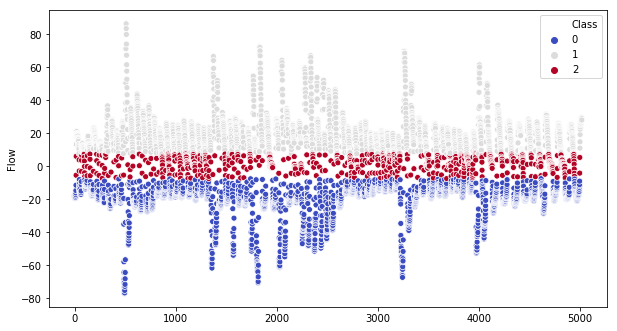

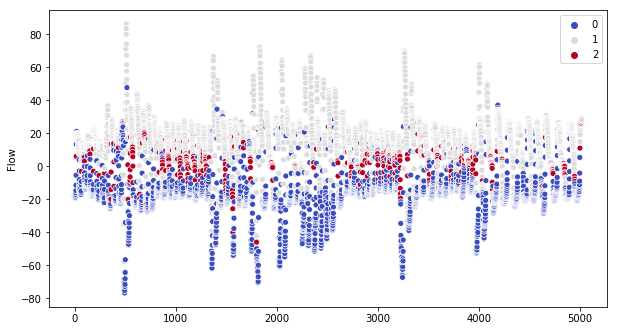

In [290]:
fig = plt.figure(figsize = (10, 12))

time_2 = range(0, 5019)

plt.subplot(2, 1, 1)
sns.scatterplot(x = time_2, y = test['Flow'], hue = test['Class'], palette = 'coolwarm')

fig = plt.figure(figsize = (10, 12))

plt.subplot(2, 1, 2)
sns.scatterplot(x = time_2, y = test['Flow'], hue = final_pred_test, palette = 'coolwarm')

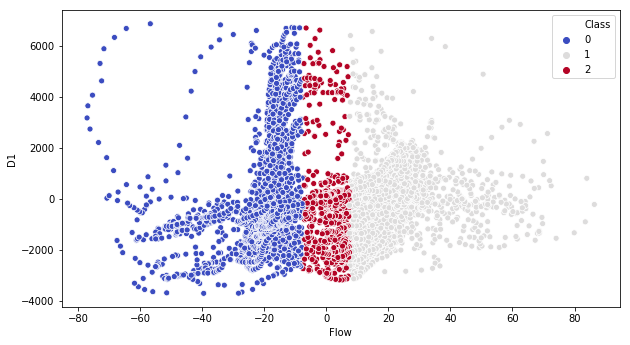

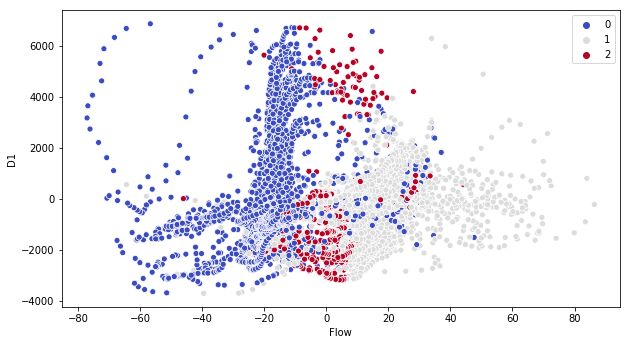

In [291]:
fig = plt.figure(figsize = (10, 12))

plt.subplot(2, 1, 1)
sns.scatterplot(y = test['D1'], x = test['Flow'], hue = test['Class'], palette = 'coolwarm')

fig = plt.figure(figsize = (10, 12))

plt.subplot(2, 1, 2)
sns.scatterplot(y = test['D1'], x = test['Flow'], hue = final_pred_test, palette = 'coolwarm')

## Save Keras File as TensorFlow Lite

In [292]:
keras_file = "model_Sept_5.h5"

In [293]:
keras.models.save_model(model, keras_file)

In [294]:
converter = tf.lite.TocoConverter.from_keras_model_file(keras_file)

In [295]:
tflite_model = converter.convert()

In [296]:
open("test_save_2.tflite", "wb").write(tflite_model)

8280